In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from sqlalchemy import create_engine
engine = create_engine("sqlite:///news.db")

In [3]:
import pandas as pd

df = pd.read_sql("SELECT * FROM document WHERE date > '2016-01-01 00:00:00'", engine.raw_connection())
df.head()

,id,url,date,edition,text,title,topics,authors,agency_id
0,1,https://www.sport-interfax.ru/645122,2019-01-05 02:29:00,www.sport-interfax.ru,В финале американская команда встретится с поб...,Сборная России по хоккею проиграла США в полуф...,Спорт,None,1
1,2,https://www.sport-interfax.ru/645124,2019-01-05 06:34:00,www.sport-interfax.ru,В полуфинале она крупно победила Швейцарию и в...,Сборная Финляндии стала вторым финалистом моло...,Спорт,None,1
2,3,https://www.interfax.ru/moscow/644812,2019-01-01 04:29:00,None,"Ранее источник ""Интерфакса"" сообщил об обрушен...",Собянин пообещал разобраться с причинами инцид...,Москва,None,1
3,4,https://www.interfax.ru/russia/644813,2019-01-01 05:35:00,None,Москва. 1 января. INTERFAX.RU - Тела пяти чело...,Спасатели извлекли из-под завалов в Магнитогор...,В России,None,1
4,5,https://www.interfax.ru/russia/644892,2019-01-02 08:47:00,None,Москва. 2 января. INTERFAX.RU - Президент Турк...,Президент Туркменистана выразил соболезнования...,В России,None,1


In [3]:
df["date_only"] = pd.to_datetime(df["date"]).dt.strftime("%Y-%m")
counts = df.groupby(["date_only", "agency_id"]).count()["id"]
counts = pd.DataFrame(counts)
counts.reset_index(inplace=True)
counts["count"] = counts["id"] 
counts.drop(["id"], inplace=True, axis=1)
counts.head()

,date_only,agency_id,count
0,2016-01,1,3697
1,2016-02,1,3917
2,2016-03,1,4473
3,2016-04,1,4861
4,2016-05,1,4423


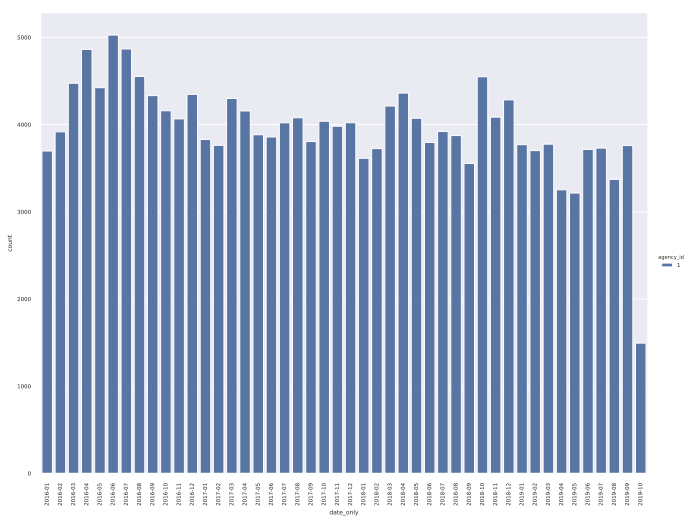

In [23]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 
import seaborn as sns

sns.set(font_scale=0.5)
graph = sns.catplot(x="date_only", y="count", hue="agency_id", data=counts, kind="bar", height=7, aspect=1.3)
for ax in graph.axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [46]:
df

,id,url,date,edition,text,title,topics,authors,agency_id
0,1,https://www.interfax.ru/russia/488154,2016-01-01 00:22:00,None,Москва. 1 января. INTERFAX.RU - Президент РФ В...,Путин встретил Новый год в кругу родных и близких,В России,None,1
1,2,https://www.interfax.ru/russia/488155,2016-01-01 01:44:00,None,Москва. 1 января. INTERFAX.RU - Действие догов...,Приостановлено действие договора о зоне свобод...,В России,None,1
2,3,https://www.interfax.ru/russia/488156,2016-01-01 02:04:00,None,Москва. 1 января. INTERFAX.RU - Писатель Дании...,Даниил Гранин отметит 97-летие,В России,None,1
3,4,https://www.interfax.ru/world/488157,2016-01-01 02:15:00,None,Москва. 1 января. INTERFAX.RU - Президент Укра...,Порошенко заявил о широко открытой Украиной дв...,В мире,None,1
4,5,https://www.interfax.ru/world/488158,2016-01-01 02:20:00,None,Москва. 1 января. INTERFAX.RU - Президент Эсто...,Президент Эстонии заявил об изменении привычно...,В мире,None,1
...,...,...,...,...,...,...,...,...,...
182256,182257,https://www.interfax.ru/russia/680146,2019-10-12 21:41:00,None,Москва. 12 октября. INTERFAX.RU - Четверо пост...,Четверо пострадавших в результате ДТП в Подмос...,В России,None,1
182257,182258,https://www.interfax.ru/world/680147,2019-10-12 22:08:00,None,Как Saudi Aramco восстанавливается после атаки...,Несущие колонны Саудовской Аравии,В мире,None,1
182258,182259,https://www.interfax.ru/world/680148,2019-10-12 22:52:00,None,Москва. 12 октября. INTERFAX.RU - Полиция Брюс...,Сотни экоактивистов задержаны в Брюсселе,В мире,None,1
182259,182260,https://www.interfax.ru/world/680149,2019-10-12 23:18:00,None,Москва. 12 октября. INTERFAX.RU - В МИД Франци...,Франция приостанавливает продажу оружия Турции,В мире,None,1


In [43]:
df.sort_values("date")

,id,url,date,edition,text,title,topics,authors,agency_id,date_only
105,106,https://www.interfax.ru/russia/488154,2016-01-01 00:22:00,None,Москва. 1 января. INTERFAX.RU - Президент РФ В...,Путин встретил Новый год в кругу родных и близких,В России,None,1,2016-01
106,107,https://www.interfax.ru/russia/488155,2016-01-01 01:44:00,None,Москва. 1 января. INTERFAX.RU - Действие догов...,Приостановлено действие договора о зоне свобод...,В России,None,1,2016-01
107,108,https://www.interfax.ru/russia/488156,2016-01-01 02:04:00,None,Москва. 1 января. INTERFAX.RU - Писатель Дании...,Даниил Гранин отметит 97-летие,В России,None,1,2016-01
108,109,https://www.interfax.ru/world/488157,2016-01-01 02:15:00,None,Москва. 1 января. INTERFAX.RU - Президент Укра...,Порошенко заявил о широко открытой Украиной дв...,В мире,None,1,2016-01
110,111,https://www.interfax.ru/world/488158,2016-01-01 02:20:00,None,Москва. 1 января. INTERFAX.RU - Президент Эсто...,Президент Эстонии заявил об изменении привычно...,В мире,None,1,2016-01
...,...,...,...,...,...,...,...,...,...,...
180423,180424,https://www.interfax.ru/russia/680146,2019-10-12 21:41:00,None,Москва. 12 октября. INTERFAX.RU - Четверо пост...,Четверо пострадавших в результате ДТП в Подмос...,В России,None,1,2019-10
180424,180425,https://www.interfax.ru/world/680147,2019-10-12 22:08:00,None,Как Saudi Aramco восстанавливается после атаки...,Несущие колонны Саудовской Аравии,В мире,None,1,2019-10
180425,180426,https://www.interfax.ru/world/680148,2019-10-12 22:52:00,None,Москва. 12 октября. INTERFAX.RU - Полиция Брюс...,Сотни экоактивистов задержаны в Брюсселе,В мире,None,1,2019-10
180426,180427,https://www.interfax.ru/world/680149,2019-10-12 23:18:00,None,Москва. 12 октября. INTERFAX.RU - В МИД Франци...,Франция приостанавливает продажу оружия Турции,В мире,None,1,2019-10


In [3]:
from sqlalchemy.orm import sessionmaker

from purano.models import Document, Info

Session = sessionmaker(bind=engine)                                                             
session = Session()                                                                             
query = session.query(Document)                                                                     
query = query.join(Document.info) 

In [4]:
from purano.proto.info_pb2 import EntitySpan as EntitySpanPb
from ipymarkup import show_box_markup
from ipymarkup.palette import palette, BLUE, RED, GREEN


for doc in query.limit(100):
    spans = [(span.begin, span.end, EntitySpanPb.Tag.Name(span.tag)) for span in doc.info.get_info().text_dp_ner]
    print(spans)
    show_box_markup(doc.text, spans, palette=palette(PER=BLUE, ORG=RED, LOC=GREEN))

[(0, 6, 'LOC'), (18, 29, 'ORG'), (54, 88, 'LOC'), (171, 174, 'LOC'), (175, 188, 'PER'), (647, 655, 'LOC'), (697, 700, 'LOC'), (701, 722, 'PER'), (813, 820, 'PER'), (844, 847, 'ORG'), (912, 924, 'LOC'), (926, 933, 'LOC'), (955, 985, 'LOC'), (1033, 1054, 'LOC'), (1139, 1146, 'PER'), (1193, 1214, 'LOC')]


BoxMarkup('Москва. 1 января. INTERFAX.RU - В самопровозглашенной Донецкой народной республике (ДНР) в 2019 году предстоит осуществить масштабный перезапуск предприятий, заявил глава ДНР Денис Пушилин в своем новогоднем поздравлении. "В 2019 году в приоритете экономическое развитие республики и повышение благосостояния наших граждан (...) Нам предстоит масштабный перезапуск промышленности - разработана дорожная карта развития металлургических, коксохимических, машиностроительных и горнодобывающих предприятий. У нас много работы в финансово-экономическом секторе, в сфере развития банковской системы", - сказал он. По его словам 2018 год вошел в историю Донбасса как год трагической гибели первого главы ДНР Александра Захарченко. "Это всенародное горе, но оно объединило нас, мы выстояли, мы стали сильнее!", - отметил Пушилин. Также он добавил, что ДНР активно сотрудничает с дружественными государствами, такими как Южная Осетия, Абхазия, самопровозглашенной Луганской народной республикой, и продолжает курс на интеграцию и сближение с Российской Федерацией. "И я убежден: в новом году появятся новые перспективы сотрудничества, - подчеркнул Пушилин. - Наше единство, наши разносторонние связи с Российской Федерацией будут крепнуть день ото дня".',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(54, 88, 'LOC'),
           Span(171, 174, 'LOC'),
           Span(175, 188, 'PER'),
           Span(647, 655, 'LOC'),
           Span(697, 700, 'LOC'),
           Span(701, 722, 'PER'),
           Span(813, 820, 'PER'),
           Span(844, 847, 'ORG'),
           Span(912, 924, 'LOC'),
           Span(926, 933, 'LOC'),
           Span(955, 985, 'LOC'),
           Span(1033, 1054, 'LOC'),
           Span(1139, 1146, 'PER'),
           Span(1193, 1214, 'LOC')])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (120, 134, 'LOC'), (137, 143, 'LOC'), (155, 165, 'ORG'), (597, 607, 'ORG'), (769, 772, 'ORG'), (774, 784, 'ORG')]


BoxMarkup('Москва. 1 января. INTERFAX.RU - Не менее трех человек пострадали в результате обрушения конструкции деревянного моста в Парке Горького в Москве, сообщили "Интерфаксу" во вторник информированные источники. "Во время запуска фейерверков и новогодних поздравлений рухнула конструкция деревянного моста. Три человека получили травмы средней степени тяжести", - сказал один из собеседников агентства. По его словам, медиками будет принято решение о необходимости госпитализации пострадавших. "Еще несколько находившихся на мосту человек отделались легким испугом", - добавил источник. Другой источник "Интерфакса" пояснил, что в результате падения с моста высотой 5 метров пострадали пять человек. Они были госпитализированы. В свою очередь в пресс-службе столичного главка МЧС "Интерфаксу" сообщили, что подобная заявка поступала в дежурную часть, но прибывшие на место спасатели не привлекались ни к каким работам.',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(120, 134, 'LOC'),
           Span(137, 143, 'LOC'),
           Span(155, 165, 'ORG'),
           Span(597, 607, 'ORG'),
           Span(769, 772, 'ORG'),
           Span(774, 784, 'ORG')])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (120, 134, 'LOC'), (137, 143, 'LOC'), (154, 164, 'ORG'), (311, 317, 'LOC'), (348, 362, 'LOC'), (437, 451, 'LOC'), (908, 914, 'LOC')]


BoxMarkup('Москва. 1 января. INTERFAX.RU - Десять человек госпитализированы в результате обрушения конструкции деревянного моста в Парке Горького в Москве, сообщил "Интерфаксу" осведомленный источник. "Десять человек госпитализированы, состояние уточняется", - сказал собеседник агентства. Между тем официальный сайт мэра Москвы сообщает о поломке на катке в Парке Горького. "В результате технической неисправности конструктивных элементов катка в Парке Горького произошла поломка оборудования. Уже через несколько минут после происшествия пострадавшим начали оказывать медицинскую помощь", - говорится в сообщении. В нем отмечается, что поломка затронула всего несколько квадратных метров ледовой площадки. По информации пресс-службы парка, участок катка огорожен, на остальной территории продолжают кататься посетители. "За помощью обратилось 13 человек, им оказывается необходимая помощь, - сообщается на сайте мэра Москвы. - Тяжелых пострадавших нет".',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(120, 134, 'LOC'),
           Span(137, 143, 'LOC'),
           Span(154, 164, 'ORG'),
           Span(311, 317, 'LOC'),
           Span(348, 362, 'LOC'),
           Span(437, 451, 'LOC'),
           Span(908, 914, 'LOC')])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (48, 66, 'PER'), (128, 135, 'LOC'), (173, 183, 'PER'), (233, 236, 'ORG'), (300, 307, 'LOC'), (308, 323, 'PER'), (450, 457, 'LOC')]


BoxMarkup('Москва. 1 января. INTERFAX.RU - Шоумен и артист Владимир Зеленский заявил, что выдвигает свою кандидатуру на выборах президента Украины, которые пройдут 31 марта. Заявление Зеленского прозвучало в рамках его обращения на телеканале "1+1", которое было показано перед новогодним обращением президента Украины Петра Порошенко. Поздравление главы украинского государства было показано в эфире телеканала уже после наступления нового года. 31 декабря на Украине стартовала президентская избирательная кампания.',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(48, 66, 'PER'),
           Span(128, 135, 'LOC'),
           Span(173, 183, 'PER'),
           Span(233, 236, 'ORG'),
           Span(300, 307, 'LOC'),
           Span(308, 323, 'PER'),
           Span(450, 457, 'LOC')])

[]


BoxMarkup('В третьем периоде матча чемпионата мира по хоккею среди молодежных команд россияне повели в счете В матче определится победитель группы А, обе команды обеспечили себе выход в плей-офф',
          [])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (66, 73, 'LOC'), (77, 85, 'LOC'), (154, 156, 'ORG'), (157, 160, 'ORG'), (164, 180, 'LOC'), (364, 367, 'ORG'), (406, 429, 'LOC'), (452, 460, 'PER')]


BoxMarkup('Москва. 1 января. INTERFAX.RU - Столб пепла, выброшенный вулканом Шивелуч на Камчатке, поднялся на высоту до 4,5 км над уровнем моря, сообщается на сайте ГУ МЧС по Камчатскому краю в понедельник. "Пепловый шлейф распространился в юго-западном направлении. На пути распространения пеплового шлейфа населённые пункты отсутствуют", - говорится в сообщении. По данным МЧС, выпадение пепла в населенных пунктах Усть-Камчатского района не зафиксировано. Для Шивелуча установлен один из наиболее угрожающих - оранжевый цветовой код опасности для авиации.',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(66, 73, 'LOC'),
           Span(77, 85, 'LOC'),
           Span(154, 156, 'ORG'),
           Span(157, 160, 'ORG'),
           Span(164, 180, 'LOC'),
           Span(364, 367, 'ORG'),
           Span(406, 429, 'LOC'),
           Span(452, 460, 'PER')])

[(16, 26, 'ORG'), (106, 112, 'LOC'), (124, 135, 'ORG'), (142, 148, 'LOC'), (149, 163, 'PER'), (225, 239, 'LOC'), (532, 542, 'ORG'), (604, 618, 'LOC')]


BoxMarkup('Ранее источник "Интерфакса" сообщил об обрушении конструкции деревянного моста в парке, есть пострадавшие Москва. 1 января. INTERFAX.RU - Мэр Москвы Сергей Собянин пообещал разобрать в причинах поломки пешеходного перехода в Парке Горького в новогоднюю ночь, в результате чего пострадали несколько человек. "Пострадали несколько человек. Искренне им сочувствую. Всем оказана медицинская помощь. С причинами происшествия разберемся", - написал он на своей странице в твиттере в ночь на вторник. Ранее осведомленный источник сообщил "Интерфаксу", что в результате обрушения конструкции деревянного моста в Парке Горького были госпитализированы десять человек . По сообщению пресс-службы парка, за медпомощью в результате инцидента обратилось 13 человек, тяжелых пострадавших нет.',
          [Span(16, 26, 'ORG'),
           Span(106, 112, 'LOC'),
           Span(124, 135, 'ORG'),
           Span(142, 148, 'LOC'),
           Span(149, 163, 'PER'),
           Span(225, 239, 'LOC'),
           Span(532, 542, 'ORG'),
           Span(604, 618, 'LOC')])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (117, 130, 'LOC'), (152, 166, 'ORG'), (183, 185, 'ORG'), (186, 189, 'ORG'), (193, 212, 'LOC'), (494, 507, 'LOC'), (676, 688, 'LOC'), (908, 910, 'LOC')]


BoxMarkup('Москва. 1 января. INTERFAX.RU - Тела пяти человек извлечены из-под завалов на месте обрушения подъезда жилого дома в Магнитогорске, сообщили агентству "Интерфакс-Урал" в пресс-службе ГУ МЧС по Челябинской области. "Извлечены тела пяти человек, детей среди них нет", - отметил представитель пресс-службы. По его словам, на месте происшествия работы ведутся круглосуточно без перерыва. "Работают в четыре смены по два часа. На улице мороз за 20 градусов", - добавил представитель пресс-службы. В Магнитогорске в понедельник утром произошло обрушение одного из подъездов газифицированного панельного 10-этажного 12-подъездного жилого дома (1973 год постройки) по адресу проспект Карла Маркса, 164. Ранее сообщалось о четырех погибших. Неизвестной остается судьба нескольких десятков человек. По данному факту возбуждено уголовное дело "о причинении смерти по неосторожности двум и более лицам" (ч. 3 ст. 109 УК РФ).',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(117, 130, 'LOC'),
           Span(152, 166, 'ORG'),
           Span(183, 185, 'ORG'),
           Span(186, 189, 'ORG'),
           Span(193, 212, 'LOC'),
           Span(494, 507, 'LOC'),
           Span(676, 688, 'LOC'),
           Span(908, 910, 'LOC')])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (42, 45, 'LOC'), (46, 59, 'PER'), (104, 109, 'LOC'), (171, 185, 'ORG'), (296, 301, 'LOC'), (383, 394, 'PER'), (420, 425, 'PER'), (464, 469, 'LOC'), (565, 575, 'LOC'), (691, 698, 'PER'), (709, 714, 'LOC'), (829, 862, 'ORG'), (878, 880, 'LOC'), (937, 940, 'LOC'), (1043, 1048, 'LOC'), (1100, 1113, 'PER'), (1124, 1129, 'LOC'), (1162, 1166, 'ORG'), (1235, 1239, 'ORG'), (1393, 1398, 'PER'), (1468, 1473, 'LOC')]


BoxMarkup('Москва. 1 января. INTERFAX.RU - Президент США Дональд Трамп согласился продлить процесс вывода войск из Сирии и осуществить его в течение четырех месяцев, сообщила газета New York Times, ссылаясь на собственные источники и числа сотрудников администрации. Ранее он говорил, что вывод находящих в Сирии 2 тыс. американских военных займет около 30 дней. Накануне сенатор-республиканец Линдси Грэм сообщил журналистам, что Трамп распорядился замедлить вывод войск из Сирии. "Думаю, в этом вопросе будет сделана пауза", - заявил он по окончании встречи с президентом в Белом доме. Он добавил, что, по его мнению, "мы притормаживаем процесс по-умному". Ранее сенатор выступал против объявленного Трампом вывода из Сирии американского воинского контингента, который, по его словам, уже выполнил свою миссию по уничтожению группировки "Исламское государство" ( ИГИЛ, ИГ, запрещенная в РФ террористическая организация ). Тем не менее, президент США заверил, что не намерен отказываться от своих намерений вывести войска, и считает, что его действия в Сирии можно считать героизмом. "Если бы кто-нибудь, а не Дональд Трамп, сделал в Сирии, погруженной в беспорядки из-за ИГИЛ, то, что сделал я, став президентом, он был бы национальным героем. ИГИЛ в основном ушла, мы постепенно возвращаем наши войска домой к семьям, продолжая бороться с остатками группировки", - написал президент в своем твиттере. Трамп продолжил: "В ходе ( избирательной - ИФ ) кампании я обещал выйти из Сирии и других районов. Сейчас, когда я начинаю вывод, фейковые новости или некоторые генералы-неудачники, которые были неспособны выполнять свои обязанности до того, как я пришел, жалуются на меня и мою тактику, которые работают. Я делаю просто то, что я сказал, и что собираюсь продолжать".',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(42, 45, 'LOC'),
           Span(46, 59, 'PER'),
           Span(104, 109, 'LOC'),
           Span(171, 185, 'ORG'),
           Span(296, 301, 'LOC'),
           Span(383, 394, 'PER'),
           Span(420, 425, 'PER'),
           Span(464, 469, 'LOC'),
           Span(565, 575, 'LOC'),
           Span(691, 698, 'PER'),
           Span(709, 714, 'LOC'),
           Span(829, 862, 'ORG'),
           Span(878, 880, 'LOC'),
           Span(937, 940, 'LOC'),
           Span(1043, 1048, 'LOC'),
           Span(1100, 1113, 'PER'),
           Span(1124, 1129, 'LOC'),
           Span(1162, 1166, 'ORG'),
           Span(1235, 1239, 'ORG'),
           Span(1393, 1398, 'PER'),
           Span(1468, 1473, 'LOC')])

[(37, 46, 'LOC'), (47, 53, 'LOC'), (65, 76, 'ORG'), (108, 114, 'LOC'), (159, 165, 'LOC'), (276, 285, 'LOC'), (405, 415, 'PER'), (430, 436, 'LOC'), (479, 485, 'LOC'), (511, 529, 'PER'), (554, 569, 'PER'), (615, 624, 'PER'), (651, 657, 'LOC'), (747, 753, 'LOC'), (774, 779, 'LOC'), (797, 806, 'LOC'), (820, 825, 'LOC'), (895, 901, 'LOC'), (916, 924, 'LOC')]


BoxMarkup('В четвертьфинале россияне сыграют со Словакией Москва. 1 января. INTERFAX.RU - Хоккеисты молодежной сборной России добились победы над сверстниками из команды Канады в своем четвертом матче группового этапа чемпионата мира среди игроков не старше 20 лет. Встреча, прошедшая в Ванкувере в ночь на вторник по московскому времени, завершилась со счетом 2:1 (1:1, 0:0, 1:0) в пользу россиян. В первом периоде Коди Гласс вывел сборную Канады вперед. В этой же двадцатиминутке сборная России отыгралась: гол на счету Григория Денисенко. Победную шайбу команда Валерия Брагина провела в третьем периоде, автором гола стал Павел Шэн. Победа позволила сборной России набрать 12 очков и завершить первый этап на первом месте в группе A. Второе место заняла Канада (9 очков), третье – Чехия (5), четвертое - Швейцария (4), пятое – Дания (0). В группе B прошли еще не все матчи, но известно, что на сборную России от нее попала Словакия, ставшая четвертой. По регламенту турнира, в плей-офф выходят по четыре из пяти команд каждой из двух групп.',
          [Span(37, 46, 'LOC'),
           Span(47, 53, 'LOC'),
           Span(65, 76, 'ORG'),
           Span(108, 114, 'LOC'),
           Span(159, 165, 'LOC'),
           Span(276, 285, 'LOC'),
           Span(405, 415, 'PER'),
           Span(430, 436, 'LOC'),
           Span(479, 485, 'LOC'),
           Span(511, 529, 'PER'),
           Span(554, 569, 'PER'),
           Span(615, 624, 'PER'),
           Span(651, 657, 'LOC'),
           Span(747, 753, 'LOC'),
           Span(774, 779, 'LOC'),
           Span(797, 806, 'LOC'),
           Span(820, 825, 'LOC'),
           Span(895, 901, 'LOC'),
           Span(916, 924, 'LOC')])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (100, 113, 'LOC'), (260, 273, 'LOC'), (442, 454, 'LOC'), (678, 680, 'LOC')]


BoxMarkup('Москва. 1 января. INTERFAX.RU - Пятеро погибших в результате взрыве газа и обрушения в жилом доме в Магнитогорске опознаны, сообщил представитель оперативного штаба на заседании комиссии по чрезвычайным ситуациям. "Семь погибло, пять опознаны", - сказал он. В Магнитогорске в понедельник утром произошло обрушение одного из подъездов газифицированного панельного 10-этажного 12-подъездного жилого дома (1973 год постройки) по адресу проспект Карла Маркса, 164. По последним данным, погибли семь человек. Неизвестной остается судьба нескольких десятков человек. По данному факту возбуждено уголовное дело о причинении смерти по неосторожности двум и более лицам (ч. 3 ст. 109 УК РФ).',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(100, 113, 'LOC'),
           Span(260, 273, 'LOC'),
           Span(442, 454, 'LOC'),
           Span(678, 680, 'LOC')])

[(66, 72, 'LOC'), (84, 95, 'ORG'), (170, 183, 'LOC'), (195, 205, 'ORG'), (222, 225, 'ORG'), (229, 248, 'LOC'), (325, 338, 'LOC'), (509, 521, 'LOC'), (652, 654, 'LOC'), (668, 671, 'ORG'), (696, 709, 'LOC'), (804, 807, 'ORG'), (808, 823, 'PER'), (934, 947, 'LOC'), (985, 988, 'ORG'), (1063, 1076, 'LOC'), (1101, 1119, 'ORG'), (1120, 1123, 'ORG'), (1124, 1130, 'LOC'), (1134, 1153, 'LOC')]


BoxMarkup('В настоящее время речь идет о семи погибших в результате трагедии Москва. 1 января. INTERFAX.RU - Судьба 37 человек остается неизвестной после взрыва газа в жилом доме в Магнитогорске, сообщили "Интерфаксу" в пресс-службе МЧС по Челябинской области. "Остается неизвестной судьба 37 человек", - сказал собеседник агентства. В Магнитогорске в понедельник утром произошло обрушение одного из подъездов газифицированного панельного 10-этажного 12-подъездного жилого дома ( 1973 год постройки ) по адресу проспект Карла Маркса, 164. По данному факту возбуждено уголовное дело о причинении смерти по неосторожности двум и более лицам ( часть 3 статьи 109 УК РФ ). По данным МЧС, всего из-под завалов в Магнитогорске извлечено семеро погибших. Ранее сообщалось об обнаружении тел пяти погибших . Накануне глава МЧС Евгений Зиничев сообщил журналистам, что операция по разбору завалов обрушившегося из-за взрыва бытового газа подъезда дома в Магнитогорске продлится не менее двух суток. Ранее МЧС также распространило список разыскиваемых жильцов дома после обрушения. В Магнитогорске был введен режим ЧС . В Главном управлении МЧС России по Челябинской области продолжает действовать телефон "горячей линии" (8-351-239-99-99) .',
          [Span(66, 72, 'LOC'),
           Span(84, 95, 'ORG'),
           Span(170, 183, 'LOC'),
           Span(195, 205, 'ORG'),
           Span(222, 225, 'ORG'),
           Span(229, 248, 'LOC'),
           Span(325, 338, 'LOC'),
           Span(509, 521, 'LOC'),
           Span(652, 654, 'LOC'),
           Span(668, 671, 'ORG'),
           Span(696, 709, 'LOC'),
           Span(804, 807, 'ORG'),
           Span(808, 823, 'PER'),
           Span(934, 947, 'LOC'),
           Span(985, 988, 'ORG'),
           Span(1063, 1076, 'LOC'),
           Span(1101, 1119, 'ORG'),
           Span(1120, 1123, 'ORG'),
           Span(1124, 1130, 'LOC'),
           Span(1134, 1153, 'LOC')])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (89, 94, 'LOC'), (95, 115, 'LOC'), (139, 141, 'ORG'), (142, 145, 'ORG'), (183, 189, 'LOC'), (236, 241, 'LOC'), (251, 268, 'LOC'), (465, 467, 'ORG'), (468, 471, 'ORG'), (472, 478, 'LOC'), (482, 502, 'LOC'), (503, 518, 'PER'), (541, 543, 'ORG'), (544, 547, 'ORG'), (569, 579, 'ORG'), (689, 694, 'LOC')]


BoxMarkup('Москва. 1 января. INTERFAX.RU - Семь человек стали жертвами пожара в жилом доме в городе Орске Оренбургской области, сообщила пресс-служба ГУ МЧС по региону во вторник. "В 05:57 ( по Москве ) поступило сообщение о пожаре в жилом доме в Орске по улице Салтыкова-Щедрина. Обнаружены тела семи погибших, среди них предположительно есть дети", - говорится в сообщении. В 06:34 по московскому времени пожар полностью ликвидирован. На место происшествия выехал начальник ГУ МЧС России по Оренбургской области Александр Зенов. Позже в пресс-службе ГУ МЧС по региону сообщили "Интерфаксу", что, по предварительным данным, четверо взрослых и трое детей стали жертвами пожара в частном жилом доме в Орске. "Предположительно, четверо взрослых и трое детей. Личности устанавливаются", - сказал сотрудник пресс-службы. В настоящее время на месте работает дознаватель, причина возгорания устанавливается. Площадь пожара уточняется.',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(89, 94, 'LOC'),
           Span(95, 115, 'LOC'),
           Span(139, 141, 'ORG'),
           Span(142, 145, 'ORG'),
           Span(183, 189, 'LOC'),
           Span(236, 241, 'LOC'),
           Span(251, 268, 'LOC'),
           Span(465, 467, 'ORG'),
           Span(468, 471, 'ORG'),
           Span(472, 478, 'LOC'),
           Span(482, 502, 'LOC'),
           Span(503, 518, 'PER'),
           Span(541, 543, 'ORG'),
           Span(544, 547, 'ORG'),
           Span(569, 579, 'ORG'),
           Span(689, 694, 'LOC')])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (86, 99, 'LOC'), (176, 178, 'ORG'), (179, 182, 'ORG'), (186, 205, 'LOC'), (734, 740, 'LOC'), (1125, 1143, 'ORG'), (1144, 1147, 'ORG'), (1148, 1154, 'LOC'), (1158, 1177, 'LOC')]


BoxMarkup('Москва. 1 января. INTERFAX.RU - Сохраняется угроза дальнейшего обрушения части дома в Магнитогорске, пострадавшего в понедельник от взрыва бытового газа, сообщает пресс-служба ГУ МЧС по Челябинской области во вторник. "Угроза дальнейшего возможного обрушения рядом с обрушившимся подъездом сохраняется. Аварийно-спасательные работы идут круглосуточно, участники разбирают завалы в четыре смены, меняясь через каждые два часа", - говорится в сообщении. За прошедшие сутки с места ЧП вывезено 37 самосвалов мусора общим объемом 370 кубических метров. При помощи мобильного диагностического комплекса "Стрела-П" проведено обследование строительных конструкций пяти подъездов, специалисты обрабатывают результаты. По данным на 07:00 ( по Москве ) часов с момента начала поисково-спасательной операции из-под завалов извлечено 12 человек, из них семь человек погибли ( детей нет ), пять - спасены ( в том числе один ребенок ). Все пострадавшие госпитализированы. Проводится работа по установлению местонахождения еще 37 человек. На месте ЧС работают почти полторы тысячи человек и более 300 единиц техники, четыре беспилотника. В Главном управлении МЧС России по Челябинской области продолжает действовать телефон "горячей линии" (8-351-239-99-99) . Работают психологи.',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(86, 99, 'LOC'),
           Span(176, 178, 'ORG'),
           Span(179, 182, 'ORG'),
           Span(186, 205, 'LOC'),
           Span(734, 740, 'LOC'),
           Span(1125, 1143, 'ORG'),
           Span(1144, 1147, 'ORG'),
           Span(1148, 1154, 'LOC'),
           Span(1158, 1177, 'LOC')])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (86, 103, 'LOC'), (106, 113, 'LOC'), (114, 149, 'ORG'), (222, 224, 'ORG'), (225, 228, 'ORG'), (326, 337, 'LOC'), (338, 347, 'LOC'), (377, 394, 'LOC'), (397, 404, 'LOC'), (405, 433, 'ORG'), (679, 683, 'ORG'), (719, 722, 'ORG'), (738, 742, 'ORG'), (788, 805, 'LOC'), (808, 820, 'LOC'), (875, 885, 'LOC'), (950, 967, 'LOC'), (970, 982, 'LOC'), (1057, 1067, 'LOC'), (1097, 1114, 'LOC'), (1117, 1129, 'LOC'), (1146, 1158, 'LOC'), (1161, 1178, 'LOC'), (1206, 1213, 'LOC'), (1216, 1225, 'LOC')]


BoxMarkup('Москва. 1 января. INTERFAX.RU - Сход 16 вагонов с углем произошел на перегоне участка Каменск-Уральский - Арамиль Свердловской железной дороги (СВЖД) утром во вторник, пострадавших нет, сообщает пресс-служба регионального ГУ МЧС. "1 января в 4:40 ( по местному времени ) произошел сход 16 вагонов грузового поезда на перегоне Храмцовская-Марамзино электрофицированного участка Каменск-Уральский - Арамиль Свердловской железной дороги. Груз - уголь. Пострадавших и угрозы экологической безопасности нет", - говорится в сообщении. Обстоятельства происшествия выясняются. В результате происшествия нарушен габарит соседнего пути. Аварийно-восстановительные работы ведут специалисты СВЖД, также работает оперативная группа МЧС. По информации СВЖД движение пассажирских поездов на направлении Каменск-Уральский - Екатеринбург будет организовано измененным маршрутом через станцию Богданович (возможны незначительные задержки в пути). Электропоезда № 6617 Каменск-Уральский - Екатеринбург и скоростной электропоезд "Ласточка" №7083 также направлены через станцию Богданович. Электропоезда №№ 6601, 6603 Каменск-Уральский - Екатеринбург и №№ 6602, 6604 Екатеринбург - Каменск-Уральский будут следовать до станций Перебор и Марамзино, далее пассажиров доставят к месту назначения автобусами.',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(86, 103, 'LOC'),
           Span(106, 113, 'LOC'),
           Span(114, 149, 'ORG'),
           Span(222, 224, 'ORG'),
           Span(225, 228, 'ORG'),
           Span(326, 337, 'LOC'),
           Span(338, 347, 'LOC'),
           Span(377, 394, 'LOC'),
           Span(397, 404, 'LOC'),
           Span(405, 433, 'ORG'),
           Span(679, 683, 'ORG'),
           Span(719, 722, 'ORG'),
           Span(738, 742, 'ORG'),
           Span(788, 805, 'LOC'),
           Span(808, 820, 'LOC'),
           Span(875, 885, 'LOC'),
           Span(950, 967, 'LOC'),
           Span(970, 982, 'LOC'),
           Span(1057, 1067, 'LOC'),
           Span(1097, 1114, 'LOC'),
           Span(1117, 1129, 'LOC'),
           Span(1146, 1158, 'LOC'),
           Span(1161, 1178, 'LOC'),
           Span(1206, 1213, 'LOC'),
           Span(1216, 1225, 'LOC')])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (67, 80, 'LOC'), (476, 495, 'LOC'), (824, 837, 'LOC'), (1008, 1020, 'LOC'), (1151, 1153, 'LOC'), (1167, 1170, 'ORG'), (1185, 1191, 'LOC')]


BoxMarkup('Москва. 1 января. INTERFAX.RU - Миграционное подразделение полиции Магнитогорска организовало бесплатное восстановление документов, утраченных жителями дома, частично обрушившегося при взрыве бытового газа, сообщает пресс-служба администрации города во вторник. "Гражданам необходимо обратиться в миграционный отдел. Восстановление утраченного паспорта осуществляется бесплатно и в максимально короткие сроки", - говорится в сообщении. В свою очередь пресс-служба губернатора Челябинской области уточняет, что паспорта восстановят в течение 2-3 часов. "Паспортный стол работает сегодня с 9 часов. Граждане не будут оплачивать госпошлину", - отмечает пресс-служба. Ранее сообщалось, что во вторник к 12:00 по местному времени будет готова памятка для горожан по поводу получения компенсации семьям погибших и пострадавших. В Магнитогорске в понедельник утром произошло обрушение одного из подъездов газифицированного панельного 10-этажного 12-подъездного жилого дома ( 1973 год постройки ) по адресу проспект Карла Маркса, 164. По данному факту возбуждено уголовное дело о причинении смерти по неосторожности двум и более лицам ( часть 3 статьи 109 УК РФ ). По данным МЧС на 07:00 ( по Москве ) часов с момента начала поисково-спасательной операции из-под завалов извлечено 12 человек, из них семь человек погибли ( детей нет ), пять - спасены ( в том числе один ребенок ). Все пострадавшие госпитализированы. Проводится работа по установлению местонахождения еще 37 человек .',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(67, 80, 'LOC'),
           Span(476, 495, 'LOC'),
           Span(824, 837, 'LOC'),
           Span(1008, 1020, 'LOC'),
           Span(1151, 1153, 'LOC'),
           Span(1167, 1170, 'ORG'),
           Span(1185, 1191, 'LOC')])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (91, 97, 'LOC'), (127, 137, 'ORG'), (305, 322, 'LOC'), (325, 359, 'LOC')]


BoxMarkup('Москва. 1 января. INTERFAX.RU - Три человека пострадали в результате пьяной драки в центре Москвы в новогоднюю ночь, сообщили "Интерфаксу" в пресс-службе столичного главка полиции. По данным пресс-службы, в полицию около 23:30 понедельника поступило несколько сообщений о драке в районе пересечения улицы Антонова-Овсеенко и Первого Красногвардейского проезда. Прибывшими на место полицейскими установлено, что между неизвестными, находившимися в состоянии опьянения, произошел конфликт, переросший в драку. "В ходе драки двое неизвестных получили ножевые ранения, один - телесные повреждения, нарядами скорой медпомощи доставлены в медицинские учреждения", - добавил он. В пресс-службе отметили, что еще двое участников драки были доставлены в отдел полиции для дальнейшего разбирательства.',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(91, 97, 'LOC'),
           Span(127, 137, 'ORG'),
           Span(305, 322, 'LOC'),
           Span(325, 359, 'LOC')])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (81, 105, 'ORG'), (106, 112, 'LOC'), (170, 173, 'ORG'), (176, 192, 'LOC'), (246, 262, 'LOC'), (296, 299, 'ORG'), (345, 364, 'ORG'), (446, 448, 'ORG'), (493, 509, 'LOC'), (605, 624, 'ORG'), (638, 655, 'PER')]


BoxMarkup('Москва. 1 января. INTERFAX.RU - Около десяти боевых кораблей и судов обеспечения Черноморского флота (ЧФ) России в настоящее время входят в состав постоянной группировки ВМФ в Средиземном море, сообщили в пресс-службе флота. "В настоящее время в Средиземном море в составе постоянной группировки ВМФ выполняют задачи порядка 10 кораблей и судов Черноморского флота", - говорится в сообщении. В нем отмечается, что экипажи боевых кораблей и судов ЧФ, выполняющие задачи в составе группировки в Средиземном море, встретили Новый год в дальней морской зоне. В пресс-службе сообщили, что накануне командующий Черноморским флотом вице-адмирал Александр Моисеев поздравил военнослужащих и их семьи с новогодними праздниками.',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(81, 105, 'ORG'),
           Span(106, 112, 'LOC'),
           Span(170, 173, 'ORG'),
           Span(176, 192, 'LOC'),
           Span(246, 262, 'LOC'),
           Span(296, 299, 'ORG'),
           Span(345, 364, 'ORG'),
           Span(446, 448, 'ORG'),
           Span(493, 509, 'LOC'),
           Span(605, 624, 'ORG'),
           Span(638, 655, 'PER')])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (254, 288, 'ORG'), (289, 291, 'LOC'), (810, 819, 'ORG')]


BoxMarkup('Москва. 1 января. INTERFAX.RU - Тарифы на перевозки пассажиров в плацкартных и общих вагонах поездов дальнего следования ( так называемом "регулируемом сегменте" ) с 1 января 2019 г. выросли на 3,9%. Индексация ставок произошла в соответствии с приказом Федеральной антимонопольной службы РФ от 21 сентября 2018 года. В вагонах "купе", "СВ" и "люкс" ( в так называемом "дерегулированном сегменте" ) применяется система динамического ценообразования, при котором стоимость билетов формируется в зависимости от сезона, дня недели, спроса и количества проданных мест. Кроме того, с 1 января вступает в силу закон о введении невозвратных ж/д билетов в купе поездов дальнего следования. В продаже на некоторых маршрутах они появятся с 20 января, стоимость невозвратных ж/д билетов будет дешевле на 5-20%. По данным Минтранса, такие билеты можно будет приобрести исключительно в вагоны типа "СВ", "купе" и вагоны с местами для сидения при наличии установленного перевозчиком соответствующего тарифа. В 2018 году тарифы в плацкарте не индексировались, базовые ставки в купе, СВ и люксе также не поднимались. В 2017 году тарифы на перевозки в плацкартных и общих вагонах выросли на 3,9%, в "купе", "СВ" и "люксе" - на 5% ( тогда это решение коснулось лишь примерно четверти составов, не входящих в систему динамического ценообразования ).',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(254, 288, 'ORG'),
           Span(289, 291, 'LOC'),
           Span(810, 819, 'ORG')])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (86, 92, 'LOC'), (192, 202, 'ORG'), (344, 350, 'LOC'), (454, 465, 'LOC'), (698, 704, 'LOC')]


BoxMarkup('Москва. 1 января. INTERFAX.RU - Стоимость проезда в пригородных поездах по территории Москвы и области с 1 января увеличилась и в течение 2019 года пересматриваться больше не будет, сообщили "Интерфаксу" в департаменте экономической политики и развития столицы. "С Нового года тариф на проезд в электропоездах пригородного сообщения в пределах Москвы вырос на 2 рубля до 36, стоимость проезда одной зоны в межсубъектном сообщении по территории столицы и Подмосковья - на 1 рубль до 23 рублей", - сказал собеседник агентства. Он напомнил, что предыдущий раз тарифы на проезд в электричках столичного региона повышались полтора года назад. Между тем, рост тарифов на остальной общественный транспорт Москвы - в среднем на 5% - произойдет только со 2 января, так как в новогоднюю ночь он работал без перерыва.',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(86, 92, 'LOC'),
           Span(192, 202, 'ORG'),
           Span(344, 350, 'LOC'),
           Span(454, 465, 'LOC'),
           Span(698, 704, 'LOC')])

[(15, 18, 'ORG'), (80, 86, 'LOC'), (98, 109, 'ORG'), (164, 177, 'LOC'), (307, 317, 'ORG'), (334, 337, 'ORG'), (338, 344, 'LOC'), (920, 923, 'ORG'), (924, 940, 'PER'), (970, 978, 'ORG'), (979, 985, 'LOC'), (1101, 1104, 'ORG'), (1416, 1424, 'PER'), (1504, 1507, 'ORG'), (1533, 1539, 'LOC'), (1825, 1838, 'LOC'), (1991, 2003, 'LOC'), (2139, 2141, 'LOC'), (2147, 2165, 'ORG'), (2166, 2169, 'ORG'), (2170, 2176, 'LOC'), (2180, 2199, 'LOC')]


BoxMarkup('Как отметили в МЧС, после этого будет продолжена поисково-спасательная операция Москва. 1 января. INTERFAX.RU - Спасатели демонтируют стену подъезда в жилом годе в Магнитогорске, где взорвался газ, из-за угрозы ее обрушения, поисково-спасательные работы будут продолжены после снятия этой угрозы, сообщили "Интерфаксу" в пресс-службе МЧС России. "Только после того, как угроза обрушения будет устранена, продолжатся разборы завалов и поисковая операция", - говорится в сообщении. Правкомиссией в ходе детального анализа состояния здания по его визуальному осмотру и по данным специальных приборов принято решение о демонтаже нависающих конструкций и стены седьмого подъезда, отметили в ведомстве. "Продолжая разбор завалов, появилась реальная угроза обрушения части здания. Стена седьмого подъезда теряет устойчивость, продолжать работу в таких условиях не представляется возможным", - цитирует пресс-служба слова главы МЧС Евгения Зиничева. По предложению специалистов Минстроя России предложено начать демонтаж с разбора верхних этажей, постепенно опускаясь вниз, отметили в пресс-службе. По данным МЧС, во избежание последствий обрушения, принято решения на 40 м расширить территорию оцепления. "Спасателей будут поднимать в люльке на кране с противоположной стороны дома. Таким образом, будут срезаться нависающие конструкции. Задача сложная, требует повышенного внимания и квалификации, - цитирует пресс-служба Зиничева. По предварительной оценке, данная работа может занять почти сутки, пояснили в МЧС. По данным на 07:00 ( по Москве ) часов с момента начала поисково-спасательной операции из-под завалов извлечены 12 человек, из них семь человек погибли ( детей нет ), пять - спасены ( в том числе один ребенок ). Все пострадавшие госпитализированы. Проводится работа по установлению местонахождения еще 37 человек. В Магнитогорске утром 31 декабря произошло обрушение одного из подъездов газифицированного панельного 10-этажного жилого дома ( 1973 год постройки ) по адресу проспект Карла Маркса, 164. По данному факту было возбуждено уголовное дело о причинении смерти по неосторожности двум и более лицам ( часть 3 статьи 109 УК РФ ). В Главном управлении МЧС России по Челябинской области продолжает действовать телефон "горячей линии" (8-351-239-99-99) .',
          [Span(15, 18, 'ORG'),
           Span(80, 86, 'LOC'),
           Span(98, 109, 'ORG'),
           Span(164, 177, 'LOC'),
           Span(307, 317, 'ORG'),
           Span(334, 337, 'ORG'),
           Span(338, 344, 'LOC'),
           Span(920, 923, 'ORG'),
           Span(924, 940, 'PER'),
           Span(970, 978, 'ORG'),
           Span(979, 985, 'LOC'),
           Span(1101, 1104, 'ORG'),
           Span(1416, 1424, 'PER'),
           Span(1504, 1507, 'ORG'),
           Span(1533, 1539, 'LOC'),
           Span(1825, 1838, 'LOC'),
           Span(1991, 2003, 'LOC'),
           Span(2139, 2141, 'LOC'),
           Span(2147, 2165, 'ORG'),
           Span(2166, 2169, 'ORG'),
           Span(2170, 2176, 'LOC'),
           Span(2180, 2199, 'LOC')])

[(30, 49, 'ORG'), (50, 61, 'ORG'), (112, 118, 'LOC'), (130, 141, 'ORG'), (181, 195, 'PER'), (198, 219, 'ORG'), (245, 264, 'ORG'), (341, 348, 'PER'), (622, 629, 'PER'), (995, 1002, 'PER'), (1063, 1074, 'PER'), (1162, 1168, 'LOC'), (1250, 1269, 'ORG'), (1450, 1457, 'PER'), (1834, 1841, 'PER'), (2032, 2039, 'PER'), (2391, 2397, 'LOC'), (2440, 2447, 'PER'), (2578, 2594, 'PER'), (2597, 2604, 'PER'), (2676, 2683, 'PER'), (3298, 3305, 'PER'), (3864, 3871, 'PER'), (4134, 4159, 'PER'), (4214, 4221, 'PER'), (4622, 4628, 'PER'), (5179, 5186, 'PER'), (5579, 5586, 'PER'), (5629, 5635, 'LOC'), (5647, 5660, 'LOC'), (5665, 5671, 'LOC'), (5680, 5697, 'LOC'), (5699, 5705, 'LOC'), (5978, 5985, 'PER'), (6016, 6023, 'PER'), (6026, 6044, 'ORG')]


BoxMarkup('Выставку, уже побившую рекорд Инженерного корпуса Третьяковки по числу посетителей, еще можно успеть посмотреть Москва. 1 января. INTERFAX.RU - Выставка к 175-летию со дня рождения Архипа Куинджи в Третьяковской галерее уже успела побить рекорд Инженерного корпуса музея: с начала октября по конец ноября ее увидели более 135 тысяч человек. Куинджи до сих пор остается одним из самых загадочных художников: его происхождение и год рождения точно не выяснены, да и разгадать секрет его знаменитых "светящихся" красок в полной мере не удалось, хоть известно, что ничего сверхъестественного в их составе не было. Более того, Куинджи не оставил архива, по которому можно было бы из первых уст узнать о замыслах художника в той или иной картине. В период с 1882 года и до своей смерти в 1910 году он и вовсе вел затворнический образ жизни, писал "в стол" и на выставки свои работы не отдавал. Поэтому его пейзажи по-прежнему дают пищу для рассуждений об их символизме и зашифрованной в них философии Куинджи. Несмотря на предсказуемый интерес к работам художника, для Третьяковки это первая его персональная выставка с 1992 года. Кроме того, после смерти художника в России проходили лишь три выставки в 1913, 1914 и 2007 годах. В этот раз на двух этажах Инженерного корпуса были собраны около 200 работ из коллекций 24 музеев. Плоды экспериментов пейзажиста разнесены по четырем тематическим секциям без привязки к хронологии. Главными "героями" полотен Куинджи были свет и пространство, и каждый последующий зал показывает отдельные ветви его поисков, попытки зафиксировать секундные состояния природы со своими особенностями освещения и настроения. Открывает выставку зал "Притяжение земли", в котором собраны полотна с видами природы с высоты человеческого роста. Многие работы, представленные в этой секции, были на слуху и при жизни Куинджи: с ними он участвовал в выставках передвижников. Встречает зрителей знакомая каждому со школьной скамьи "Березовая роща" (1879 год), которая в свое время стала откровением для современников Куинджи. Но на этот раз по соседству вывешены несколько этюдов, по которым видно, какая кропотливая работа отделяла художника от итогового полотна. Этюд "Березы в лесу", хоть и небольшой по формату, производит впечатление полноценной картины, столь он яркий и детализированный. Представлена здесь и знаменитая трилогия, написанная художником после поездки на Валаам: "Ладожское озеро" (1871 год), на которой Куинджи виртуозно передал прозрачность воды и проступающие на дне камни, картина "На острове Валааме" (1873 год), ставшая первой покупкой Павла Третьякова у Куинджи, и "Север" (1879 год). В зале "Тайна ночи" собраны полотна, на которых Куинджи улавливал мгновения заката от первой вечерней дымки до почти полной тьмы, игру лунного света в ночное время. Если не считать легендарного полотна "Лунная ночь на Днепре" (1880 год), большинство картин в этой секции были написаны в период затворничества, и при жизни художник показывал только часть из них, да и то избранному кругу друзей и учеников. Многие картины специалисты не смогли точно датировать, даже используя архивы, - указан лишь временной промежуток, в который те или иные полотна могли появиться на свет. Пройдя по залу "Тайна ночи", можно прочувствовать силу, которую сама природа, а вслед за ней и Куинджи заключали в свете. На полотне "Вечер на Украине" (1878 год) свет - это разлитое по полю и хатам розоватое тепло летнего дня, "Закат в степи на берегу моря" напоминает о моментах отдыха после дневной летней усталости. Картина "Закат" (1900-е годы) застает последние мгновения вечера, настолько мрачные, что возникают сомнения, взойдет ли солнце снова, а на полотне "Закат над сосновым лесом" (1990-е годы) светило предстает обжигающим, способным уничтожить все живое. "Лунную ночь на Днепре" в зале сопровождают несколько копий и вариаций на тему, написанных Куинджи по заказу на волне популярности после выставки. Еще при жизни художника стало понятно, что со временем яркость лунног

[(0, 6, 'LOC'), (18, 29, 'ORG'), (144, 157, 'LOC'), (193, 212, 'LOC'), (237, 253, 'PER'), (635, 648, 'LOC'), (810, 822, 'LOC'), (958, 960, 'LOC'), (1268, 1286, 'ORG'), (1287, 1290, 'ORG'), (1291, 1297, 'LOC'), (1301, 1320, 'LOC')]


BoxMarkup('Москва. 1 января. INTERFAX.RU - Власти выделят дополнительно по 25 тысяч рублей на организацию похорон погибших во время обрушения части дома в Магнитогорске, сообщает пресс-служба губернатора Челябинской области во вторник. "Губернатор Борис Дубровский распорядился системно организовать работу по захоронению. Вместе с гарантированным федеральным законодательством пособием выделяемая на похороны сумма составит чуть более 31,5 тысяч рублей на человека", - отмечается в сообщении. Ранее сообщалось, что семьи погибших получат из областного бюджета материальную помощь в размере 100 тысяч рублей, пострадавшие - по 50 тысяч рублей. В Магнитогорске утром 31 декабря из-за взрыва бытового газа произошло обрушение одного из подъездов панельного 10-этажного жилого дома ( 1973 год постройки ) по адресу проспект Карла Маркса, 164. По данному факту было возбуждено уголовное дело о причинении смерти по неосторожности двум и более лицам ( часть 3 статьи 109 УК РФ ). По данным на утро 1 января с момента начала поисково-спасательной операции из-под завалов извлечены 12 человек, из них семь человек погибли ( детей нет ), пять - спасены ( в том числе один ребенок ). Все пострадавшие госпитализированы. Проводится работа по установлению местонахождения еще 37 человек. В Главном управлении МЧС России по Челябинской области продолжает действовать телефон "горячей линии" (8-351-239-99-99) .',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(144, 157, 'LOC'),
           Span(193, 212, 'LOC'),
           Span(237, 253, 'PER'),
           Span(635, 648, 'LOC'),
           Span(810, 822, 'LOC'),
           Span(958, 960, 'LOC'),
           Span(1268, 1286, 'ORG'),
           Span(1287, 1290, 'ORG'),
           Span(1291, 1297, 'LOC'),
           Span(1301, 1320, 'LOC')])

[(110, 116, 'LOC'), (128, 139, 'ORG'), (142, 145, 'ORG'), (146, 152, 'LOC'), (209, 222, 'LOC'), (334, 344, 'ORG'), (361, 364, 'ORG'), (405, 411, 'LOC'), (854, 864, 'ORG'), (881, 884, 'ORG'), (914, 922, 'ORG'), (1106, 1109, 'ORG'), (1113, 1126, 'LOC'), (1283, 1295, 'LOC'), (1431, 1433, 'LOC'), (1439, 1457, 'ORG'), (1458, 1461, 'ORG'), (1462, 1468, 'LOC'), (1472, 1491, 'LOC')]


BoxMarkup('Ранее спасатели сообщили, что после взрыва бытового газа в многоэтажке остается неизвестной судьба 37 человек Москва. 1 января. INTERFAX.RU - МЧС России располагает данными о местонахождении 84 жителей дома в Магнитогорске, где в минувший понедельник произошел взрыв газа. "Удалось установить местонахождение 84 граждан", - сообщили "Интерфаксу" в пресс-службе МЧС во вторник утром. По данным на 07:00 по Москве, проводится работа по установлению местонахождения 37 человек. С момента начала поисково-спасательной операции из-под завалов извлечены 12 человек, из них семь человек погибли ( детей нет ), пять - спасены ( в том числе один ребенок ). Все пострадавшие госпитализированы. В настоящее время спасатели демонтируют стену подъезда из-за угрозы ее обрушения, поисково-спасательные работы будут продолжены после снятия этой угрозы, сообщили ранее "Интерфаксу" в пресс-службе МЧС. По предложению специалистов Минстроя предложено начать демонтаж с разбора верхних этажей, постепенно опускаясь вниз, отметили в пресс-службе. По предварительной оценке, данная работа может занять почти сутки, пояснили в МЧС. В Магнитогорске утром 31 декабря из-за взрыва бытового газа произошло обрушение одного из подъездов газифицированного панельного 10-этажного жилого дома по адресу проспект Карла Маркса, 164. По данному факту было возбуждено уголовное дело о причинении смерти по неосторожности двум и более лицам ( часть 3 статьи 109 УК РФ ). В Главном управлении МЧС России по Челябинской области продолжает действовать телефон "горячей линии" (8-351-239-99-99) .',
          [Span(110, 116, 'LOC'),
           Span(128, 139, 'ORG'),
           Span(142, 145, 'ORG'),
           Span(146, 152, 'LOC'),
           Span(209, 222, 'LOC'),
           Span(334, 344, 'ORG'),
           Span(361, 364, 'ORG'),
           Span(405, 411, 'LOC'),
           Span(854, 864, 'ORG'),
           Span(881, 884, 'ORG'),
           Span(914, 922, 'ORG'),
           Span(1106, 1109, 'ORG'),
           Span(1113, 1126, 'LOC'),
           Span(1283, 1295, 'LOC'),
           Span(1431, 1433, 'LOC'),
           Span(1439, 1457, 'ORG'),
           Span(1458, 1461, 'ORG'),
           Span(1462, 1468, 'LOC'),
           Span(1472, 1491, 'LOC')])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (120, 125, 'LOC'), (126, 146, 'LOC'), (170, 172, 'ORG'), (173, 176, 'ORG'), (556, 558, 'LOC'), (740, 742, 'ORG'), (743, 746, 'ORG'), (805, 810, 'LOC'), (820, 837, 'LOC')]


BoxMarkup('Москва. 1 января. INTERFAX.RU - Установлены личности семерых погибших в результате пожара в частном жилом доме в городе Орске Оренбургской области, сообщила пресс-служба СУ СКР по региону во вторник. "После тушения пожара обнаружены тела хозяина дома, его супруги и их троих сыновей в возрасте четырех, шести лет и пяти месяцев. На месте происшествия обнаружены также тела двоих гостей: мужчины и женщины, которые пришли отпраздновать новогодние праздники", - говорится в сообщении. По факту гибели людей возбуждено уголовное дело по части 3 статьи 109 УК РФ ( причинение смерти по неосторожности ). Причина возгорания и возраст погибших устанавливаются. В настоящее время следователи проводят осмотр места происшествия. Ранее пресс-служба ГУ МЧС по региону сообщила , что во вторник утром в жилом доме в Орске по улице Салтыкова-Щедрина произошел пожар, погибли семь человек.',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(120, 125, 'LOC'),
           Span(126, 146, 'LOC'),
           Span(170, 172, 'ORG'),
           Span(173, 176, 'ORG'),
           Span(556, 558, 'LOC'),
           Span(740, 742, 'ORG'),
           Span(743, 746, 'ORG'),
           Span(805, 810, 'LOC'),
           Span(820, 837, 'LOC')])

[(25, 28, 'ORG'), (150, 156, 'LOC'), (168, 179, 'ORG'), (260, 273, 'LOC'), (285, 295, 'ORG'), (312, 314, 'ORG'), (315, 318, 'ORG'), (322, 341, 'LOC'), (752, 765, 'LOC'), (922, 934, 'LOC'), (1070, 1072, 'LOC'), (1078, 1096, 'ORG'), (1097, 1100, 'ORG'), (1101, 1107, 'LOC'), (1111, 1130, 'LOC'), (1206, 1209, 'ORG')]


BoxMarkup('Таким образом, по данным МЧС, неизвестна судьба 36 граждан, которые в момент обрушения могли находиться в квартирах пострадавшего от взрыва газа дома Москва. 1 января. INTERFAX.RU - Спасатели извлекли тело восьмого погибшего в результате взрыва в жилом доме в Магнитогорске, сообщили "Интерфаксу" в пресс-службе ГУ МЧС по Челябинской области во вторник. "Нашли тело восьмого погибшего, извлекли из-под завалов. Это взрослый человек", - сказали в пресс-службе. "Судьба 36 граждан, которые в момент обрушения могли находиться в квартирах, неизвестна", - говорится в сообщении на сайте ведомства. Ранее сообщалось, что с момента начала поисково-спасательной операции удалось спасти пять человек, в том числе ребенка, все пострадавшие госпитализированы. В Магнитогорске утром 31 декабря из-за взрыва бытового газа произошло обрушение одного из подъездов газифицированного панельного 10-этажного жилого дома по адресу проспект Карла Маркса, 164. По данному факту было возбуждено уголовное дело о причинении смерти по неосторожности двум и более лицам ( часть 3 статьи 109 УК РФ ). В Главном управлении МЧС России по Челябинской области продолжает действовать телефон "горячей линии" (8-351-239-99-99) . Ранее в МЧС сообщили, что спасатели начали демонтаж стены подъезда пострадавшего дома из-за угрозы ее обрушения.',
          [Span(25, 28, 'ORG'),
           Span(150, 156, 'LOC'),
           Span(168, 179, 'ORG'),
           Span(260, 273, 'LOC'),
           Span(285, 295, 'ORG'),
           Span(312, 314, 'ORG'),
           Span(315, 318, 'ORG'),
           Span(322, 341, 'LOC'),
           Span(752, 765, 'LOC'),
           Span(922, 934, 'LOC'),
           Span(1070, 1072, 'LOC'),
           Span(1078, 1096, 'ORG'),
           Span(1097, 1100, 'ORG'),
           Span(1101, 1107, 'LOC'),
           Span(1111, 1130, 'LOC'),
           Span(1206, 1209, 'ORG')])

[(128, 134, 'LOC'), (146, 157, 'ORG'), (177, 196, 'LOC'), (228, 241, 'LOC'), (493, 506, 'LOC'), (812, 825, 'LOC'), (1020, 1032, 'LOC'), (1163, 1165, 'LOC'), (1205, 1224, 'LOC'), (1351, 1364, 'LOC'), (1518, 1536, 'ORG'), (1537, 1540, 'ORG'), (1541, 1547, 'LOC'), (1551, 1570, 'LOC')]


BoxMarkup('По последним данным, спасатели обнаружили восьмого погибшего из-за взрыва газа в многоэтажке, судьба 36 человек пока неизвестна Москва. 1 января. INTERFAX.RU - Траур объявлен в Челябинской области 2 января в связи с трагедией в Магнитогорске, сообщает пресс-служба губернатора области во вторник. В документе говорится, что траур действует на территории всего региона. В этот день рекомендовано отменить развлекательные передачи и мероприятия. По последним данным, количество жертв трагедии в Магнитогорске составило восемь человек, детей среди них нет. Остается неизвестной судьба 36 человек. С момента начала поисково-спасательной операции удалось спасти пять человек, в том числе ребенка, все пострадавшие госпитализированы. В настоящее время спасатели демонтируют стену подъезда из-за угрозы ее обрушения. В Магнитогорске утром 31 декабря из-за взрыва бытового газа произошло обрушение одного из подъездов газифицированного панельного 10-этажного 12-подъездного жилого дома ( 1973 год постройки ) по адресу проспект Карла Маркса, 164. По данному факту возбуждено уголовное дело о причинении смерти по неосторожности двум и более лицам ( часть 3 статьи 109 УК РФ ). Во вторник пресс-служба губернатора Челябинской области сообщила, что власти выделят дополнительно по 25 тысяч рублей на организацию похорон погибших во время обрушения части дома в Магнитогорске. Ранее сообщалось, что семьи погибших получат из областного бюджета материальную помощь в размере 100 тысяч рублей, пострадавшие - по 50 тысяч рублей. В Главном управлении МЧС России по Челябинской области продолжает действовать телефон "горячей линии" (8-351-239-99-99) .',
          [Span(128, 134, 'LOC'),
           Span(146, 157, 'ORG'),
           Span(177, 196, 'LOC'),
           Span(228, 241, 'LOC'),
           Span(493, 506, 'LOC'),
           Span(812, 825, 'LOC'),
           Span(1020, 1032, 'LOC'),
           Span(1163, 1165, 'LOC'),
           Span(1205, 1224, 'LOC'),
           Span(1351, 1364, 'LOC'),
           Span(1518, 1536, 'ORG'),
           Span(1537, 1540, 'ORG'),
           Span(1541, 1547, 'LOC'),
           Span(1551, 1570, 'LOC')])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (68, 73, 'LOC'), (74, 94, 'LOC'), (167, 177, 'ORG'), (383, 392, 'PER'), (638, 643, 'LOC'), (653, 670, 'LOC')]


BoxMarkup('Москва. 1 января. INTERFAX.RU - Пожар в частном жилом доме в городе Орске Оренбургской области, предположительно, произошел из-за замыкания электропроводки, сообщили "Интерфаксу" в пресс-службе губернатора области во вторник. "Предположительная причина - короткое замыкание электропроводки", - сказал сотрудник пресс-службы. По его словам, на месте происшествия находится губернатор Юрий Берг. В настоящее время выясняются все обстоятельства случившегося. Представитель губернатора отметил, что региональные и местные власти окажут помощь в организации и проведении похорон погибших. Ранее сообщалось, что во вторник утром в жилом доме в Орске по улице Салтыкова-Щедрина произошел пожар. После тушения пожара обнаружены тела хозяина дома, его супруги, их троих сыновей в возрасте четырех, шести лет и пяти месяцев, также двоих гостей, мужчины и женщины, которые пришли отпраздновать новогодние праздники.',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(68, 73, 'LOC'),
           Span(74, 94, 'LOC'),
           Span(167, 177, 'ORG'),
           Span(383, 392, 'PER'),
           Span(638, 643, 'LOC'),
           Span(653, 670, 'LOC')])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (84, 92, 'LOC'), (140, 150, 'ORG'), (202, 206, 'LOC'), (209, 215, 'LOC'), (667, 674, 'LOC'), (839, 845, 'LOC')]


BoxMarkup('Москва. 1 января. INTERFAX.RU - Пассажирский лайнер прервал полет и экстренно сел в Воронеже из-за дебоша пассажира бизнес-класса, сообщил "Интерфаксу" источник в службах аэропорта. "Во время полета из Сочи в Москву утром 1 января один из пассажиров бизнес-класса, не рассчитав возможности организма, злоупотребил виски. Мужчина стал кричать и материться. А после отказа налить еще устроил дебош", - сказал он. Попытки бортпроводников успокоить дебошира не увенчались успехом. "Мужчина ударил бортпроводницу с такой силой, что она упала на пол и получила ушибы. Тогда командир принял решение прервать полет и экстренно приземлиться в ближайшем аэропорту. Им оказался Воронеж", - сообщил источник агентства. У трапа самолет встречала полиция. После посадки дебошира задержал поднявшийся на борт наряд полицейских. Самолет продолжил полет в Москву.',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(84, 92, 'LOC'),
           Span(140, 150, 'ORG'),
           Span(202, 206, 'LOC'),
           Span(209, 215, 'LOC'),
           Span(667, 674, 'LOC'),
           Span(839, 845, 'LOC')])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (53, 64, 'LOC'), (67, 76, 'LOC'), (77, 105, 'ORG'), (210, 214, 'ORG'), (246, 257, 'LOC'), (260, 269, 'LOC'), (270, 298, 'ORG'), (309, 315, 'LOC'), (494, 543, 'ORG'), (544, 547, 'ORG'), (1042, 1053, 'LOC'), (1056, 1065, 'LOC'), (1107, 1124, 'LOC'), (1127, 1134, 'LOC'), (1294, 1304, 'LOC')]


BoxMarkup('Москва. 1 января. INTERFAX.RU - Движение на перегоне Храмцовская - Марамзино Свердловской железной дороги, нарушенное утром во вторник после схода вагонов с углем, открыто по одному пути, сообщает пресс-служба СВЖД. "Движение поездов на перегоне Храмцовская - Марамзино Свердловской железной дороги в 8:22 по Москве открыто по одному пути и осуществляется в обоих направлениях. Пассажирские и пригородные поезда пропускаются по расписанию", - говорится в сообщении. В свою очередь пресс-служба Уральского следственного управления на транспорте СКР отмечает, что по факту схода с рельсов нескольких грузовых вагонов проводится доследственная проверка. "По предварительным данным повреждено около 300 метров железнодорожного полотна. На место происшествия выехала следственно-оперативная группа в составе следователей и сотрудников отдела криминалистики, - уточняет пресс-служба. - Осуществляется осмотр места происшествия, опрашиваются очевидцы. По результатам проверки будет принято процессуальное решение". Ранее сообщалось, что на перегоне Храмцовская - Марамзино двухпутного электрифицированного участка Каменск-Уральский - Арамиль сошли 16 вагонов с углем, пострадавших и экологической угрозы нет. Пассажирские поезда и электрически направлялись в обход поврежденного участка через станцию Богданович.',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(53, 64, 'LOC'),
           Span(67, 76, 'LOC'),
           Span(77, 105, 'ORG'),
           Span(210, 214, 'ORG'),
           Span(246, 257, 'LOC'),
           Span(260, 269, 'LOC'),
           Span(270, 298, 'ORG'),
           Span(309, 315, 'LOC'),
           Span(494, 543, 'ORG'),
           Span(544, 547, 'ORG'),
           Span(1042, 1053, 'LOC'),
           Span(1056, 1065, 'LOC'),
           Span(1107, 1124, 'LOC'),
           Span(1127, 1134, 'LOC'),
           Span(1294, 1304, 'LOC')])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (90, 94, 'LOC'), (184, 187, 'ORG'), (528, 530, 'LOC')]


BoxMarkup('Москва. 1 января. INTERFAX.RU - 17-летний юноша напал на полицейского в новогоднюю ночь в Туле, возбуждено уголовное дело, сообщила пресс-служба регионального следственного управления СКР. Молодой человек был пьян и агрессивен. К нему подошел полицейский, чтобы привлечь к административной ответственности за нарушение порядка. "Подозреваемый ударил сотрудника полиции осколком разбитой бутылки по кисти правой руки", - говорится в сообщении пресс-службы. Подростка задержали. Уголовное дело возбуждено по части 1 статьи 318 УК РФ ( применение насилия, не опасного для жизни и здоровья, в отношении представителя власти ).',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(90, 94, 'LOC'),
           Span(184, 187, 'ORG'),
           Span(528, 530, 'LOC')])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (39, 45, 'LOC'), (331, 348, 'PER'), (404, 410, 'LOC'), (1372, 1378, 'LOC'), (1379, 1397, 'PER')]


BoxMarkup('Москва. 1 января. INTERFAX.RU - Жители Москвы по достижении 55 лет у женщин и 60 лет у мужчин сохранят, начиная с 2019 года, льготы, положенные городским пенсионерам. Столичный закон о дополнительных мерах поддержки москвичей в связи с изменениями федерального законодательства в области пенсионного обеспечения был подписан мэром Сергеем Собяниным в сентябре 2018 года и вступил в силу 1 января. Жители Москвы по достижении предпенсионного возраста по-прежнему смогут бесплатно пользоваться общественным транспортом и пригородными электричками, изготавливать и ремонтировать зубные протезы ( за исключением стоимости материалов ). Предпенсионеры, удостоенные звания "Ветеран труда" и "Ветеран военной службы", смогут оплачивать лишь 50% коммунальных услуг и стоимости проживания в квартире, получать ежемесячную компенсацию затрат на телефонную связь и ежемесячную денежную доплату, если их доход не превышает 1,8 млн рублей в год. Кроме того, по закону, москвичи в возрасте от 50 лет получат возможность пройти профессиональное обучение и повысить квалификацию. Москвичи старше 50, находящиеся в трудной жизненной ситуации, смогут получить от города адресную социальную помощь, уточняется в законе. Пакет законов о пенсионной реформе, предусматривающий поэтапное повышение пенсионного возраста на пять лет - до 65 для мужчин и до 60 для женщин, был подписан президентом России Владимиром Путиным 3 октября 2018 года.',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(39, 45, 'LOC'),
           Span(331, 348, 'PER'),
           Span(404, 410, 'LOC'),
           Span(1372, 1378, 'LOC'),
           Span(1379, 1397, 'PER')])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (167, 180, 'LOC'), (206, 216, 'ORG'), (703, 722, 'LOC'), (723, 739, 'PER'), (1083, 1096, 'LOC'), (1215, 1227, 'LOC'), (1283, 1296, 'LOC'), (1603, 1621, 'ORG'), (1622, 1625, 'ORG'), (1626, 1632, 'LOC'), (1636, 1655, 'LOC'), (1745, 1764, 'LOC')]


BoxMarkup('Москва. 1 января. INTERFAX.RU - Десятки людей с утра вторника приходят в штаб по работе с населением, организованный в школе №14 рядом с частично обрушившимся домом в Магнитогорске, передает корреспондент "Интерфакса". В школе организован пункт выдачи гуманитарной помощи для жителей дома №164 по проспекту Карла Маркса, пострадавшего при взрыве бытового газа. С утра люди спрашивают о получении выплат, просят одежду. Здесь также работает столовая, где люди могут бесплатно пообедать. Вместе с волонтерами работают священники, к ним за утешением подходят люди, многие не сдерживают слезы. Волонтеры будут принимать пострадавших жителей дома до конца дня. В штабе в настоящее время находится губернатор Челябинской области Борис Дубровский, он общается с пострадавшими, отвечает на вопросы. Часть жителей уцелевших подъездов остаются в своих квартирах, вечером 31 декабря его подключили к электричеству, газа пока нет. Вокруг места спасательной операции выставлено плотное оцепление в зоне 40 метров, чтобы избежать прохода людей к месту, где возможны новые обрушения конструкций. В Магнитогорске утром 31 декабря из-за взрыва бытового газа произошло обрушение одного из подъездов десятиэтажного по адресу проспект Карла Маркса, 164. По последним данным, количество жертв трагедии в Магнитогорске составило восемь человек , детей среди них нет. Остается неизвестной судьба 36 человек. С момента начала поисково-спасательной операции удалось спасти пять человек, в том числе ребенка, все пострадавшие госпитализированы. В настоящее время спасатели демонтируют стену подъезда из-за угрозы ее обрушения. В Главном управлении МЧС России по Челябинской области продолжает действовать телефон "горячей линии" (8-351-239-99-99) . В связи с трагедией в Челябинской области 2 января объявлен траур.',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(167, 180, 'LOC'),
           Span(206, 216, 'ORG'),
           Span(703, 722, 'LOC'),
           Span(723, 739, 'PER'),
           Span(1083, 1096, 'LOC'),
           Span(1215, 1227, 'LOC'),
           Span(1283, 1296, 'LOC'),
           Span(1603, 1621, 'ORG'),
           Span(1622, 1625, 'ORG'),
           Span(1626, 1632, 'LOC'),
           Span(1636, 1655, 'LOC'),
           Span(1745, 1764, 'LOC')])

[(162, 168, 'LOC'), (169, 175, 'LOC'), (187, 198, 'ORG'), (304, 309, 'LOC'), (329, 332, 'ORG'), (586, 591, 'LOC'), (815, 821, 'LOC')]


BoxMarkup('В результате инцидента девять человек получили травмы, полиция задержала виновника происшествия, который объяснил свой поступок протестом против смертной казни в Японии Москва. 1 января. INTERFAX.RU - Сотрудники японской полиции задержали в ночь на вторник водителя, врезавшегося на автомобиле в толпу в Токио, сообщают японские СМИ. В результате инцидента девять человек получили травмы - восьмерых сбила машина, а еще одного побил водитель, когда вышел из машины. Один из пострадавших находится в тяжелом состоянии. Инцидент произошел вскоре после полуночи в пешеходной зоне в районе Сибуя. Там собрались тысячи человек, чтобы отметить Новый год. Задержанный 21-летний японец пояснил, что преднамеренно направил машину на пешеходов. По его словам, таким образом, он хотел выразить протест против смертной казни в Японии.',
          [Span(162, 168, 'LOC'),
           Span(169, 175, 'LOC'),
           Span(187, 198, 'ORG'),
           Span(304, 309, 'LOC'),
           Span(329, 332, 'ORG'),
           Span(586, 591, 'LOC'),
           Span(815, 821, 'LOC')])

[(27, 33, 'LOC'), (45, 56, 'ORG'), (140, 146, 'LOC'), (202, 208, 'LOC'), (367, 374, 'ORG'), (465, 472, 'ORG'), (495, 510, 'PER'), (560, 563, 'ORG'), (612, 618, 'ORG'), (720, 735, 'ORG'), (743, 752, 'ORG'), (756, 767, 'ORG'), (771, 779, 'ORG'), (787, 795, 'PER'), (821, 828, 'ORG'), (1189, 1192, 'ORG'), (1257, 1266, 'PER'), (1399, 1402, 'ORG'), (1792, 1799, 'ORG'), (1872, 1880, 'PER'), (1936, 1939, 'ORG'), (1981, 1988, 'ORG'), (2033, 2040, 'ORG'), (2300, 2305, 'ORG'), (2634, 2640, 'ORG'), (2933, 2936, 'ORG'), (2937, 2950, 'PER'), (2980, 2988, 'PER'), (3039, 3045, 'ORG'), (3359, 3367, 'PER'), (3416, 3423, 'ORG'), (3602, 3604, 'ORG'), (4251, 4258, 'ORG'), (4354, 4360, 'ORG'), (4617, 4623, 'ORG'), (4674, 4676, 'ORG'), (5131, 5133, 'ORG'), (5134, 5153, 'PER'), (5192, 5198, 'ORG'), (5474, 5476, 'ORG'), (5552, 5558, 'ORG'), (5604, 5611, 'ORG'), (5725, 5733, 'PER'), (5748, 5751, 'ORG'), (5828, 5835, 'ORG'), (5837, 5852, 'PER'), (5931, 5946, 'ORG'), (5989, 5996, 'ORG'), (6000, 6014, 'ORG'), (607

BoxMarkup('Итоги года в сфере ритейла Москва. 1 января. INTERFAX.RU - Небольшой частный бизнес родом из 90-х, со штаб-квартирой в тысяче километров от Москвы, который сумел вырасти в одну из крупнейших компаний в России и стать образцово-показательной историей в глазах инвесторов, в том числе иностранных. И все это время компанией управлял ее основатель. Эта глава в истории "Магнита" закончилась в 2018 году, главным событием которого стала смена акционеров ритейлера. Из "Магнита" ушел его основатель: Сергей Галицкий продал 29,1% акций (большую часть пакета) группе ВТБ за 138,2 млрд рублей. Несколькими годами ранее "Магнит" ушел с пьедестала в российском ритейле, уступив первое место по выручке своему заклятому конкуренту X5 Retail Group (сети "Пятерочка", "Перекресток", "Карусель"). Сам Галицкий назвал причиной продажи "Магнита" разные подходы к его развитию у него и инвесторов. Основателя сети критиковали за излишний консерватизм (который, например, выражался в его скептическом отношении к интернет-продажам продуктов питания, которые теперь вот уже второй год успешно развивает Х5), за то, что слишком поздно начал обновлять магазины, пропустив вперед ту же Х5. "Государство (в лице ВТБ) дотянулось до чуть ли не единственного независимого бизнеса", "Галицкого заставили" - среди комментариев были и такие. Однозначной стала реакция рынка: акции ритейлера рухнули в день объявления о сделке с ВТБ. "Я 25 лет возглавлял компанию. Это достаточно большой срок. Я думаю, пришло время, наверно, что-то изменить в своей жизни. Мне кажется, что это было хорошее время, но... Это непростое решение для меня было по причине того, что это слишком долгий процесс для меня был. Все-таки я основал эту компанию, но время идет, и ничего не вечно. На самом деле, послужило толчком то, что инвесторы ("Магнита" - ИФ) не совсем так видят ситуацию, как акционеры компании", - говорил Галицкий в феврале, комментируя еще только объявленную сделку с ВТБ. Продажа состоялась в начале весны, и в "Магните" стартовали изменения. "Великий перелом" в "Магните" можно было бы назвать отражением процессов "взросления" российского ритейла: уходят последние энтузиасты-одиночки, приходят собственники с мощными и многопрофильными балансами. Вот только пока вовсе нет уверенности, что это путь в светлое будущее - примеры "Дикси" и других сетей показывают, что такие изменения вовсе не гарантируют скорого процветания. Тем более что макроэкономические условия бурного роста отрасли пока явно не сулят, и то, что когда-то было для ритейла "болезнями роста", рискует стать проблемами хронической стагнации. Из компании, подчиненной харизматичному владельцу, "Магнит" превратился в компанию под управлением команды топ-менеджеров (и в этом он теперь похож на главного конкурента). Так и было задумано - нужно провести "некую переориентацию с предпринимательского подхода на более современную, четко мотивированную систему менеджмента", говорил первый зампред ВТБ Юрий Соловьев. Стало возможным то, что при Галицком было немыслимым - или ненужным. В конце сентября "Магнит" представил инвесторам новую стратегию развития на ближайшие пять лет. "Если хочешь насмешить Бога, то дай ему свой трехлетний план, тем более в такой быстро меняющейся стране, как наша. Мне легче было бы дать вам какие-то непонятные прогнозы, которые бы через полгода все забыли, но зачем это делать?" - говорил Галицкий в октябре 2015 года. Именно в тот год проблемы "Магнита" стали очевидны: рост выручки начал замедляться, а продажи сопоставимых магазинов (LfL) в конце года прекратили рост на фоне падения покупательского трафика. Тот же 2015 год для Х5 стал переломным: компания завершила трехлетнюю трансформацию бизнеса, в рамках которой были определены ценностные предложения сетей, разделена их логистика, началось обновление магазинов, механизм операционного управления был децентрализован. В результате рост продаж Х5 начал ускоряться. В этом году обновленную стратегию представила и Х5. Работа с ассортиментом, быть лучшими для по

[(0, 6, 'LOC'), (18, 29, 'ORG'), (81, 94, 'LOC'), (216, 233, 'PER'), (625, 644, 'LOC'), (645, 661, 'PER'), (864, 876, 'LOC'), (943, 956, 'LOC'), (1075, 1087, 'LOC'), (1143, 1156, 'LOC'), (1463, 1481, 'ORG'), (1482, 1485, 'ORG'), (1486, 1492, 'LOC'), (1496, 1515, 'LOC'), (1605, 1624, 'LOC')]


BoxMarkup('Москва. 1 января. INTERFAX.RU - Госпитализированный после взрыва бытового газа в Магнитогорске 13-летний мальчик может быть выписан через неделю, сообщил журналистам врач-реаниматолог магнитогорской детской больницы Максим Курятников во вторник. "Пострадавший чувствует себя хорошо, состояние средней тяжести, отмечается положительная динамика в лечении. Уже через неделю он может быть выписан", - сказал врач. Он уточнил, что ребенок поступил в больницу с ушибом головного мозга, мягких тканей и обморожением стоп. Он достаточно быстро был извлечен из поврежденной взрывом конструкции. Во вторник ребенка посетил губернатор Челябинской области Борис Дубровский. Ранее сообщалось, что 65-летняя бабушка подростка также госпитализирована в состоянии средней тяжести. Всего госпитализированы пять человек, из них четверо взрослые. Самый тяжелый, 36-летний гражданин Таджикистана, прооперирован и находится в реанимации, прогноз благоприятный. В Магнитогорске утром 31 декабря из-за взрыва бытового газа произошло обрушение одного из подъездов десятиэтажного по адресу проспект Карла Маркса, 164. По последним данным, количество жертв трагедии в Магнитогорске составило восемь человек , детей среди них нет. Остается неизвестной судьба 36 человек. С момента начала поисково-спасательной операции удалось спасти пять человек, в том числе ребенка, все пострадавшие госпитализированы. В настоящее время спасатели демонтируют стену подъезда из-за угрозы ее обрушения. В Главном управлении МЧС России по Челябинской области продолжает действовать телефон "горячей линии" (8-351-239-99-99) . В связи с трагедией в Челябинской области 2 января объявлен траур.',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(81, 94, 'LOC'),
           Span(216, 233, 'PER'),
           Span(625, 644, 'LOC'),
           Span(645, 661, 'PER'),
           Span(864, 876, 'LOC'),
           Span(943, 956, 'LOC'),
           Span(1075, 1087, 'LOC'),
           Span(1143, 1156, 'LOC'),
           Span(1463, 1481, 'ORG'),
           Span(1482, 1485, 'ORG'),
           Span(1486, 1492, 'LOC'),
           Span(1496, 1515, 'LOC'),
           Span(1605, 1624, 'LOC')])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (62, 66, 'LOC'), (69, 75, 'LOC'), (103, 113, 'ORG'), (144, 152, 'LOC'), (268, 274, 'LOC'), (593, 601, 'LOC')]


BoxMarkup('Москва. 1 января. INTERFAX.RU - Дебош в бизнес-классе лайнера Сочи - Москва устроил хоккеист, сообщил "Интерфаксу" источник в службах аэропорта Воронежа. "Удалось установить личность задержанного за дебош мужчины. Им оказался известный российский хоккеист, играющий в России и за рубежом", - сказал он. Во время полета мужчина злоупотребил алкоголем и ударил бортпроводницу, когда та отказала ему в очередной порции виски. "Кроме того, мужчина подрался с соседом по креслу", - сказал источник. Ранее сообщалось, что из-за дебоша полет лайнера пришлось экстренно прервать и совершить посадку в Воронеже.',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(62, 66, 'LOC'),
           Span(69, 75, 'LOC'),
           Span(103, 113, 'ORG'),
           Span(144, 152, 'LOC'),
           Span(268, 274, 'LOC'),
           Span(593, 601, 'LOC')])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (45, 51, 'LOC'), (141, 151, 'ORG'), (292, 298, 'LOC')]


BoxMarkup('Москва. 1 января. INTERFAX.RU - Проходящий в Москве с 14 декабря фестиваль "Путешествие в Рождество" уже посетили 8,3 млн человек, сообщили "Интерфаксу" в оргкомитете цикла городских уличных мероприятий "Московские сезоны" во вторник. "Фестиваль проходит на 78 площадках в центре и в округах Москвы. Новый год также можно было встретить на площадках фестиваля "Путешествие в Рождество". Масштабная новогодняя программа продолжится 1 и 2 января", - сказал собеседник агентства. Он отметил, что с 14 декабря в рамках фестиваля было организовано 3 тыс. 850 мастер-классов, в которых приняли участие более 37 тыс. человек, а также проведено 510 показов уличных театральных представлений, которые посмотрели более 99 тыс. человек. Кроме того, в спортивных активностях - таких, как мастер-классы по керлингу и сноубордингу, а также в подвижных играх - поучаствовали более 59,5 тыс. человек. Фестиваль "Путешествие в Рождество" завершится 13 января.',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(45, 51, 'LOC'),
           Span(141, 151, 'ORG'),
           Span(292, 298, 'LOC')])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (40, 65, 'LOC'), (188, 198, 'ORG'), (337, 344, 'LOC'), (349, 359, 'LOC'), (404, 416, 'LOC'), (421, 431, 'LOC'), (524, 534, 'ORG'), (538, 554, 'ORG'), (558, 569, 'ORG'), (573, 585, 'ORG'), (589, 601, 'ORG'), (605, 617, 'ORG'), (622, 632, 'ORG'), (707, 709, 'ORG'), (737, 747, 'ORG'), (751, 767, 'ORG'), (771, 782, 'ORG'), (787, 799, 'ORG'), (896, 906, 'ORG'), (1175, 1185, 'ORG'), (1203, 1289, 'ORG'), (1352, 1361, 'LOC'), (1363, 1381, 'LOC'), (1383, 1392, 'LOC'), (1394, 1403, 'LOC'), (1406, 1420, 'LOC')]


BoxMarkup('Москва. 1 января. INTERFAX.RU - Участок Арбатско-Покровской линии от станции "Курская" до станции "Щелковская" в новогодние каникулы закрывается для модернизации инфраструктуры, сообщили "Интерфаксу" в пресс-службе столичного метро. "Плановые работы будут проходить круглосуточно. Для этого со 2 по 5 января включительно закрыт участок "Курская" - "Щелковская", а с 6 по 8 января включительно - участок "Партизанская" - "Щелковская", - сказал представитель пресс-службы. Он уточнил, что с 5:30 2 января закрываются станции "Бауманская", "Электрозаводская", "Семеновская", "Партизанская", "Измайловская", "Первомайская" и "Щелковская". Пассажиры смогут доехать до них на бесплатных компенсационных автобусах КМ. В обычном режиме станции "Бауманская", "Электрозаводская", "Семеновская" и "Партизанская" возобновят работу с открытия метрополитена 6 января. Станции "Измайловская", "Первомайская" и "Щелковская" вновь откроются для пассажиров в 5:30 9 января, пояснили в пресс-службе. "Модернизация необходима для обеспечения безопасности движения поездов и повышения стабильности работы инфраструктуры на одной из старейших линий столичного метрополитена", - заявил собеседник "Интерфакса". В пресс-службе ЦОДД агентству уточнили, что в связи с временным закрытием участка Арбатско-Покровской линии метро изменится схема движения автотранспорта в районах Басманный, Северное Измайлово, Измайлово, Гольяново и Соколиная Гора. Приоритет будет отдан общественному транспорту, который обеспечит перевозку пассажиров между неработающими станциями.',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(40, 65, 'LOC'),
           Span(188, 198, 'ORG'),
           Span(337, 344, 'LOC'),
           Span(349, 359, 'LOC'),
           Span(404, 416, 'LOC'),
           Span(421, 431, 'LOC'),
           Span(524, 534, 'ORG'),
           Span(538, 554, 'ORG'),
           Span(558, 569, 'ORG'),
           Span(573, 585, 'ORG'),
           Span(589, 601, 'ORG'),
           Span(605, 617, 'ORG'),
           Span(622, 632, 'ORG'),
           Span(707, 709, 'ORG'),
           Span(737, 747, 'ORG'),
           Span(751, 767, 'ORG'),
           Span(771, 782, 'ORG'),
           Span(787, 799, 'ORG'),
           Span(896, 906, 'ORG'),
           Span(1175, 1185, 'ORG'),
           Span(1203, 1289, 'ORG'),
           Span(1352, 1361, 'LOC'),
           Span(1363, 1381, 'LOC'),
           Span(1383, 1392, 'LOC'),
           Span(1394, 1403, 'LOC'),
           Span(1406, 1420, 'LOC')])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (47, 49, 'ORG'), (50, 52, 'LOC'), (83, 94, 'ORG'), (98, 105, 'ORG'), (210, 218, 'ORG'), (220, 235, 'PER'), (431, 439, 'PER'), (499, 501, 'ORG'), (502, 504, 'LOC'), (557, 565, 'ORG'), (573, 610, 'ORG'), (661, 669, 'ORG')]


BoxMarkup('Москва. 1 января. INTERFAX.RU - Две санируемых ЦБ РФ кредитных организации - банк "ФК Открытие" и Бинбанк - завершили процесс объединения, начавшийся еще в начале 2018 года. Президент - председатель правления "Открытия" Михаил Задорнов в середине декабря 2018 года отмечал, что банки уже технологически готовы к слиянию. Трансформация сетей отделений двух кредитных организаций должна завершиться в апреле 2019 года, сообщил ранее Задорнов. Затраты на это оцениваются в 500 млн рублей, добавлял он. ЦБ РФ в августе 2017 года объявил о санации группы банка "Открытие" через Фонд консолидации банковского сектора, в сентябре того же года - об оздоровлении группы Бинбанка.',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(47, 49, 'ORG'),
           Span(50, 52, 'LOC'),
           Span(83, 94, 'ORG'),
           Span(98, 105, 'ORG'),
           Span(210, 218, 'ORG'),
           Span(220, 235, 'PER'),
           Span(431, 439, 'PER'),
           Span(499, 501, 'ORG'),
           Span(502, 504, 'LOC'),
           Span(557, 565, 'ORG'),
           Span(573, 610, 'ORG'),
           Span(661, 669, 'ORG')])

[(148, 154, 'LOC'), (166, 177, 'ORG'), (189, 209, 'ORG'), (307, 313, 'LOC'), (314, 328, 'PER'), (497, 506, 'ORG'), (595, 609, 'PER'), (681, 688, 'PER'), (750, 764, 'LOC'), (1099, 1106, 'PER'), (1159, 1169, 'ORG'), (1271, 1285, 'LOC'), (1308, 1314, 'LOC')]


BoxMarkup('По его данным, в больницах находятся 12 человек после обрушения моста в парке, всем пострадавшим выплатят компенсацию в размере до 500 тысяч рублей Москва. 1 января. INTERFAX.RU - Директор Парка имени Горького будет уволена после чрезвычайного происшествия, которое произошло в новогоднюю ночь, сообщил мэр Москвы Сергей Собянин. "Происшествие тщательно расследуем, виновные будут наказаны. Но уже очевидно, что администрация парка допустила серьезную недоработку", - написал он на своей странице ВКонтакте во вторник. Мэр заявил, что дал поручение департаменту культуры уволить директора парка Марину Люльчук. "Хотя, должен сказать, что это решение для меня непростое", - пояснил Собянин. Он уточнил, что проведал пострадавших при обрушении моста в Парке Горького. "Слава богу, тяжелых травм нет, но людям праздник испортили основательно", - написал мэр. По его информации, в больницах находятся 12 пострадавших, врачи сделают все для их скорейшего выздоровления. "Всем пострадавшим, несмотря на то, что большинство - не москвичи, будет выплачена компенсация в сумме до 500 тыс. рублей", - добавил Собянин. Ночью 1 января информированные источники сообщали "Интерфаксу", что во время запуска фейерверков и новогодних поздравлений рухнула конструкция деревянного моста в Парке Горького, пострадали люди. Мэр Москвы пообещал разобраться в причинах инцидента.',
          [Span(148, 154, 'LOC'),
           Span(166, 177, 'ORG'),
           Span(189, 209, 'ORG'),
           Span(307, 313, 'LOC'),
           Span(314, 328, 'PER'),
           Span(497, 506, 'ORG'),
           Span(595, 609, 'PER'),
           Span(681, 688, 'PER'),
           Span(750, 764, 'LOC'),
           Span(1099, 1106, 'PER'),
           Span(1159, 1169, 'ORG'),
           Span(1271, 1285, 'LOC'),
           Span(1308, 1314, 'LOC')])

[(25, 44, 'LOC'), (115, 121, 'LOC'), (133, 144, 'ORG'), (218, 231, 'LOC'), (279, 298, 'LOC'), (299, 315, 'PER'), (375, 385, 'PER'), (636, 649, 'LOC'), (789, 799, 'ORG'), (816, 819, 'ORG'), (820, 826, 'LOC'), (884, 889, 'ORG'), (1189, 1192, 'ORG'), (1286, 1295, 'ORG'), (1296, 1302, 'LOC'), (1401, 1411, 'ORG'), (1431, 1440, 'ORG'), (1530, 1543, 'LOC'), (1667, 1679, 'LOC'), (1770, 1783, 'LOC'), (2017, 2035, 'ORG'), (2036, 2039, 'ORG'), (2040, 2046, 'LOC'), (2050, 2069, 'LOC'), (2159, 2178, 'LOC'), (2334, 2336, 'LOC')]


BoxMarkup('Как рассказал губернатор Челябинской области, 11-месячного ребенка спасло то, что он был в кроватке и тепло укутан Москва. 1 января. INTERFAX.RU - Спасатели, осуществляющие разбор завалов частично обрушившегося дома в Магнитогорске, обнаружили живым младенца, сообщил губернатор Челябинской области Борис Дубровский. "11-месячный ребенок найден живым под завалами", - сказал Дубровский, слова которого приводят в его пресс-службе. По словам губернатора, в настоящее время готовится реанимация ребенка. "Спасатели услышали плач. Ребенка спасло то, что он был в кроватке и тепло укутан", - добавил он. Таким образом, число пострадавших в Магнитогорске достигло шести. В настоящее время врачи скорой помощи осматривают грудного ребенка. "Ребенок извлечен живым. Передан медикам", - сообщили "Интерфаксу" в пресс-службе МЧС России. Младенца нашли спасатели центра операций особого риска "Лидер". "Спасатели раздвинули плиты и услышали писк, похожий на плач ребенка. Затем ребенка аккуратно достали и передали медикам", - рассказали в пресс-службе. В ведомстве рассказали, что ребенок - девочка возрастом до одного года. "Она направлена в лечебное учреждение, диагноз неизвестен", - добавили в МЧС. Спасенного ребенка доставят в больницу на реанимобиле, сообщает в свою очередь пресс-служба Минздрава России. "Ребенка, извлеченного из-под завалов, прямо сейчас везут на реанимобиле в больницу", - сказали "Интерфаксу" в пресс-службе. В Минздраве не привели подробностей состояния младенца, однако отметили, что "надеются на лучшее". В Магнитогорске утром 31 декабря из-за взрыва бытового газа произошло обрушение одного из подъездов десятиэтажного дома по адресу проспект Карла Маркса, 164. Здание было построено в 1973 году. По последним данным, количество жертв трагедии в Магнитогорске составило восемь человек , детей среди них нет. Спасатели извлекли из-под завалов семь тел. Остается неизвестной судьба нескольких десятков человек. В настоящее время спасатели демонтируют стену подъезда из-за угрозы ее обрушения. В Главном управлении МЧС России по Челябинской области продолжает действовать телефон "горячей линии" (8-351-239-99-99) . В связи с трагедией в Челябинской области 2 января объявлен траур . По данному факту было возбуждено уголовное дело о причинении смерти по неосторожности двум и более лицам ( часть 3 статьи 109 УК РФ ).',
          [Span(25, 44, 'LOC'),
           Span(115, 121, 'LOC'),
           Span(133, 144, 'ORG'),
           Span(218, 231, 'LOC'),
           Span(279, 298, 'LOC'),
           Span(299, 315, 'PER'),
           Span(375, 385, 'PER'),
           Span(636, 649, 'LOC'),
           Span(789, 799, 'ORG'),
           Span(816, 819, 'ORG'),
           Span(820, 826, 'LOC'),
           Span(884, 889, 'ORG'),
           Span(1189, 1192, 'ORG'),
           Span(1286, 1295, 'ORG'),
           Span(1296, 1302, 'LOC'),
           Span(1401, 1411, 'ORG'),
           Span(1431, 1440, 'ORG'),
           Span(1530, 1543, 'LOC'),
           Span(1667, 1679, 'LOC'),
           Span(1770, 1783, 'LOC'),
           Span(2017, 2035, 'ORG'),
           Span(2036, 2039, 'ORG'),
           Span(2040, 2046, 'LOC'),
           Span(2050, 2069, 'LOC'),
           Span(2159, 2178, 'LOC'),
           Span(2334, 2336, 'LOC')])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (64, 68, 'LOC'), (71, 77, 'LOC'), (91, 99, 'LOC'), (158, 161, 'ORG'), (162, 168, 'LOC'), (240, 256, 'ORG'), (257, 260, 'ORG'), (261, 267, 'LOC'), (479, 482, 'ORG'), (483, 493, 'PER'), (594, 602, 'LOC'), (633, 641, 'LOC'), (827, 831, 'LOC'), (832, 838, 'LOC')]


BoxMarkup('Москва. 1 января. INTERFAX.RU - Авиадебошир, летевший рейсом из Сочи в Москву, привлечен в Воронеже к административной ответственности, сообщает пресс-служба МВД России. "Сотрудники транспортной полиции доставили пассажира в дежурную часть Юго-Восточной ЛУ МВД России на транспорте. Им оказался 37-летний гражданин. В отношении него составлен административный протокол по статье 20.1 КоАП ( мелкое хулиганство )", - говорится в сообщении со ссылкой на официального представителя МВД Ирины Волк. Ранее сообщалось, что из-за дебоша полет лайнера пришлось экстренно прервать и совершить посадку в Воронеже. Источник в службах аэропорта Воронежа сообщал, что во время полета мужчина злоупотребил алкоголем и ударил бортпроводницу, когда та отказала ему в очередной порции виски. Сообщалось, что дебош в бизнес-классе лайнера рейса Сочи-Москва устроил хоккеист .',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(64, 68, 'LOC'),
           Span(71, 77, 'LOC'),
           Span(91, 99, 'LOC'),
           Span(158, 161, 'ORG'),
           Span(162, 168, 'LOC'),
           Span(240, 256, 'ORG'),
           Span(257, 260, 'ORG'),
           Span(261, 267, 'LOC'),
           Span(479, 482, 'ORG'),
           Span(483, 493, 'PER'),
           Span(594, 602, 'LOC'),
           Span(633, 641, 'LOC'),
           Span(827, 831, 'LOC'),
           Span(832, 838, 'LOC')])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (80, 86, 'LOC'), (131, 134, 'ORG'), (161, 173, 'ORG'), (224, 230, 'LOC')]


BoxMarkup('Москва. 1 января. INTERFAX.RU - Усиление ветра, гололедица и метель ожидаются в Москве во вторник, сообщает сайт столичного главка МЧС. "По прогнозам синоптиков Росгидромета в ближайший час с сохранением до 15:00 2 января в Москве ожидается усиление южного ветра порывами 12-17 м/с, снег, местами метель, гололедица", - говорится в сообщении. В ведомстве рекомендуют автомобилистам снизить скорость движения на дорогах и увеличить дистанцию от впереди идущих транспортных средств, а пешеходам надеть светоотражающие вещи, чтобы быть замеченными в тумане.',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(80, 86, 'LOC'),
           Span(131, 134, 'ORG'),
           Span(161, 173, 'ORG'),
           Span(224, 230, 'LOC')])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (43, 46, 'ORG'), (145, 158, 'LOC'), (352, 354, 'ORG'), (355, 358, 'ORG'), (362, 381, 'LOC'), (383, 393, 'ORG'), (605, 614, 'ORG'), (615, 634, 'LOC'), (845, 847, 'LOC'), (848, 867, 'PER'), (871, 881, 'LOC'), (884, 896, 'LOC'), (1161, 1167, 'LOC'), (1303, 1308, 'ORG'), (1501, 1514, 'LOC')]


BoxMarkup('Москва. 1 января. INTERFAX.RU - Сотрудники МЧС оповестили родственников 11-месячного ребенка, найденного живым под завалами обрушившегося дома в Магнитогорске, они едут в больницу, сообщает пресс-служба администрации города во вторник. "Родственников оповестили, сейчас они едут в медучреждение", - говорится в сообщении. В свою очередь в пресс-службе ГУ МЧС по Челябинской области "Интерфаксу" сообщили, что с начала спасательной операции возле завалов работают тепловые пушки. "Специальными тепловыми пушками на место завалов постоянно подают тепло", - сказал сотрудник пресс-службы. Позже пресс-служба Минздрава Челябинской области сообщила, что найденного ребенка доставили в больницу. "Состояние ребенка оценивается врачами как тяжелое: серьезные обморожения, а также закрытая черепно-мозговая травма. По поручению министра здравоохранения РФ Вероники Скворцовой из Челябинска в Магнитогорск выехала бригада лучших врачей-реаниматологов, главный неонатолог области", - говорится в сообщении. Готовы подключиться к телемедицинским консультациям специалисты из федеральных медцентров. "При необходимости, после оценки состояния ребенка смогут эвакуировать в Москву для оказания дальнейшей помощи", - отмечает пресс-служба. Ранее сообщалось, что ребенка нашли спасатели центра операций особого риска "Лидер". Спасатели раздвинули плиты и услышали плач младенца. Затем ребенка аккуратно достали и передали медикам. Его направили на реанимобиле в детскую больницу. Таким образом, число пострадавших в Магнитогорске при взрыве бытового газа в жилой многоэтажке достигло шести.',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(43, 46, 'ORG'),
           Span(145, 158, 'LOC'),
           Span(352, 354, 'ORG'),
           Span(355, 358, 'ORG'),
           Span(362, 381, 'LOC'),
           Span(383, 393, 'ORG'),
           Span(605, 614, 'ORG'),
           Span(615, 634, 'LOC'),
           Span(845, 847, 'LOC'),
           Span(848, 867, 'PER'),
           Span(871, 881, 'LOC'),
           Span(884, 896, 'LOC'),
           Span(1161, 1167, 'LOC'),
           Span(1303, 1308, 'ORG'),
           Span(1501, 1514, 'LOC')])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (142, 152, 'ORG'), (256, 262, 'LOC'), (272, 286, 'LOC'), (438, 444, 'LOC'), (540, 554, 'LOC'), (828, 834, 'ORG'), (838, 845, 'PER'), (865, 874, 'LOC'), (1002, 1013, 'LOC'), (1015, 1025, 'LOC'), (1027, 1039, 'LOC'), (1041, 1050, 'LOC'), (1052, 1061, 'LOC'), (1064, 1074, 'LOC'), (1079, 1090, 'LOC'), (1093, 1111, 'LOC'), (1122, 1138, 'LOC'), (1168, 1179, 'LOC'), (1182, 1189, 'LOC')]


BoxMarkup('Москва. 1 января. INTERFAX.RU - В новогодних гуляньях на московских праздничных площадках участвовали 2,6 млн москвичей и туристов, сообщили "Интерфаксу" в оргкомитете цикла городских уличных мероприятий "Московские сезоны" во вторник. "Новый год в центре Москвы, включая Тверскую улицу, которая в эти дни стала полностью пешеходной, отметили 930 тыс. человек", - сказал собеседник агентства. Он напомнил, что масштабные гуляния в центре Москвы и на праздничных площадках фестиваля "Путешествие в Рождество" продлятся 1 и 2 января. Так, на Тверской улице до конца дня вторника продолжается праздник под названием "Новый год моего детства", на котором можно посмотреть спектакли российских и уличных театров, послушать выступления известных музыкантов и поучаствовать в мастер-классах и спортивных играх. Концерт acappella band "Разные" и Валерии пройдет на площади Революции. До 22:00 1 января спектакли и концерты в режиме нон-стоп будут идти на окружных площадках "Путешествия в Рождество" на улицах Профсоюзная, Городецкая, Новопесчаная, Митинская, Ярцевская и Хачатуряна, на Строгинском и Ореховом бульварах, бульваре Дмитрия Донского, на площади Славы, а также в Зеленограде и Троицке.',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(142, 152, 'ORG'),
           Span(256, 262, 'LOC'),
           Span(272, 286, 'LOC'),
           Span(438, 444, 'LOC'),
           Span(540, 554, 'LOC'),
           Span(828, 834, 'ORG'),
           Span(838, 845, 'PER'),
           Span(865, 874, 'LOC'),
           Span(1002, 1013, 'LOC'),
           Span(1015, 1025, 'LOC'),
           Span(1027, 1039, 'LOC'),
           Span(1041, 1050, 'LOC'),
           Span(1052, 1061, 'LOC'),
           Span(1064, 1074, 'LOC'),
           Span(1079, 1090, 'LOC'),
           Span(1093, 1111, 'LOC'),
           Span(1122, 1138, 'LOC'),
           Span(1168, 1179, 'LOC'),
           Span(1182, 1189, 'LOC')])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (86, 99, 'LOC'), (147, 150, 'ORG'), (151, 157, 'LOC'), (281, 284, 'ORG'), (449, 454, 'ORG'), (680, 689, 'ORG'), (690, 709, 'LOC'), (877, 890, 'LOC')]


BoxMarkup('Москва. 1 января. INTERFAX.RU - Личность спасенного при разборе завалов жилого дома в Магнитогорске ребенка установила его выжившая мать, сообщает МЧС России. "Мама мальчика жива. Она приехала в больницу и узнала своего сына", - сказали в пресс-службе. В настоящее время спасатели МЧС продолжают сложную операцию по демонтажу нависающих конструкций, добавили в ведомстве. Ранее сообщалось, что ребенка нашли спасатели центра операций особого риска "Лидер". Спасатели раздвинули плиты и услышали плач ребенка. Ребенка спасло то, что он был в кроватке и тепло укутан. Затем ребенка аккуратно достали и передали медикам. Его направили на реанимобиле в детскую больницу. Пресс-служба Минздрава Челябинской области сообщила, что состояние ребенка оценивается врачами как тяжелое : серьезные обморожения, а также закрытая черепно-мозговая травма. Таким образом, число пострадавших в Магнитогорске при взрыве бытового газа в жилой многоэтажке достигло шести. В настоящее время известно о восьми погибших .',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(86, 99, 'LOC'),
           Span(147, 150, 'ORG'),
           Span(151, 157, 'LOC'),
           Span(281, 284, 'ORG'),
           Span(449, 454, 'ORG'),
           Span(680, 689, 'ORG'),
           Span(690, 709, 'LOC'),
           Span(877, 890, 'LOC')])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (42, 45, 'LOC'), (46, 59, 'PER'), (283, 286, 'ORG'), (377, 383, 'PER'), (487, 493, 'PER')]


BoxMarkup('Москва. 1 января. INTERFAX.RU - Президент США Дональд Трамп в Новый год решил обратиться, в частности, к своим оппонентам, посоветовав им забыть о ненависти к нему и насладиться позитивными переменами в стране. "Всех - с Новым годом, в том числе - тех, кто меня ненавидит, а также - СМИ, распространяющих фейковые новости", - написал он на своей странице в твиттере. По мнению Трампа, "2019 будет потрясающим годом для тех, кто не страдает синдромом умопомешательства на почве нелюбви к Трампу. Просто успокойтесь и наслаждайтесь поездкой: нашу страну ожидают великолепные события".',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(42, 45, 'LOC'),
           Span(46, 59, 'PER'),
           Span(283, 286, 'ORG'),
           Span(377, 383, 'PER'),
           Span(487, 493, 'PER')])

[(19, 22, 'ORG'), (28, 37, 'PER'), (50, 56, 'LOC'), (134, 140, 'LOC'), (152, 163, 'ORG'), (176, 179, 'LOC'), (180, 189, 'PER'), (202, 208, 'LOC'), (302, 308, 'LOC'), (367, 378, 'PER'), (420, 426, 'LOC'), (522, 525, 'ORG'), (591, 602, 'PER'), (987, 990, 'ORG'), (1044, 1047, 'LOC'), (1062, 1065, 'LOC'), (1068, 1070, 'LOC'), (1093, 1098, 'PER'), (1121, 1130, 'PER'), (1140, 1146, 'LOC'), (1168, 1171, 'ORG'), (1231, 1234, 'ORG'), (1249, 1252, 'PER'), (1293, 1303, 'ORG'), (1369, 1375, 'LOC'), (1761, 1764, 'ORG'), (1765, 1771, 'LOC'), (1784, 1790, 'LOC'), (1827, 1830, 'LOC'), (1831, 1842, 'PER'), (1855, 1858, 'LOC'), (1861, 1863, 'LOC'), (1907, 1913, 'LOC'), (1949, 1959, 'ORG'), (1996, 1999, 'ORG'), (2000, 2006, 'LOC')]


BoxMarkup('Его брат рассказал СМИ, что Пол Уилан находился в Москве, так как был приглашен на свадьбу, и высказал уверенность в его невиновности Москва. 1 января. INTERFAX.RU - Гражданин США Пол Уилан, которого в России задержали по подозрению в шпионаже, является отставным морским пехотинцем, который приехал в Москву на свадьбу к знакомым, заявил во вторник его брат-близнец Дэвид Уилан. "Пол - отставной морпех. Он находился в Москве, так как был приглашен на свадьбу", - говорится в его заявлении, выдержки из которого приводит CNN . "Мы опасаемся за его безопасность и самочувствие, - подчеркнул Дэвид Уилан. - Нет сомнений в том, что он невиновен, и мы верим, что его права будут соблюдены". "Мы очень волновались, когда потеряли с ним связь. Сейчас мы тоже волнуемся, но хотя бы знаем, что он жив", - добавил собеседник телеканала. Он рассказал, что с 28 декабря не получал сообщений от брата, а о том, что того задержали, узнал лишь в понедельник - после публикации новостей на эту тему в СМИ. Семья задержанного обратилась за помощью в конгресс США, в посольство США в РФ и в госдеп, рассказал Дэвид. Изначально 48-летний Пол Уилан прибыл в Россию 22 декабря, сообщает CNN. Свадьба, на которую его пригласили, состоялась в пятницу. CNN сообщает, что Пол возглавлял службу безопасности компании BorgWarner, производящей детали для автомобилей. Эта компания не работает в России. "Насколько я понимаю, он отвечал за физическую безопасность объектов своего работодателя. Он должен был гарантировать, что никто ничего не ворует, что нет взломов, - сказал брат задержанного. - Но речь не шла о кибербезопасности. И он не выполнял работу, наподобие той, которую делают телохранители. Он отвечал именно за безопасность помещений". Как сообщалось, 28 декабря сотрудники ФСБ России задержали в Москве по подозрению в шпионаже гражданина США Пола Уилана. Посольство США в РФ уведомили о задержании гражданина страны в Москве по подозрению в шпионаже, заявили "Интерфаксу" в департаменте информации и печати МИД России. В свою очередь американское посольство запросило консульский доступ к задержанному.',
          [Span(19, 22, 'ORG'),
           Span(28, 37, 'PER'),
           Span(50, 56, 'LOC'),
           Span(134, 140, 'LOC'),
           Span(152, 163, 'ORG'),
           Span(176, 179, 'LOC'),
           Span(180, 189, 'PER'),
           Span(202, 208, 'LOC'),
           Span(302, 308, 'LOC'),
           Span(367, 378, 'PER'),
           Span(420, 426, 'LOC'),
           Span(522, 525, 'ORG'),
           Span(591, 602, 'PER'),
           Span(987, 990, 'ORG'),
           Span(1044, 1047, 'LOC'),
           Span(1062, 1065, 'LOC'),
           Span(1068, 1070, 'LOC'),
           Span(1093, 1098, 'PER'),
           Span(1121, 1130, 'PER'),
           Span(1140, 1146, 'LOC'),
           Span(1168, 1171, 'ORG'),
           Span(1231, 1234, 'ORG'),
           Span(1249, 1252, 'PER'),
           Span(1293, 1303, 'ORG'),
           Span(1369, 1375, 'LOC'),
           Span(1761, 1764, 'ORG'),
           Span(1765, 1771, 'LOC'),
           Span(1784, 1790, 'LOC'),
           Span(1827, 1830, 'LOC'),
           Span(1831, 1842, 'PER'),
           Span(1855, 1858, 'LOC'),
           Span(1861, 1863, 'LOC'),
           Span(1907, 1913, 'LOC'),
           Span(1949, 1959, 'ORG'),
           Span(1996, 1999, 'ORG'),
           Span(2000, 2006, 'LOC')])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (32, 52, 'ORG'), (70, 84, 'ORG'), (85, 99, 'PER'), (169, 179, 'ORG'), (320, 340, 'ORG'), (428, 438, 'ORG'), (440, 457, 'PER'), (502, 508, 'LOC'), (509, 523, 'PER'), (551, 560, 'ORG'), (740, 747, 'PER'), (890, 900, 'ORG'), (1002, 1016, 'LOC')]


BoxMarkup('Москва. 1 января. INTERFAX.RU - Департамент культуры уволил директора Парка Горького Марину Люльчук после обрушения моста на его территории в новогоднюю ночь, сообщили "Интерфаксу" в пресс-службе ведомства во вторник. "Сегодня прекращены трудовые отношения с директором и заместителем директора по режиму и безопасности ЦПКиО имени Горького, обязанности директора парка временно возложены на руководителя объединенной дирекции "Мосгорпарк" Вячеслава Дунаева", - уточнил собеседник агентства. Ранее мэр Москвы Сергей Собянин написал на своей странице "ВКонтакте", что виновные в ЧП в парке будут наказаны, "но уже очевидно, что администрация парка допустила серьезную недоработку". Он заявил, что дал поручение департаменту культуры уволить Люльчук. По данным мэра, в больницах после инцидента находятся 12 пострадавших, тяжелых травм нет. Ночью 1 января информированные источники сообщали "Интерфаксу", что во время запуска фейерверков и новогодних поздравлений рухнула конструкция деревянного моста в Парке Горького, пострадали люди.',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(32, 52, 'ORG'),
           Span(70, 84, 'ORG'),
           Span(85, 99, 'PER'),
           Span(169, 179, 'ORG'),
           Span(320, 340, 'ORG'),
           Span(428, 438, 'ORG'),
           Span(440, 457, 'PER'),
           Span(502, 508, 'LOC'),
           Span(509, 523, 'PER'),
           Span(551, 560, 'ORG'),
           Span(740, 747, 'PER'),
           Span(890, 900, 'ORG'),
           Span(1002, 1016, 'LOC')])

[(87, 93, 'LOC'), (105, 116, 'ORG'), (131, 144, 'LOC'), (225, 235, 'ORG'), (862, 868, 'LOC'), (956, 969, 'LOC'), (1069, 1082, 'LOC'), (1206, 1218, 'LOC'), (1309, 1322, 'LOC'), (1474, 1492, 'ORG'), (1493, 1496, 'ORG'), (1497, 1503, 'LOC'), (1507, 1526, 'LOC'), (1616, 1635, 'LOC'), (1791, 1793, 'LOC')]


BoxMarkup('В настоящее время продолжается разбор нижних завалов пострадавшего от взрыва газа дома Москва. 1 января. INTERFAX.RU - Спасатели в Магнитогорске продолжают разбор нижних завалов, под которыми могут находиться люди, сообщили "Интерфаксу" в пресс-службе губернатора во вторник. "Сегодня днем сняли нависающие конструкции, которые грозили обрушением и были опасны. Сейчас при участии техники продолжается разбор завалов внизу", - сказал сотрудник пресс-службы. Работы планируется продолжать круглосуточно. Ранее сообщалось, что спасательная операция из-за угрозы обрушения переведена в формат демонтажа угрожающих обрушением конструкций. Внутрь обрушившихся конструкций дома подают тепло специальными тепловыми пушками. Вечером вторника из-под завалов извлекли живым 10-месячного мальчика . Его состояние оценивается как крайне тяжелое. Ребенок будет эвакуирован в Москву, в ведущий центр детской хирургии и травматологии. Таким образом, число пострадавших в Магнитогорске достигло шести. Ранее сообщалось, что в больницах находится пять человек, один из них - ребенок. В Магнитогорске утром 31 декабря из-за взрыва бытового газа произошло обрушение одного из подъездов десятиэтажного дома по адресу проспект Карла Маркса, 164. Здание было построено в 1973 году. По последним данным, количество жертв трагедии в Магнитогорске составило восемь человек , детей среди них нет. Спасатели извлекли из-под завалов семь тел. Остается неизвестной судьба более трех десятков человек. В Главном управлении МЧС России по Челябинской области продолжает действовать телефон "горячей линии" (8-351-239-99-99) . В связи с трагедией в Челябинской области 2 января объявлен траур . По данному факту было возбуждено уголовное дело о причинении смерти по неосторожности двум и более лицам ( часть 3 статьи 109 УК РФ ).',
          [Span(87, 93, 'LOC'),
           Span(105, 116, 'ORG'),
           Span(131, 144, 'LOC'),
           Span(225, 235, 'ORG'),
           Span(862, 868, 'LOC'),
           Span(956, 969, 'LOC'),
           Span(1069, 1082, 'LOC'),
           Span(1206, 1218, 'LOC'),
           Span(1309, 1322, 'LOC'),
           Span(1474, 1492, 'ORG'),
           Span(1493, 1496, 'ORG'),
           Span(1497, 1503, 'LOC'),
           Span(1507, 1526, 'LOC'),
           Span(1616, 1635, 'LOC'),
           Span(1791, 1793, 'LOC')])

[(34, 40, 'LOC'), (52, 63, 'ORG'), (136, 149, 'LOC'), (161, 171, 'ORG'), (188, 190, 'ORG'), (191, 194, 'ORG'), (198, 217, 'LOC'), (515, 521, 'LOC'), (609, 622, 'LOC'), (750, 763, 'LOC'), (837, 850, 'LOC'), (974, 986, 'LOC'), (1077, 1090, 'LOC'), (1198, 1216, 'ORG'), (1217, 1220, 'ORG'), (1221, 1227, 'LOC'), (1231, 1250, 'LOC'), (1340, 1359, 'LOC')]


BoxMarkup('По данным спасателей, это женщина Москва. 1 января. INTERFAX.RU - Тело восьмого погибшего извлечено из-под завалов обрушившегося дома в Магнитогорске, сообщили "Интерфаксу" в пресс-службе ГУ МЧС по Челябинской области во вторник. "Восьмой погибший извлечен из-под завалов. Это женщина. Ее нашли вскоре после того, как извлекли живым младенца", - сказали в пресс-службе. Вечером вторника из-под завалов извлекли живым 10-месячного мальчика . Его состояние оценивается как крайне тяжелое. Ребенок будет эвакуирован в Москву, в ведущий центр детской хирургии и травматологии. Таким образом, число пострадавших в Магнитогорске достигло шести. Ранее сообщалось, что в больницах находится пять человек, один из них - ребенок. В настоящее время спасатели в Магнитогорске продолжают разбор нижних завалов , под которыми могут находиться люди. В Магнитогорске утром 31 декабря из-за взрыва бытового газа произошло обрушение одного из подъездов десятиэтажного дома по адресу проспект Карла Маркса, 164. Здание было построено в 1973 году. По последним данным, количество жертв трагедии в Магнитогорске составило восемь человек , детей среди них нет. Остается неизвестной судьба более трех десятков человек. В Главном управлении МЧС России по Челябинской области продолжает действовать телефон "горячей линии" (8-351-239-99-99) . В связи с трагедией в Челябинской области 2 января объявлен траур .',
          [Span(34, 40, 'LOC'),
           Span(52, 63, 'ORG'),
           Span(136, 149, 'LOC'),
           Span(161, 171, 'ORG'),
           Span(188, 190, 'ORG'),
           Span(191, 194, 'ORG'),
           Span(198, 217, 'LOC'),
           Span(515, 521, 'LOC'),
           Span(609, 622, 'LOC'),
           Span(750, 763, 'LOC'),
           Span(837, 850, 'LOC'),
           Span(974, 986, 'LOC'),
           Span(1077, 1090, 'LOC'),
           Span(1198, 1216, 'ORG'),
           Span(1217, 1220, 'ORG'),
           Span(1221, 1227, 'LOC'),
           Span(1231, 1250, 'LOC'),
           Span(1340, 1359, 'LOC')])

[(44, 58, 'PER'), (68, 78, 'ORG'), (80, 86, 'LOC'), (98, 109, 'ORG'), (137, 150, 'ORG'), (151, 165, 'PER'), (524, 534, 'ORG'), (867, 873, 'PER'), (929, 944, 'PER'), (978, 990, 'ORG'), (1024, 1037, 'ORG')]


BoxMarkup('"Я давно ищу главного редактора", - сказала Евгения Альбац в эфире "Эха Москвы" Москва. 1 января. INTERFAX.RU - Главный редактор журнала The New Times Евгения Альбац заявила, что в ближайшее время собирается покинуть свой пост и в настоящее время ищет человека на замену. "Здесь где-то был вопрос о том, предполагаю ли я уйти с поста главного редактора. Да, и обязательно это сделаю в этом году, в ближайшее время. И считаю, что это абсолютно необходимо. Я давно ищу главного редактора", - сказала она в эфире радиостанции "Эхо Москвы". По ее словам, изданию "нужен человек с менее зашоренными мозгами, человек значительно более молодой", а у нее самой есть "разные планы, многое еще хочется сделать", тогда как работа главного редактора отнимает очень много времени. При этом, отвечая на вопрос слушателя, останется ли она в журнале в случае ухода с поста главреда, Альбац сказала: "В каком-то виде, наверное, останусь. Видите, Дмитрий Муратов ушел с поста главного редактора "Новой газеты", но остался издателем". Главред The New Times добавила, что в последнее время у издания "было совсем плохо с деньгами", поэтому она стала фактически "мастером на все руки", занимаясь версткой сайта, редактированием материалов, написанием интервью и так далее.',
          [Span(44, 58, 'PER'),
           Span(68, 78, 'ORG'),
           Span(80, 86, 'LOC'),
           Span(98, 109, 'ORG'),
           Span(137, 150, 'ORG'),
           Span(151, 165, 'PER'),
           Span(524, 534, 'ORG'),
           Span(867, 873, 'PER'),
           Span(929, 944, 'PER'),
           Span(978, 990, 'ORG'),
           Span(1024, 1037, 'ORG')])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (101, 107, 'LOC'), (183, 206, 'ORG'), (279, 299, 'PER'), (338, 341, 'LOC'), (344, 350, 'LOC'), (608, 619, 'PER'), (628, 631, 'ORG'), (637, 640, 'PER'), (693, 699, 'LOC'), (723, 746, 'ORG'), (791, 802, 'PER'), (839, 844, 'PER'), (907, 909, 'LOC'), (928, 931, 'PER'), (1022, 1031, 'PER'), (1046, 1049, 'ORG'), (1061, 1067, 'LOC'), (1116, 1119, 'LOC'), (1169, 1174, 'LOC'), (1203, 1206, 'ORG'), (1207, 1213, 'LOC'), (1237, 1243, 'LOC'), (1280, 1283, 'LOC'), (1284, 1295, 'PER'), (1308, 1311, 'LOC'), (1314, 1316, 'LOC'), (1360, 1366, 'LOC'), (1402, 1412, 'ORG'), (1449, 1452, 'ORG'), (1453, 1459, 'LOC')]


BoxMarkup('Москва. 1 января. INTERFAX.RU - Американские дипломаты рассчитывают получить доступ к задержанному в России по подозрению в шпионаже соотечественнику в течение 72 часов, пишет газета The Wall Street Journal. Издание отмечает, что эту информацию озвучил брат-близнец задержанного Пола Уиллана - Дэвид. По его словам, сотрудники посольства США в Москве, как ожидается, увидятся с задержанным "в течение 72 часов, причем отсчет времени уже идет". Собеседник газеты заверил, что его брат "никогда бы сознательно не пошел на то, чтобы нарушить закон, тем более - законы, связанные со шпионажем". Ранее во вторник Дэвид Уилан сообщил CNN, что Пол является отставным морским пехотинцем, он приехал в Москву на свадьбу к знакомым. The Wall Street Journal поясняет, что речь идет о свадьбе знакомого Пола Уилана - также бывшего морского пехотинца. Уилан, как пишет газета, много путешествовал и неоднократно посещал РФ. По словам брата, Пол "осознавал, какие риски существуют в этой стране для путешественников из западных стран". Пол Уилан, как отмечает CNN, родился в Канаде. Его родители - британцы, но сам он - гражданин США. Во время службы в армии несколько раз побывал в Ираке. Как сообщалось, сотрудники ФСБ России 28 декабря задержали в Москве по подозрению в шпионаже гражданина США Пола Уилана. Посольство США в РФ уведомили о задержании гражданина страны в Москве по подозрению в шпионаже, заявили "Интерфаксу" в департаменте информации и печати МИД России. В свою очередь американское посольство 31 декабря запросило консульский доступ к задержанному.',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(101, 107, 'LOC'),
           Span(183, 206, 'ORG'),
           Span(279, 299, 'PER'),
           Span(338, 341, 'LOC'),
           Span(344, 350, 'LOC'),
           Span(608, 619, 'PER'),
           Span(628, 631, 'ORG'),
           Span(637, 640, 'PER'),
           Span(693, 699, 'LOC'),
           Span(723, 746, 'ORG'),
           Span(791, 802, 'PER'),
           Span(839, 844, 'PER'),
           Span(907, 909, 'LOC'),
           Span(928, 931, 'PER'),
           Span(1022, 1031, 'PER'),
           Span(1046, 1049, 'ORG'),
           Span(1061, 1067, 'LOC'),
           Span(1116, 1119, 'LOC'),
           Span(1169, 1174, 'LOC'),
           Span(1203, 1206, 'ORG'),
           Span(1207, 1213, 'LOC'),
           Span(1237, 1243, 'LOC'),
           Span(1280, 1283, 'LOC'),
           Span(1284, 1295, 'PER'),
           Span(1308, 1311, 'LOC'),
           Span(1314, 1316, 'LOC'),
           Span(1360, 1366, 'LOC'),
           Span(1402, 1412, 'ORG'),
           Span(1449, 1452, 'ORG'),
           Span(1453, 1459, 'LOC')])

[(41, 44, 'ORG'), (58, 64, 'LOC'), (76, 87, 'ORG'), (163, 176, 'LOC'), (318, 336, 'ORG'), (365, 378, 'LOC'), (394, 404, 'ORG'), (421, 423, 'ORG'), (424, 427, 'ORG'), (431, 450, 'LOC'), (824, 837, 'LOC'), (991, 1003, 'LOC'), (1136, 1138, 'LOC'), (1300, 1313, 'LOC')]


BoxMarkup('По предварительной информации, сказали в МЧС, это женщина Москва. 1 января. INTERFAX.RU - Спасатели извлекают тело девятого погибшего из-под завалов жилого дома в Магнитогорске, где накануне обрушился подъезд. "Найден девятый погибший, его тело сейчас извлекают ( из-под обломков - ИФ )", - сказал в эфире телеканала "Россия-24" (ВГТРК) корреспондент, работающий в Магнитогорске. Как сообщили "Интерфаксу" в пресс-службе ГУ МЧС по Челябинской области, по предварительной информации, это женщина. Ранее в пресс-службе агентству рассказали , что из-под завалов извлекли тело восьмого погибшего - также женщины. По официальным данным, госпитализированы шесть пострадавших , двое из которых дети. Судьба нескольких десятков человека, которые могли находиться в здании в момент обрушения, остается неизвестна. Утром 31 декабря в Магнитогорске произошло обрушение одного из подъездов газифицированного панельного десятиэтажного 12-подъездного жилого дома ( 1973 год постройки ) по адресу проспект Карла Маркса, 164. По данному факту возбуждено уголовное дело "о причинении смерти по неосторожности двум и более лицам" ( часть 3 статьи 109 УК РФ ). Приоритетная версия произошедшего - взрыв бытового газа. Утром во вторник спасателям пришлось приступить к работам по демонтажу стены подъезда в жилом годе в Магнитогорске, где взорвался газ, из-за угрозы ее обрушения. Вечером спасатели разобрали нависающие конструкции и продолжили разбор завалов внизу, под которым могут быть люди. Внутрь обрушившихся конструкций дома подают тепло специальными тепловыми пушками.',
          [Span(41, 44, 'ORG'),
           Span(58, 64, 'LOC'),
           Span(76, 87, 'ORG'),
           Span(163, 176, 'LOC'),
           Span(318, 336, 'ORG'),
           Span(365, 378, 'LOC'),
           Span(394, 404, 'ORG'),
           Span(421, 423, 'ORG'),
           Span(424, 427, 'ORG'),
           Span(431, 450, 'LOC'),
           Span(824, 837, 'LOC'),
           Span(991, 1003, 'LOC'),
           Span(1136, 1138, 'LOC'),
           Span(1300, 1313, 'LOC')])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (45, 72, 'ORG'), (73, 92, 'PER'), (136, 148, 'LOC'), (151, 164, 'LOC'), (194, 204, 'ORG'), (307, 309, 'ORG'), (310, 327, 'PER'), (338, 348, 'ORG'), (355, 364, 'PER'), (668, 681, 'LOC'), (835, 847, 'LOC'), (980, 982, 'LOC')]


BoxMarkup('Москва. 1 января. INTERFAX.RU - Председатель Следственного комитета (СК) Александр Бастрыкин прибыл к месту обрушения подъезда на улице Карла Маркса в Магнитогорске. Как передает корреспондент "Интерфакса", он обсуждает ситуацию с представителями других ведомств. Со своей стороны официальный представитель СК Светлана Петренко сообщила "Интерфаксу", что Бастрыкин проведет оперативное совещание со следственно-оперативной группой, заслушает результаты первоначальных следственных действий. "Следователи продолжают допросы свидетелей и очевидцев, изъята документация, имеющая значение для следствия, назначен ряд судебных экспертиз", - сказала она. Утром 31 декабря в Магнитогорске произошло обрушение одного из подъездов газифицированного панельного десятиэтажного 12-подъездного жилого дома ( 1973 год постройки ) по адресу проспект Карла Маркса, 164. По данному факту возбуждено уголовное дело "о причинении смерти по неосторожности двум и более лицам" ( часть 3 статьи 109 УК РФ ). Приоритетная версия произошедшего - взрыв бытового газа. По последним данным, в результате ЧП погибли девять человек . Госпитализированы шесть пострадавших , двое из которых дети. Судьба нескольких десятков человека, которые могли находиться в здании в момент обрушения, остается неизвестна. На месте трагедии продолжается поисково-спасательная операция.',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(45, 72, 'ORG'),
           Span(73, 92, 'PER'),
           Span(136, 148, 'LOC'),
           Span(151, 164, 'LOC'),
           Span(194, 204, 'ORG'),
           Span(307, 309, 'ORG'),
           Span(310, 327, 'PER'),
           Span(338, 348, 'ORG'),
           Span(355, 364, 'PER'),
           Span(668, 681, 'LOC'),
           Span(835, 847, 'LOC'),
           Span(980, 982, 'LOC')])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (38, 42, 'ORG'), (43, 60, 'PER'), (184, 201, 'LOC'), (204, 216, 'ORG'), (252, 258, 'LOC'), (495, 512, 'LOC'), (779, 784, 'LOC'), (814, 817, 'LOC'), (919, 936, 'LOC'), (978, 983, 'LOC'), (1030, 1034, 'ORG'), (1100, 1107, 'LOC'), (1137, 1143, 'LOC'), (1165, 1172, 'LOC'), (1221, 1234, 'LOC')]


BoxMarkup('Москва. 1 января. INTERFAX.RU - Глава НАСА Джим Брайденстайн поздравил ученых с успешным пролетом американской межпланетной станции New Horizons мимо астероида Ultima Thule на окраине Солнечной системы. "New Horizons не только - первый зонд, изучивший Плутон. Сегодня он пролетел мимо самого отдаленного объекта, к которому когда-либо удавалось приблизиться космическим аппаратам. Зонду удалось первым собрать данные об объекте, который содержит элементы, сохранившиеся со времен рождения нашей Солнечной системы. Вот что такое лидерство в изучении космоса", - отмечается в его заявлении. Зонд ранее пролетел мимо астероида в так называемом поясе Койпера, ведя при этом фотосъемку. Ultima Thule считается очень древним астероидом. Он расположен примерно в 6,4 млрд километров от Земли. В течение вторника ученые в США надеются получить фотоснимки, сделанные New Horizons. Сигналу, посылаемому из столь отдаленной части Солнечной системы, требуется шесть часов, чтобы достигнуть Земли. Космический аппарат New Horizons был запущен НАСА в 2006 году и предназначен, в частности, для подробного изучения Плутона и его естественного спутника Харона . После пролета мимо Плутона зонд переключился на изучение других объектов в Поясе Койпера.',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(38, 42, 'ORG'),
           Span(43, 60, 'PER'),
           Span(184, 201, 'LOC'),
           Span(204, 216, 'ORG'),
           Span(252, 258, 'LOC'),
           Span(495, 512, 'LOC'),
           Span(779, 784, 'LOC'),
           Span(814, 817, 'LOC'),
           Span(919, 936, 'LOC'),
           Span(978, 983, 'LOC'),
           Span(1030, 1034, 'ORG'),
           Span(1100, 1107, 'LOC'),
           Span(1137, 1143, 'LOC'),
           Span(1165, 1172, 'LOC'),
           Span(1221, 1234, 'LOC')])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (131, 151, 'LOC'), (175, 210, 'ORG'), (211, 214, 'ORG'), (298, 307, 'LOC'), (308, 336, 'LOC'), (388, 390, 'LOC'), (567, 578, 'LOC'), (581, 590, 'LOC'), (591, 619, 'ORG')]


BoxMarkup('Москва. 1 января. INTERFAX.RU - Уголовное дело возбудили следователи по факту схода грузовых вагонов на железнодорожном перегоне в Свердловской области, сообщает пресс-служба Уральского управления на транспорте СКР во вторник. "По факту схода с рельсов 18 вагонов грузового поезда в районе станции Марамзино Свердловской железной дороги возбуждено уголовное дело по части 1 статьи 263 УК РФ ( нарушение правил безопасности движения и эксплуатации железнодорожного транспорта )", - говорится в сообщении. По версии следствия, утром во вторник на 63 километре перегона Храмцовская - Марамзино Свердловской железной дороги с рельсов сошли, по уточненной информации, 18 грузовых вагонов , груженных углем, с опрокидыванием. Жертв и пострадавших в результате происшествия нет. По предварительным данным, повреждено около 150 метров железнодорожного полотна, а также около 300 метров контактной сети. Все сошедшие вагоны получили повреждения. В рамках уголовного дела следователи устанавливают свидетелей произошедшего, собственника груза и перевозчика, а также проводят иные следственные действия.',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(131, 151, 'LOC'),
           Span(175, 210, 'ORG'),
           Span(211, 214, 'ORG'),
           Span(298, 307, 'LOC'),
           Span(308, 336, 'LOC'),
           Span(388, 390, 'LOC'),
           Span(567, 578, 'LOC'),
           Span(581, 590, 'LOC'),
           Span(591, 619, 'ORG')])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (98, 136, 'ORG'), (149, 151, 'LOC'), (154, 169, 'PER'), (188, 193, 'LOC'), (242, 260, 'ORG'), (306, 321, 'ORG'), (335, 347, 'LOC'), (350, 362, 'LOC'), (405, 424, 'ORG'), (455, 475, 'ORG'), (798, 818, 'LOC'), (822, 831, 'LOC'), (978, 985, 'PER'), (1002, 1037, 'ORG'), (1225, 1233, 'LOC'), (1239, 1259, 'LOC'), (1273, 1281, 'LOC'), (1387, 1394, 'LOC')]


BoxMarkup('Москва. 1 января. INTERFAX.RU - Два шествия по случаю 110-летия со дня рождения одного из лидеров Организации украинских националистов ( запрещена в РФ ) Степана Бандеры проходят в центре Киева во вторник вечером. Как передает корреспондент "Интерфакса-Украина", около 17:00 от места сбора возле киевского Оперного театра на углу улиц Владимирской и Хмельницкого началось шествие, организованное партией "Национальный корпус" и общественной организацией "Национальные дружины". Они организовали свой марш без традиционных факелов, при этом все участники были одеты в красные новогодние шапки. Впереди колонны шли два человека в костюмах снеговиков. Организаторы заявили, что их марш является праздничным и призвал нести положительное настроение. Более тысячи участников марша проследовали по улице Богдана Хмельницкого по Крещатику и пошли в сторону майдана Независимости. В 18:00 из парка имени Шевченко стартовало более многочисленное факельное шествие по случаю дня рождения Бандеры, организованное Всеукраинским объединением "Свобода" и рядом других националистических партий и организацией. В марше принимает участие несколько тысяч человек. Они растянулись достаточно длинной колонной, которая проследовала по бульвару Шевченко и на Бессарабской площади повернула на Крещатик в сторону майдана Независимости. Участники акции несут большое количество факелов, государственные флаги Украины, красно-черные и партийные флаги. Впереди идут барабанщики и едет несколько автомобилей. Колонну сопровождают сотрудники правоохранительных органов, впереди нее едет несколько полицейских автомобилей. За происходящим наблюдает большое количество киевлян и гостей столицы, которые снимают марш на мобильные телефоны.',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(98, 136, 'ORG'),
           Span(149, 151, 'LOC'),
           Span(154, 169, 'PER'),
           Span(188, 193, 'LOC'),
           Span(242, 260, 'ORG'),
           Span(306, 321, 'ORG'),
           Span(335, 347, 'LOC'),
           Span(350, 362, 'LOC'),
           Span(405, 424, 'ORG'),
           Span(455, 475, 'ORG'),
           Span(798, 818, 'LOC'),
           Span(822, 831, 'LOC'),
           Span(978, 985, 'PER'),
           Span(1002, 1037, 'ORG'),
           Span(1225, 1233, 'LOC'),
           Span(1239, 1259, 'LOC'),
           Span(1273, 1281, 'LOC'),
           Span(1387, 1394, 'LOC')])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (140, 153, 'LOC'), (256, 258, 'ORG'), (259, 262, 'ORG'), (266, 285, 'LOC'), (297, 300, 'ORG'), (542, 555, 'LOC'), (709, 721, 'LOC'), (854, 856, 'LOC'), (1016, 1029, 'LOC'), (1276, 1294, 'ORG'), (1295, 1298, 'ORG'), (1299, 1305, 'LOC'), (1309, 1328, 'LOC'), (1418, 1437, 'LOC')]


BoxMarkup('Москва. 1 января. INTERFAX.RU - Устанавливается местонахождение 32 человек, чья судьба остается неизвестной после обрушения подъезда дома в Магнитогорске. "Проводится работа по установлению местонахождения еще 32 человек", - говорится в сообщении на сайте ГУ МЧС по Челябинской области. По данным МЧС, "с момента начала поисково-спасательной операции из-под завалов извлечено 15 человек, из них 9 человек погибли (детей нет), 6 - спасены (в том числе 2 ребенка)". Все пострадавшие были доставлены в медицинские учреждения. Утром 31 декабря в Магнитогорске произошло обрушение одного из подъездов газифицированного панельного десятиэтажного 12-подъездного жилого дома ( 1973 год постройки ) по адресу проспект Карла Маркса, 164. По данному факту возбуждено уголовное дело "о причинении смерти по неосторожности двум и более лицам" ( часть 3 статьи 109 УК РФ ). Приоритетная версия произошедшего - взрыв бытового газа. Утром 1 января спасателям пришлось приступить к работам по демонтажу стены подъезда в жилом доме в Магнитогорске, где взорвался газ, из-за угрозы ее обрушения. Вечером спасатели разобрали нависающие конструкции и продолжили разбор завалов внизу, под которым могут быть люди. Внутрь обрушившихся конструкций дома подают тепло специальными тепловыми пушками. В Главном управлении МЧС России по Челябинской области продолжает действовать телефон "горячей линии" (8-351-239-99-99) . В связи с трагедией в Челябинской области 2 января объявлен траур .',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(140, 153, 'LOC'),
           Span(256, 258, 'ORG'),
           Span(259, 262, 'ORG'),
           Span(266, 285, 'LOC'),
           Span(297, 300, 'ORG'),
           Span(542, 555, 'LOC'),
           Span(709, 721, 'LOC'),
           Span(854, 856, 'LOC'),
           Span(1016, 1029, 'LOC'),
           Span(1276, 1294, 'ORG'),
           Span(1295, 1298, 'ORG'),
           Span(1299, 1305, 'LOC'),
           Span(1309, 1328, 'LOC'),
           Span(1418, 1437, 'LOC')])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (83, 96, 'LOC'), (220, 264, 'ORG'), (265, 278, 'PER'), (336, 345, 'ORG'), (348, 353, 'ORG'), (508, 521, 'LOC'), (675, 687, 'LOC'), (882, 901, 'LOC')]


BoxMarkup('Москва. 1 января. INTERFAX.RU - Младенца, обнаруженного под завалами жилого дома в Магнитогорске, где взорвался газ, доставили к самолету, который отвезет его в московскую клинику. В самолет ребенка перенес руководитель Федерального медико-биологического агентства Владимир Уйба. Соответствующие кадры были показаны в эфире телеканала "Россия-24" (ВГТРК). Как сообщалось, вечером вторника из-под завалов извлекли живым 10-месячного мальчика . Его состояние оценивается как крайне тяжелое. Утром 31 декабря в Магнитогорске произошло обрушение одного из подъездов газифицированного панельного десятиэтажного 12-подъездного жилого дома ( 1973 год постройки ) по адресу проспект Карла Маркса, 164. По последним данным, погибли девять человек, спасены шесть. Неизвестна судьба 32 жильцов пострадавшего дома. На месте ЧП продолжается поисково-спасательная операция. В связи с трагедией в Челябинской области 2 января объявлен траур .',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(83, 96, 'LOC'),
           Span(220, 264, 'ORG'),
           Span(265, 278, 'PER'),
           Span(336, 345, 'ORG'),
           Span(348, 353, 'ORG'),
           Span(508, 521, 'LOC'),
           Span(675, 687, 'LOC'),
           Span(882, 901, 'LOC')])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (32, 78, 'ORG'), (132, 136, 'ORG'), (267, 310, 'ORG'), (344, 348, 'ORG'), (404, 408, 'ORG'), (444, 450, 'ORG'), (503, 509, 'ORG'), (543, 576, 'ORG'), (603, 607, 'ORG'), (620, 624, 'ORG'), (674, 680, 'LOC'), (868, 872, 'ORG'), (1012, 1016, 'ORG'), (1158, 1160, 'LOC'), (1161, 1175, 'PER'), (1194, 1201, 'LOC'), (1204, 1208, 'ORG'), (1376, 1380, 'ORG'), (1400, 1437, 'ORG')]


BoxMarkup('Москва. 1 января. INTERFAX.RU - Российское антидопинговое агентство ( РУСАДА ) может быть вновь лишено статуса соответствия кодексу ВАДА, поскольку до конца года не было выполнено требование о предоставлении доступа к допинг-пробам в московской лаборатории, заявляет Всемирное антидопинговое агентство ( ВАДА ). "14-15 января соберется комитет ВАДА по соответствию. Он предоставит рекомендации исполкому ВАДА... Если комитет рекомендует лишить РУСАДА статуса соответствия, и исполком согласится с этим, РУСАДА будет иметь право оспорить это в Спортивном арбитражном суде (CAS)", - говорится в заявлении ВАДА во вторник. ВАДА заявило, что эксперты агентства могут приехать в Россию для получения доступа к базе данных московской лаборатории, несмотря на то, что официальные сроки для этого истекли. "Учитывая важность доступа к лаборатории для чистого спорта, эксперты ВАДА по-прежнему готовы приступить к извлечению данных, если этот вопрос будет решен российскими властями, - говорится в заявлении агентства. - ВАДА сообщит комитету по соответствию о любом прогрессе в этом вопросе на заседании комитета 14-15 января". 28 декабря пресс-секретарь президента РФ Дмитрий Песков заявил, что между Россией и ВАДА есть понимание того, как и в какие сроки агентству будут переданы данные допинг-проб из московской лаборатории, взаимодействие по этому вопросу идет в рабочем режиме. ВАДА в сентябре вернуло Российскому антидопинговому агентству статус соответствия антидопинговому кодексу при условии, что до 31 декабря эксперты агентства получат доступ к данным московской лаборатории.',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(32, 78, 'ORG'),
           Span(132, 136, 'ORG'),
           Span(267, 310, 'ORG'),
           Span(344, 348, 'ORG'),
           Span(404, 408, 'ORG'),
           Span(444, 450, 'ORG'),
           Span(503, 509, 'ORG'),
           Span(543, 576, 'ORG'),
           Span(603, 607, 'ORG'),
           Span(620, 624, 'ORG'),
           Span(674, 680, 'LOC'),
           Span(868, 872, 'ORG'),
           Span(1012, 1016, 'ORG'),
           Span(1158, 1160, 'LOC'),
           Span(1161, 1175, 'PER'),
           Span(1194, 1201, 'LOC'),
           Span(1204, 1208, 'ORG'),
           Span(1376, 1380, 'ORG'),
           Span(1400, 1437, 'ORG')])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (32, 46, 'PER'), (70, 78, 'LOC'), (213, 215, 'ORG'), (229, 237, 'ORG'), (305, 314, 'PER'), (342, 350, 'LOC'), (356, 365, 'PER'), (384, 390, 'PER'), (587, 595, 'LOC'), (649, 658, 'PER'), (770, 778, 'LOC'), (803, 812, 'PER'), (986, 1011, 'ORG'), (1012, 1020, 'LOC'), (1022, 1037, 'PER'), (1244, 1256, 'ORG'), (1328, 1336, 'LOC'), (1519, 1527, 'LOC'), (1801, 1810, 'PER'), (1850, 1853, 'LOC'), (1951, 1958, 'LOC'), (1962, 1972, 'LOC'), (1975, 1984, 'LOC')]


BoxMarkup('Москва. 1 января. INTERFAX.RU - Жаир Болсонару, избранный президентом Бразилии в октябре 2018 года по итогам второго тура выборов, во вторник официально вступил в должность главы государства, сообщает бразильское ТВ. Близ дворца Планалту - официальной резиденции президента - собрались тысячи сторонников Болсонару. Они держали в руках флаги Бразилии. Сам Болсонару вместе с супругой Мишель прибыли на церемонию в автомобиле Rolls-Royce в сопровождении автоколонны, полицейских на лошадях и сотрудников службы безопасности, следовавших за автомобилем пешком. Меры безопасности в столице Бразилии в день инаугурации были усилены по требованию самого Болсонару, который подвергся нападению во время избирательной кампании в сентябре прошлого года. Срок мандата президента Бразилии составляет четыре года. Болсонару стал первым президентом страны, придерживающимся ультраправых взглядов, после падения военной диктатуры в 1985 году. Он победил на выборах, баллотировавшись от ультраправой Социал-либеральной партии Бразилии. Жаиру Болсонару 63 года. В политике он оказался после падения военного режима, во времена которого он был военнослужащим. На протяжении 27 лет политической карьеры он девять раз менял партии и семь раз избирался депутатом Нацконгресса страны. Его основное послание своим избирателям заключалось в том, что Бразилии нужна "железная рука", которой он готов стать, чтобы избавить страну от коррупции и бюрократии, насилия, нищеты и прочих проблем, в которых погрязло государство. Он также известен в Бразилии бескомпромиссными высказываниями в адрес религиозных и сексуальных меньшинств, сторонников левых партий и женщин. Кроме того, он неоднократно с симпатией высказывался о годах диктатуры. Практически треть его кабинета министров являются бывшими военнослужащими. Кроме того, Болсонару заявил о намерении последовать примеру США и выйти из Парижского климатического соглашения 2015 года, а также перенести посольство страны в Израиле из Тель-Авива в Иерусалим.',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(32, 46, 'PER'),
           Span(70, 78, 'LOC'),
           Span(213, 215, 'ORG'),
           Span(229, 237, 'ORG'),
           Span(305, 314, 'PER'),
           Span(342, 350, 'LOC'),
           Span(356, 365, 'PER'),
           Span(384, 390, 'PER'),
           Span(587, 595, 'LOC'),
           Span(649, 658, 'PER'),
           Span(770, 778, 'LOC'),
           Span(803, 812, 'PER'),
           Span(986, 1011, 'ORG'),
           Span(1012, 1020, 'LOC'),
           Span(1022, 1037, 'PER'),
           Span(1244, 1256, 'ORG'),
           Span(1328, 1336, 'LOC'),
           Span(1519, 1527, 'LOC'),
           Span(1801, 1810, 'PER'),
           Span(1850, 1853, 'LOC'),
           Span(1951, 1958, 'LOC'),
           Span(1962, 1972, 'LOC'),
           Span(1975, 1984, 'LOC')])

[(29, 42, 'LOC'), (91, 105, 'LOC'), (106, 112, 'LOC'), (124, 135, 'ORG'), (188, 207, 'LOC'), (283, 296, 'LOC'), (495, 498, 'LOC'), (499, 508, 'PER'), (524, 530, 'LOC'), (607, 610, 'ORG'), (628, 639, 'PER'), (681, 687, 'LOC'), (804, 817, 'ORG'), (818, 832, 'PER'), (934, 938, 'LOC'), (941, 947, 'LOC'), (980, 988, 'LOC'), (1164, 1172, 'LOC'), (1182, 1192, 'ORG'), (1256, 1262, 'LOC'), (1334, 1337, 'LOC'), (1338, 1351, 'PER'), (1396, 1401, 'LOC'), (1470, 1473, 'ORG'), (1479, 1493, 'ORG'), (1496, 1502, 'LOC'), (1559, 1569, 'ORG'), (1662, 1668, 'LOC'), (1669, 1683, 'PER'), (1778, 1790, 'ORG'), (1840, 1857, 'LOC'), (1957, 1963, 'LOC'), (2008, 2014, 'LOC'), (2112, 2121, 'LOC'), (2192, 2199, 'LOC'), (2203, 2211, 'LOC'), (2420, 2425, 'LOC'), (2632, 2638, 'LOC'), (2677, 2683, 'LOC')]


BoxMarkup('Спасенный младенец и траур в Магнитогорске, дебош хоккеиста в самолете и обрушение моста в Парке Горького Москва. 1 января. INTERFAX.RU - Краткая сводка событий, произошедших за день: - В Челябинской области объявили 2 января траур в связи с погибшими из-за взрыва газа в жилом доме Магнитогорска. По последним данным, в результате трагедии погибли девять человек . Остается неизвестной судьба более 30 жителей . Однако спасателям при разборе завалов удалось найди живого младенца . - Гражданин США Пол Уилан, задержанный в России по подозрению в шпионаже, оказался отставным морским пехотинцем , рассказал СМИ его брат-близнец Дэвид Уилан. По его словам, он приехал и находился в Москве, так как был приглашен на свадьбу. Брат задержанного заявил о невиновности родственника. - Главный редактор журнала The New Times Евгения Альбац заявила о планах покинуть свой пост и о поиске человека себе на замену. - Пассажирский лайнер рейсом Сочи - Москва прервал полет и экстренно сел в Воронеже из-за пьяного дебоша пассажира бизнес-класса. У трапа самолет хулигана встретили полицейские , после чего лайнер продолжил полет в столицу. Позже источник в службах аэропорта Воронежа сообщил "Интерфаксу", что дебош устроил известный российский хоккеист , играющий в России и за рубежом. Как заявили в полиции, мужчину оштрафовали . - Президент США Дональд Трамп согласился продлить процесс вывода войск из Сирии и осуществить его в течение четырех месяцев , сообщили американские СМИ. - В Парке Горького в Москве произошло обрушение деревянного моста . Как рассказали "Интерфаксу" источники, конструкция рухнула во время запуска фейерверков и новогодних поздравлений. Мэр Москвы Сергей Собянин сообщил, что директор парка будет уволена после этого ЧП. - Американская межпланетная станция New Horizons пролетела мимо астероида Ultima Thule на окраине Солнечной системы. Ученые надеются в ближайшее время получить со станции фотоснимки . - Хоккеисты молодежной сборной России добились победы над сверстниками из команды Канады в своем четвертом матче группового этапа ЧМ среди игроков не старше 20 лет. Встреча, прошедшая в Ванкувере, завершилась со счетом 2:1 (1:1, 0:0, 1:0) в пользу россиян. - Вулкан Шивелуч на Камчатке выбросил пепел на высоту до 4,5 км . Как отметили спасатели, пепловый шлейф распространился в юго-западном направлении, на его пути нет населенных пунктов . - Водитель врезался в отмечавшую Новый год толпу в Токио . Полиция задержала виновника происшествия - 21-летнего человека. Он пояснил, что преднамеренно направил машину на пешеходов. По его словам, таким образом, он хотел выразить протест против смертной казни в Японии. - Новый год в праздничных гуляниях в Москве отметили 2,6 млн человек .',
          [Span(29, 42, 'LOC'),
           Span(91, 105, 'LOC'),
           Span(106, 112, 'LOC'),
           Span(124, 135, 'ORG'),
           Span(188, 207, 'LOC'),
           Span(283, 296, 'LOC'),
           Span(495, 498, 'LOC'),
           Span(499, 508, 'PER'),
           Span(524, 530, 'LOC'),
           Span(607, 610, 'ORG'),
           Span(628, 639, 'PER'),
           Span(681, 687, 'LOC'),
           Span(804, 817, 'ORG'),
           Span(818, 832, 'PER'),
           Span(934, 938, 'LOC'),
           Span(941, 947, 'LOC'),
           Span(980, 988, 'LOC'),
           Span(1164, 1172, 'LOC'),
           Span(1182, 1192, 'ORG'),
           Span(1256, 1262, 'LOC'),
           Span(1334, 1337, 'LOC'),
           Span(1338, 1351, 'PER'),
           Span(1396, 1401, 'LOC'),
           Span(1470, 1473, 'ORG'),
           Span(1479, 1493, 'ORG'),
           Span(1496, 1502, 'LOC'),
           Span(1559, 1569, 'ORG'),
           Span(1662, 1668, 'LOC'),
           Span(1669, 1683, 'PER'),
           Span(1778, 1790, 'ORG'),
           Span(1840, 1857, 'LOC'),
           Span(1957, 1963, 'LOC'),
           Span(2008, 2014, 'LOC'),
           Span(2112, 2121, 'LOC'),
           Span(2192, 2199, 'LOC'),
           Span(2203, 2211, 'LOC'),
           Span(2

[(0, 6, 'LOC'), (18, 29, 'ORG'), (76, 89, 'LOC'), (122, 128, 'LOC'), (180, 193, 'LOC'), (206, 212, 'LOC'), (241, 251, 'ORG'), (315, 364, 'ORG')]


BoxMarkup('Москва. 1 января. INTERFAX.RU - Самолет с пострадавшим при обрушении дома в Магнитогорске 11-месячным мальчиком вылетел в Москву, сообщили в аэропорту. "Самолет сейчас взлетает из Магнитогорска. Прилетит в Москву через два часа", - сказали "Интерфаксу" в службе аэропорта во вторник. Как сообщалось, его доставят в Центр неотложной детской хирургии и травматологии. Состояние мальчика оценивается как "крайне тяжелое": у него диагностированы "серьезные обморожения конечностей, закрытая черепно-мозговая травма, множественные переломы голени, общее переохлаждение".',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(76, 89, 'LOC'),
           Span(122, 128, 'LOC'),
           Span(180, 193, 'LOC'),
           Span(206, 212, 'LOC'),
           Span(241, 251, 'ORG'),
           Span(315, 364, 'ORG')])

[(0, 9, 'LOC'), (21, 32, 'ORG'), (45, 48, 'LOC'), (49, 62, 'PER'), (84, 99, 'PER'), (145, 153, 'LOC'), (167, 182, 'PER'), (233, 250, 'LOC'), (270, 275, 'PER'), (312, 320, 'LOC'), (352, 361, 'PER'), (444, 452, 'LOC'), (455, 465, 'LOC'), (498, 501, 'LOC'), (581, 589, 'LOC'), (592, 599, 'LOC'), (603, 613, 'LOC'), (616, 625, 'LOC'), (627, 630, 'ORG'), (686, 693, 'PER'), (748, 751, 'LOC'), (752, 763, 'PER')]


BoxMarkup('Вашингтон. 1 января. INTERFAX.RU - Президент США Дональд Трамп во вторник поздравил Жаира Болсонару с официальным вступлением на пост президента Бразилии. "Поздравляю Жаира Болсонару, который произнес прекрасную речь на инаугурации. Соединенные Штаты с вами!" - написал Трамп в твиттере. Ранее сообщалось, что в Бразилии проходит церемония инаугурации Болсонару. Этот политик придерживается правых взглядов, он намерен укреплять сотрудничество Бразилии и Вашингтона. Он заявлял, что готов вслед за США выйти из Парижского климатического соглашения и перенести диппредставительство Бразилии в Израиле из Тель-Авива в Иерусалим. СМИ в период предвыборной гонки окрестили его "бразильским Трампом". На церемонии инаугурации присутствовал госсекретарь США Майк Помпео.',
          [Span(0, 9, 'LOC'),
           Span(21, 32, 'ORG'),
           Span(45, 48, 'LOC'),
           Span(49, 62, 'PER'),
           Span(84, 99, 'PER'),
           Span(145, 153, 'LOC'),
           Span(167, 182, 'PER'),
           Span(233, 250, 'LOC'),
           Span(270, 275, 'PER'),
           Span(312, 320, 'LOC'),
           Span(352, 361, 'PER'),
           Span(444, 452, 'LOC'),
           Span(455, 465, 'LOC'),
           Span(498, 501, 'LOC'),
           Span(581, 589, 'LOC'),
           Span(592, 599, 'LOC'),
           Span(603, 613, 'LOC'),
           Span(616, 625, 'LOC'),
           Span(627, 630, 'ORG'),
           Span(686, 693, 'PER'),
           Span(748, 751, 'LOC'),
           Span(752, 763, 'PER')])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (54, 64, 'ORG'), (107, 113, 'LOC'), (149, 152, 'LOC'), (153, 162, 'PER'), (205, 215, 'ORG'), (244, 247, 'ORG'), (266, 277, 'PER'), (339, 344, 'PER'), (553, 556, 'LOC'), (574, 577, 'LOC'), (592, 598, 'PER'), (609, 619, 'ORG'), (682, 688, 'LOC'), (717, 720, 'ORG'), (721, 727, 'LOC'), (740, 746, 'LOC'), (783, 786, 'LOC'), (787, 798, 'PER'), (801, 825, 'ORG'), (826, 829, 'ORG'), (830, 836, 'LOC'), (860, 863, 'LOC'), (907, 909, 'LOC'), (934, 944, 'ORG'), (962, 994, 'ORG'), (995, 998, 'ORG'), (999, 1005, 'LOC'), (1018, 1021, 'LOC'), (1024, 1026, 'LOC'), (1068, 1074, 'PER'), (1077, 1083, 'LOC'), (1119, 1129, 'ORG'), (1166, 1169, 'ORG'), (1170, 1172, 'LOC'), (1179, 1190, 'PER'), (1191, 1196, 'PER'), (1225, 1231, 'LOC')]


BoxMarkup('Москва. 1 января. INTERFAX.RU - Американская компания BorgWarner во вторник подтвердила, что задержанный в России по подозрению в шпионаже гражданин США Пол Уилан, является ее директором по безопасности. "BorgWarner узнала об аресте российской ФСБ нашего сотрудника Пола Уилана из новостных сообщений 31 декабря. Мы можем подтвердить, что Уилан в настоящее время является директором по безопасности компании", - говорится в заявлении, опубликованном на сайте компании. В нем отмечается, что компания поддерживает контакты с соответствующими госорганами США и правительством США, чтобы помочь Уилану. Компания BorgWarner производит детали для автомобилей. Эта компания не работает в России. Как сообщалось, сотрудники ФСБ России задержали в Москве по подозрению в шпионаже гражданина США Пола Уилана. "Следственным управлением ФСБ России в отношении гражданина США возбуждено уголовное дело по статье 276 УК РФ (шпионаж)", - сообщили "Интерфаксу" в понедельник в Центре общественных связей (ЦОС) ФСБ России. Посольство США в РФ уведомили о задержании гражданина страны Уилана в Москве по подозрению в шпионаже, заявили "Интерфаксу" в департаменте информации и печати МИД РФ. Брат Пола Уилана Дэвид утверждает, что он прибыл в Москву по приглашению на свадьбу.',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(54, 64, 'ORG'),
           Span(107, 113, 'LOC'),
           Span(149, 152, 'LOC'),
           Span(153, 162, 'PER'),
           Span(205, 215, 'ORG'),
           Span(244, 247, 'ORG'),
           Span(266, 277, 'PER'),
           Span(339, 344, 'PER'),
           Span(553, 556, 'LOC'),
           Span(574, 577, 'LOC'),
           Span(592, 598, 'PER'),
           Span(609, 619, 'ORG'),
           Span(682, 688, 'LOC'),
           Span(717, 720, 'ORG'),
           Span(721, 727, 'LOC'),
           Span(740, 746, 'LOC'),
           Span(783, 786, 'LOC'),
           Span(787, 798, 'PER'),
           Span(801, 825, 'ORG'),
           Span(826, 829, 'ORG'),
           Span(830, 836, 'LOC'),
           Span(860, 863, 'LOC'),
           Span(907, 909, 'LOC'),
           Span(934, 944, 'ORG'),
           Span(962, 994, 'ORG'),
           Span(995, 998, 'ORG'),
           Span(999, 1005, 'LOC'),
           Span(1018, 1021, 'LOC'),
           Span(1024, 1026, 'LOC'),
           Span(1068, 1074, 'PER'),
           Span(1077, 1083, 'LOC'),
           Span(1119, 1129, 'ORG'),
           Span(1166, 1169, 'ORG'),
           Span(1170, 1172, 'LOC'),
           Span(1179, 1190, 'PER'),
           Span(1191, 1196, 'PER'),
           Span(1225, 1231, 'LOC')])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (38, 65, 'ORG'), (66, 85, 'PER'), (99, 111, 'LOC'), (212, 224, 'LOC'), (261, 263, 'ORG'), (264, 281, 'PER'), (311, 313, 'ORG'), (490, 492, 'ORG'), (505, 513, 'PER'), (526, 536, 'ORG'), (553, 562, 'PER'), (620, 633, 'LOC'), (844, 863, 'LOC'), (960, 962, 'ORG'), (1042, 1045, 'ORG'), (1048, 1051, 'ORG'), (1180, 1197, 'PER'), (1234, 1253, 'PER'), (1347, 1356, 'PER'), (1546, 1548, 'ORG')]


BoxMarkup('Москва. 1 января. INTERFAX.RU - Глава Следственного комитета (СК) Александр Бастрыкин, прибывший в Магнитогорск, сформировал группу из 100 следователей для расследования причин обрушения подъезда в доме на улице Карла Маркса, сообщила официальный представитель СК Светлана Петренко. "Распоряжением председателя СК сформирована и работает на месте происшествия усиленная следственная группа из числа более 100 следователей и криминалистов центрального аппарата и регионального подразделения СК", - сказала Петренко во вторник "Интерфаксу". По ее словам, Бастрыкин, находясь непосредственно на месте происшествия в городе Магнитогорске, заслушал доклад следственной группы, а также провел совещание с членами оперативного штаба по ЧС. "В рамках одного из совещаний глава ведомства совместно с оперативным штабом по ЧС, возглавляемым губернатором Челябинской области, выслушал имеющиеся у них данные, связанные с произошедшей трагедией. В дальнейшем председатель СК провел отдельное совещание со следственной группой и оперативными сотрудниками МВД и ФСБ, на котором поручил оказать оперативное сопровождение следователям по отработке всех возможных версий произошедшего", - сказала Светлана Петренко. Кроме того, отметила она, отдельно Александр Бастрыкин провел совещание со следственной группой, на котором был определен ее окончательный состав. "Бастрыкин заслушал результаты первоначальных следственных действий и дал ряд конкретных поручений, обсужден и скорректирован план дальнейшего расследования уголовного дела", - добавила представитель СК.',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(38, 65, 'ORG'),
           Span(66, 85, 'PER'),
           Span(99, 111, 'LOC'),
           Span(212, 224, 'LOC'),
           Span(261, 263, 'ORG'),
           Span(264, 281, 'PER'),
           Span(311, 313, 'ORG'),
           Span(490, 492, 'ORG'),
           Span(505, 513, 'PER'),
           Span(526, 536, 'ORG'),
           Span(553, 562, 'PER'),
           Span(620, 633, 'LOC'),
           Span(844, 863, 'LOC'),
           Span(960, 962, 'ORG'),
           Span(1042, 1045, 'ORG'),
           Span(1048, 1051, 'ORG'),
           Span(1180, 1197, 'PER'),
           Span(1234, 1253, 'PER'),
           Span(1347, 1356, 'PER'),
           Span(1546, 1548, 'ORG')])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (32, 39, 'LOC'), (84, 103, 'ORG'), (104, 107, 'ORG'), (172, 189, 'PER'), (252, 259, 'LOC'), (333, 339, 'ORG'), (391, 410, 'ORG'), (411, 414, 'ORG'), (570, 580, 'PER'), (598, 605, 'LOC'), (849, 852, 'ORG'), (884, 913, 'ORG'), (966, 973, 'LOC')]


BoxMarkup('Москва. 1 января. INTERFAX.RU - Армения выдвинет свою кандидатуру на роль участника Совета Безопасности ООН, заявил исполняющий обязанности министра иностранных дел страны Зограб Мнацаканян в передаче "В реальности сегодня" на общественном телевидении Армении. "Наша республика является одной из кандидатов в вопросе членства в этом Совете. Мы также выдвигаем свою кандидатуру на членство в Совете Безопасности ООН, но на более поздний срок. Для нас это сейчас ответственный момент, выборы пройдут в октябре, и мы будем очень активно продвигать нашу кампанию", - заявил Мнацаканян. Он отметил, что Армения находится в восточноевропейской группе, где есть два места и три страны, одной из которых и является эта страна. "Наша сегодняшняя внутренняя повестка дня только помогает нам быть более конкурентоспособными в этой гонке", - отметил и.о. главы МИД. Он подчеркнул, что членство в Совете ООН по правам человека является одной из постоянных задач внешней политики Армении.',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(32, 39, 'LOC'),
           Span(84, 103, 'ORG'),
           Span(104, 107, 'ORG'),
           Span(172, 189, 'PER'),
           Span(252, 259, 'LOC'),
           Span(333, 339, 'ORG'),
           Span(391, 410, 'ORG'),
           Span(411, 414, 'ORG'),
           Span(570, 580, 'PER'),
           Span(598, 605, 'LOC'),
           Span(849, 852, 'ORG'),
           Span(884, 913, 'ORG'),
           Span(966, 973, 'LOC')])

[(0, 9, 'LOC'), (21, 32, 'ORG'), (80, 93, 'LOC'), (112, 131, 'LOC'), (179, 188, 'ORG'), (253, 259, 'LOC'), (542, 548, 'LOC'), (585, 604, 'LOC'), (608, 626, 'LOC'), (658, 664, 'LOC'), (764, 773, 'ORG'), (811, 827, 'PER'), (831, 844, 'LOC'), (1013, 1025, 'LOC'), (1042, 1045, 'ORG'), (1364, 1366, 'LOC')]


BoxMarkup('Челябинск. 1 января. INTERFAX.RU - Траур по погибшим при обрушении части дома в Магнитогорске начался в среду в Челябинской области (22:00 мск), передает корреспондент агентства "Интерфакс". На административных зданиях приспустили государственные флаги России, рекомендовано отменить развлекательные программы на местном телевидении, а также развлекательные мероприятия. Рядом с домом, под обломками которого, вероятно, еще остаются люди, горожане создали стихийный мемориал из свечей, цветов и игрушек. Также народный мемориал образовался в Москве возле постоянного представительства Челябинской области на Славянской площади. "К нашему представительству в Москве в память о погибших магнитогорцах люди приносят цветы, их уже довольно много", - сказал агентству "Интерфакс" пресс-секретарь губернатора области Дмитрий Федечкин. В Магнитогорске в понедельник утром произошло обрушение одного из подъездов газифицированного панельного 10-этажного 12-подъездного жилого дома (1973 год постройки) по адресу проспект Карла Маркса, 164. По данным МЧС, с момента начала поисково-спасательной операции из-под завалов извлечено 15 человек, из них 9 человек погибли (детей нет), 6 - спасены (в том числе 2 ребёнка), остается неизвестной судьба 32 человек. По данному факту возбуждено уголовное дело о причинении смерти по неосторожности двум и более лицам (ч. 3 ст. 109 УК РФ).',
          [Span(0, 9, 'LOC'),
           Span(21, 32, 'ORG'),
           Span(80, 93, 'LOC'),
           Span(112, 131, 'LOC'),
           Span(179, 188, 'ORG'),
           Span(253, 259, 'LOC'),
           Span(542, 548, 'LOC'),
           Span(585, 604, 'LOC'),
           Span(608, 626, 'LOC'),
           Span(658, 664, 'LOC'),
           Span(764, 773, 'ORG'),
           Span(811, 827, 'PER'),
           Span(831, 844, 'LOC'),
           Span(1013, 1025, 'LOC'),
           Span(1042, 1045, 'ORG'),
           Span(1364, 1366, 'LOC')])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (86, 99, 'LOC'), (120, 126, 'LOC'), (197, 216, 'PER'), (229, 233, 'ORG'), (346, 359, 'LOC'), (374, 384, 'ORG'), (401, 410, 'ORG'), (411, 413, 'LOC'), (453, 466, 'LOC'), (507, 518, 'ORG'), (576, 623, 'ORG')]


BoxMarkup('Москва. 1 января. INTERFAX.RU - Найденный под завалами пострадавшего от взрыва дома в Магнитогорске ребёнок доставлен в Москву в стабильно тяжёлом состоянии. "По поручению Министра здравоохранения Вероники Скворцовой специалисты ФМБА, ведущие детские реаниматологи, хирурги обеспечивают эвакуацию мальчика, спасенного сегодня под завалами дома в Магнитогорске", - сообщили "Интерфаксу" в пресс-службе Минздрава РФ Специальный борт с раненым ребенком из Магнитогорска совершил посадку в московском аэропорту Шереметьево, добавили там. "Сразу же по прибытию мальчика доставят в НИИ неотложной детской хирургии и травматологии. Состояние ребенка стабильно тяжелое",- заявили в ведомстве.',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(86, 99, 'LOC'),
           Span(120, 126, 'LOC'),
           Span(197, 216, 'PER'),
           Span(229, 233, 'ORG'),
           Span(346, 359, 'LOC'),
           Span(374, 384, 'ORG'),
           Span(401, 410, 'ORG'),
           Span(411, 413, 'LOC'),
           Span(453, 466, 'LOC'),
           Span(507, 518, 'ORG'),
           Span(576, 623, 'ORG')])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (96, 99, 'ORG'), (100, 151, 'ORG'), (175, 206, 'ORG'), (207, 216, 'ORG'), (482, 492, 'ORG'), (550, 560, 'ORG'), (613, 630, 'LOC'), (631, 672, 'ORG')]


BoxMarkup('Москва. 1 января. INTERFAX.RU - Турбогенератор ТГ-3 мощностью 12 МВт был отключен во вторник на ТЭЦ ПАО "Новолипецкий металлургический комплекс" (НЛМК) из-за пожара, сообщает Ситуационно-аналитический центр Минэнерго. В 20:18 мск произошло возгорание масла на подшипнике из-за попадание масла на паропровод. Персонал после отключения генератора своими силами потушил возгорание к 20:30. Последствий для потребителей не было, никто из людей в результате возгорания не пострадал. ТЭЦ ПАО "НЛМК" (332 МВт, 440 Гкал/час) - производственное подразделение ПАО "НЛМК". Введена в эксплуатацию в 1934 году. Расположена на Липецкой площадке Новолипецкого металлургического комбината',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(96, 99, 'ORG'),
           Span(100, 151, 'ORG'),
           Span(175, 206, 'ORG'),
           Span(207, 216, 'ORG'),
           Span(482, 492, 'ORG'),
           Span(550, 560, 'ORG'),
           Span(613, 630, 'LOC'),
           Span(631, 672, 'ORG')])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (42, 45, 'LOC'), (46, 59, 'PER'), (84, 93, 'ORG'), (94, 97, 'LOC'), (101, 116, 'ORG'), (119, 141, 'ORG'), (144, 153, 'LOC'), (210, 213, 'LOC'), (227, 235, 'LOC'), (257, 276, 'ORG'), (372, 394, 'ORG'), (395, 398, 'LOC'), (421, 442, 'ORG'), (443, 446, 'LOC'), (472, 478, 'ORG'), (483, 504, 'ORG'), (603, 606, 'LOC')]


BoxMarkup('Москва. 1 января. INTERFAX.RU - Президент США Дональд Трамп пригласил лидеров палат Конгресса США от Республиканской и Демократической партий в Белый дом на брифинг, основной темой которого станет безопасность США на границе с Мексикой, сообщает во вторник The Washington Post со ссылкой на источники. Встреча запланирована на среду 2 января, то есть за день до того, как Демократическая партия США станет большинством в Палате представителей США. Ожидается, что лидеры в Сенате и в Палате представителей от каждой из двух партий встретятся с официальными лицами из министерства внутренней безопасности США. Это ведомство курирует безопасность границ.',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(42, 45, 'LOC'),
           Span(46, 59, 'PER'),
           Span(84, 93, 'ORG'),
           Span(94, 97, 'LOC'),
           Span(101, 116, 'ORG'),
           Span(119, 141, 'ORG'),
           Span(144, 153, 'LOC'),
           Span(210, 213, 'LOC'),
           Span(227, 235, 'LOC'),
           Span(257, 276, 'ORG'),
           Span(372, 394, 'ORG'),
           Span(395, 398, 'LOC'),
           Span(421, 442, 'ORG'),
           Span(443, 446, 'LOC'),
           Span(472, 478, 'ORG'),
           Span(483, 504, 'ORG'),
           Span(603, 606, 'LOC')])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (95, 108, 'LOC'), (120, 130, 'ORG'), (158, 161, 'ORG'), (165, 184, 'LOC')]


BoxMarkup('Москва. 1 января. INTERFAX.RU - Полиция выясняет обстоятельства хлопка в автомобили "Газель" в Магнитогорске, сообщили "Интерфаксу" в пресс-службе управления МВД по Челябинской области. "На пр. Карла Маркса, 96 произошел хлопок в автомобиле "Газель". По предварительным данным, причина хлопка - неисправность газового оборудования",- сказал сотрудник пресс-службы. На месте происшествия работает следственно-оперативная группа, обстоятельства выясняются, добавил он. Ранее осведомлённый источник сообщал о трёх пострадавших в результате инцидента. "Около 23:00 загорелось маршрутное такси. По предварительной информации, пострадали три человека. Вероятной причиной возгорания стала детонация газового баллона в автомобиле", - сказал собеседник агентства.',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(95, 108, 'LOC'),
           Span(120, 130, 'ORG'),
           Span(158, 161, 'ORG'),
           Span(165, 184, 'LOC')])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (47, 60, 'LOC'), (94, 107, 'LOC'), (110, 157, 'ORG'), (181, 184, 'ORG'), (224, 234, 'ORG'), (251, 254, 'ORG'), (356, 369, 'LOC')]


BoxMarkup('Москва. 1 января. INTERFAX.RU - Пострадавший в Магнитогорске 11-месячный мальчик доставлен из Магнитогорска в НИИ неотложной детской хирургии и травматологии, сообщает пресс-служба НИИ. "Мальчик доставлен к нам", - сказали "Интерфаксу" в пресс-службе НИИ во вторник. Состояние мальчика после того, как его во вторник достали из-под завалов обрушившегося в Магнитогорске дома оценивалось как "крайне тяжелое": у него были диагностированы "серьезные обморожения конечностей, закрытая черепно-мозговая травма, множественные переломы голени, общее переохлаждение". Обрушение дома произошло утром 31 декабря.',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(47, 60, 'LOC'),
           Span(94, 107, 'LOC'),
           Span(110, 157, 'ORG'),
           Span(181, 184, 'ORG'),
           Span(224, 234, 'ORG'),
           Span(251, 254, 'ORG'),
           Span(356, 369, 'LOC')])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (99, 112, 'LOC'), (148, 167, 'LOC'), (252, 265, 'LOC'), (551, 564, 'LOC'), (725, 735, 'ORG'), (763, 766, 'ORG'), (770, 789, 'LOC')]


BoxMarkup('Москва. 1 января. INTERFAX.RU - Три человека погибли в результате возгорания автомобиля "Газель" в Магнитогорске, сообщает пресс-служба губернатора Челябинской области. "Поступило сообщение о том, что на перекрестке улицы Карла Маркса и улицы Правды в Магнитогорске произошло загорание автомобиля "Газель", в котором находилось три человека (все взрослые). Погибло три человека", - говорится в сообщении. Уточняется, что в автомобиле находилось два газовых баллона. Ранее сообщалось, что полиция выясняет обстоятельства хлопка в автомобили "Газель" в Магнитогорске. "На пр. Карла Маркса, 96 произошел хлопок в автомобиле "Газель". По предварительным данным, причина хлопка - неисправность газового оборудования", - сообщили "Интерфаксу" в пресс-службе управления МВД по Челябинской области. На месте происшествия работает следственно-оперативная группа, обстоятельства выясняются, добавил сотрудник пресс-службы.',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(99, 112, 'LOC'),
           Span(148, 167, 'LOC'),
           Span(252, 265, 'LOC'),
           Span(551, 564, 'LOC'),
           Span(725, 735, 'ORG'),
           Span(763, 766, 'ORG'),
           Span(770, 789, 'LOC')])

[(48, 54, 'LOC'), (66, 77, 'ORG'), (139, 152, 'LOC'), (189, 216, 'ORG'), (217, 234, 'PER'), (287, 290, 'ORG'), (467, 475, 'PER'), (485, 495, 'ORG'), (707, 724, 'PER')]


BoxMarkup('Основная версия следствия - взрыв бытового газа Москва. 2 января. INTERFAX.RU - Специалисты не нашли следов взрывчатки в развалинах дома в Магнитогорске, сообщила официальный представитель Следственного комитета (СК) Светлана Петренко. "В связи с различными сообщениями, появляющимися в СМИ, необходимо отметить, что на данный момент в исследованных взрывотехниками уже разобранных частях завала следов взрывчатых веществ или их компонентов не обнаружено", - сказала Петренко в среду "Интерфаксу". Она отметила, что "следствие отрабатывает все возможные версии произошедшего". "Работа по установлению причин произошедшей трагедии ведется следственно-оперативной группой в круглосуточном режиме", - добавила Светлана Петренко.',
          [Span(48, 54, 'LOC'),
           Span(66, 77, 'ORG'),
           Span(139, 152, 'LOC'),
           Span(189, 216, 'ORG'),
           Span(217, 234, 'PER'),
           Span(287, 290, 'ORG'),
           Span(467, 475, 'PER'),
           Span(485, 495, 'ORG'),
           Span(707, 724, 'PER')])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (32, 41, 'LOC'), (61, 66, 'LOC'), (104, 106, 'LOC'), (153, 156, 'LOC'), (160, 167, 'LOC'), (178, 199, 'ORG'), (200, 211, 'PER'), (250, 253, 'LOC'), (273, 278, 'LOC'), (313, 319, 'LOC'), (432, 435, 'LOC'), (478, 485, 'LOC'), (512, 525, 'ORG'), (543, 546, 'LOC'), (563, 570, 'LOC'), (651, 654, 'LOC'), (914, 917, 'LOC'), (919, 927, 'PER'), (1064, 1067, 'LOC'), (1071, 1078, 'LOC'), (1105, 1112, 'LOC'), (1128, 1137, 'ORG'), (1257, 1265, 'PER')]


BoxMarkup('Москва. 2 января. INTERFAX.RU - Вашингтон может предоставить Киеву оружие и ввести новые санкции против РФ в течение двух-трех месяцев, заявил экс-посол США на Украине, директор Атлантического совета Джон Хербст. "Уже через 2-3 месяца мы увидим, что США предоставят оружие Киеву и объявят о новых санкциях против России. (...) Думаю, в течение ближайших восьми-десяти, максимум - двенадцати недель появится этот более сильный ответ США. И кроме санкций это будет военная помощь Украине", - заявил он в интервью "Радио Свобода". По его словам, США могут поставить Украине противокорабельные ракеты, патрульные корабли и прочее военное оборудование. "В США достаточно крылатых ракет "Гарпун", в основе действия которых - технологии, разработанные 30 лет назад, - и это то, что мы уже сейчас можем предоставить. А возможно, и гораздо более современные ракеты", - сказал экс-посол. Среди санкций, которые могут ввести США, Д.Хербст назвал ограничение против крупнейшего российского банка или запрет на вход в американские порты российским судам. Кроме того, экс-посол США на Украине подчеркнул, что поддержка Украины в американском Конгрессе на данный момент очень сильна. "И она останется как минимум такой же серьезной, а возможно, еще и усилится", - считает Д.Хербст.',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(32, 41, 'LOC'),
           Span(61, 66, 'LOC'),
           Span(104, 106, 'LOC'),
           Span(153, 156, 'LOC'),
           Span(160, 167, 'LOC'),
           Span(178, 199, 'ORG'),
           Span(200, 211, 'PER'),
           Span(250, 253, 'LOC'),
           Span(273, 278, 'LOC'),
           Span(313, 319, 'LOC'),
           Span(432, 435, 'LOC'),
           Span(478, 485, 'LOC'),
           Span(512, 525, 'ORG'),
           Span(543, 546, 'LOC'),
           Span(563, 570, 'LOC'),
           Span(651, 654, 'LOC'),
           Span(914, 917, 'LOC'),
           Span(919, 927, 'PER'),
           Span(1064, 1067, 'LOC'),
           Span(1071, 1078, 'LOC'),
           Span(1105, 1112, 'LOC'),
           Span(1128, 1137, 'ORG'),
           Span(1257, 1265, 'PER')])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (47, 54, 'LOC'), (149, 172, 'ORG'), (173, 176, 'ORG'), (180, 209, 'LOC'), (393, 403, 'LOC'), (404, 424, 'LOC'), (689, 692, 'ORG'), (809, 816, 'LOC'), (817, 828, 'PER'), (1239, 1242, 'ORG')]


BoxMarkup('Москва. 2 января. INTERFAX.RU - Следователи на Чукотке проводят проверку по факту гибели при пожаре пяти человек, в том числе двоих детей,  сообщает Следственное управление СКР по Чукотскому автономному округу. Еще один ребенок госпитализирован в тяжелом состоянии. "По результатам проверки будет принято  процессуальное решение", - говорится в сообщении. Трагедия случилась 31 декабря в селе Янкакыннот Провиденского района. Пожар произошел в одноэтажном деревянном двухквартирном доме с печным отоплением. "В результате пожара  пять человек погибли, в том числе двое детей. Кроме того, еще один ребенок госпитализирован, его состояние медиками оценивается как тяжелое", - подчеркивают в СКР. Площадь возгорания составила 168 кв. м. Предварительная причина пожара устанавливается. В свою очередь, губернатор Чукотки Роман Копин поручил оказать помощь пострадавшим в трагедии. "Глава региона распорядился оказать всю необходимую помощь пострадавшим, в том числе материальную, и направить в село рабочую группу во главе с первым заместителем губернатора для выяснения всех обстоятельств гибели людей", - говорится в сообщении, опубликованном на сайте окружного правительства В составе рабочей группы - представители следственного комитета, МЧС и полиции. "Во вторник из-за неблагоприятных погодных условий отправиться на место трагедии не удалось, вылет перенесен на среду", - говорится в сообщении.',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(47, 54, 'LOC'),
           Span(149, 172, 'ORG'),
           Span(173, 176, 'ORG'),
           Span(180, 209, 'LOC'),
           Span(393, 403, 'LOC'),
           Span(404, 424, 'LOC'),
           Span(689, 692, 'ORG'),
           Span(809, 816, 'LOC'),
           Span(817, 828, 'PER'),
           Span(1239, 1242, 'ORG')])

[(0, 9, 'LOC'), (21, 32, 'ORG'), (91, 100, 'LOC'), (101, 117, 'LOC'), (118, 135, 'LOC'), (154, 172, 'ORG'), (173, 176, 'ORG'), (177, 183, 'LOC'), (241, 244, 'ORG'), (301, 311, 'LOC'), (319, 329, 'LOC'), (371, 380, 'LOC'), (463, 469, 'LOC'), (477, 485, 'LOC'), (486, 500, 'LOC'), (653, 659, 'LOC')]


BoxMarkup('Хабаровск. 2 января. INTERFAX.RU - Поиски четверых пропавших рыбаков идут в районе поселка Де-Кастри Ульчского района Хабаровского края, сообщает в среду Главное управление МЧС России по региону. Информация об исчезновении людей поступила в МЧС во вторник. По данным районного отдела полиции, жители  Хабаровска и села Некрасовка еще 29 декабря выехали  на автомобиле из Де-Кастри на подледную рыбалку, и пропали. "Предположительно, они направились в район бухты Тигиль залива Чихачева Японского моря и, возможно, провалились под лед", - говорится в сообщении. Группа спасателей совместно с полицейским обследовала три километра прибрежной полосы бухты Тигиль, но поиски результатов не принесли.  Они будут продолжены.',
          [Span(0, 9, 'LOC'),
           Span(21, 32, 'ORG'),
           Span(91, 100, 'LOC'),
           Span(101, 117, 'LOC'),
           Span(118, 135, 'LOC'),
           Span(154, 172, 'ORG'),
           Span(173, 176, 'ORG'),
           Span(177, 183, 'LOC'),
           Span(241, 244, 'ORG'),
           Span(301, 311, 'LOC'),
           Span(319, 329, 'LOC'),
           Span(371, 380, 'LOC'),
           Span(463, 469, 'LOC'),
           Span(477, 485, 'LOC'),
           Span(486, 500, 'LOC'),
           Span(653, 659, 'LOC')])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (125, 133, 'LOC'), (142, 149, 'LOC'), (170, 236, 'ORG'), (237, 273, 'ORG'), (274, 300, 'ORG'), (301, 331, 'ORG'), (343, 348, 'ORG'), (420, 428, 'PER'), (714, 732, 'ORG'), (733, 736, 'ORG'), (737, 743, 'LOC'), (747, 763, 'LOC'), (765, 775, 'ORG'), (962, 970, 'LOC'), (983, 991, 'LOC'), (1095, 1102, 'LOC'), (1139, 1147, 'LOC'), (1182, 1187, 'LOC'), (1188, 1211, 'LOC'), (1260, 1268, 'PER')]


BoxMarkup('Москва. 2 января. INTERFAX.RU - Шлейф из газа и пара с примесью пепла протянулся на 85 км к юго-востоку от извергающегося на Камчатке вулкана Шивелуч, сообщает в четверг Камчатская группа реагирования на вулканические извержения (KVERT) Института вулканологии и сейсмологии Дальневосточного отделения Российской академии наук (РАН). По данным KVERT, этот шлейф распространяется на высоте до 4,5 км над уровнем моря. Для Шивелуча установлен один из наиболее угрожающих - оранжевый цветовой код опасности для авиации. Это значит, что пепел вулкана угрожает низколетящим воздушным судам. "В любой момент вулкан может выбросить столб пепла высотой до 15 км над уровнем моря", - говорится в сообщении. В свою очередь в Главном управлении МЧС России по Камчатскому краю "Интерфаксу" сообщили, что пеплопадов в населенных пунктах региона не зарегистрировано. Международные трассы движения воздушных судов в районе вулкана не проходят. Зарегистрированных тургрупп возле Шивелуча нет. Высота Шивелуча - 3 тыс. 283 м, высшая точка активной части - 2 тыс. 800 м над уровнем моря, возраст - 60-70 тыс. лет. Шивелуч - самый северный действующий вулкан Камчатки, расположенный в 45 км от поселка Ключи Усть-Камчатского района, где проживает около 5 тыс. человек. Активность Шивелуча усилилась в мае 2009 года. В результате этого купол вулкана прорезала расщелина глубиной около 30 метров.',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(125, 133, 'LOC'),
           Span(142, 149, 'LOC'),
           Span(170, 236, 'ORG'),
           Span(237, 273, 'ORG'),
           Span(274, 300, 'ORG'),
           Span(301, 331, 'ORG'),
           Span(343, 348, 'ORG'),
           Span(420, 428, 'PER'),
           Span(714, 732, 'ORG'),
           Span(733, 736, 'ORG'),
           Span(737, 743, 'LOC'),
           Span(747, 763, 'LOC'),
           Span(765, 775, 'ORG'),
           Span(962, 970, 'LOC'),
           Span(983, 991, 'LOC'),
           Span(1095, 1102, 'LOC'),
           Span(1139, 1147, 'LOC'),
           Span(1182, 1187, 'LOC'),
           Span(1188, 1211, 'LOC'),
           Span(1260, 1268, 'PER')])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (96, 109, 'LOC'), (131, 145, 'ORG'), (162, 164, 'ORG'), (165, 168, 'ORG'), (169, 175, 'LOC'), (179, 198, 'LOC'), (595, 607, 'LOC')]


BoxMarkup('Москва. 2 января. INTERFAX.RU - Тело 11 погибшего извлечено из-под завалов обрушившегося дома в Магнитогорске, сообщили агентству "Интерфакс-Урал" в пресс-службе ГУ МЧС России по Челябинской области в среду. "Кто именно пока не уточняется", - сказали в пресс-службе. Неизвестна судьба около трех десятков человек. Шесть человек находится в больницах, в том числе двое детей. ЧП произошло в минувший понедельник утром: в результате взрыва газа произошло обрушение одного из подъездов газифицированного панельного десятиэтажного 12-подъездного жилого дома (1973 год постройки) по адресу: проспект Карла Маркса, 164.',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(96, 109, 'LOC'),
           Span(131, 145, 'ORG'),
           Span(162, 164, 'ORG'),
           Span(165, 168, 'ORG'),
           Span(169, 175, 'LOC'),
           Span(179, 198, 'LOC'),
           Span(595, 607, 'LOC')])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (43, 62, 'LOC'), (63, 79, 'PER'), (161, 174, 'LOC'), (510, 522, 'LOC')]


BoxMarkup('Москва. 2 января. INTERFAX.RU - Губернатор Челябинской области Борис Дубровский будет ежедневно проводить личный прием граждан в связи с обрушением части дома в Магнитогорске, сообщает пресс-служба губернатора. "Прием будет идти с 12 до 16 часов в школе 14", - говорится в сообщении. ЧП произошло утром в минувший понедельник утром: в результате взрыва газа произошло обрушение одного из подъездов газифицированного панельного десятиэтажного 12-подъездного жилого дома (1973 год постройки) по адресу: проспект Карла Маркса, 164.',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(43, 62, 'LOC'),
           Span(63, 79, 'PER'),
           Span(161, 174, 'LOC'),
           Span(510, 522, 'LOC')])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (79, 92, 'LOC'), (126, 128, 'ORG'), (129, 132, 'ORG'), (133, 139, 'LOC'), (143, 162, 'LOC'), (673, 685, 'LOC')]


BoxMarkup('Москва. 2 января. INTERFAX.RU - Один из погибших в результате обрушения дома в Магнитогорске - ребенок, сообщает пресс-служба ГУ МЧС России по Челябинской области в среду. "11 человек погибли (в том числе 1 ребенок)", - говорится в сообщении. Отмечается, что с момента начала поисково-спасательной операции из-под завалов извлечено 17 человек. Местонахождение еще 30 человек устанавливается. Шесть человек находится в больницах, в том числе двое детей. ЧП произошло в минувший понедельник утром: в результате взрыва газа произошло обрушение одного из подъездов газифицированного панельного десятиэтажного 12-подъездного жилого дома (1973 год постройки) по адресу: проспект Карла Маркса, 164.',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(79, 92, 'LOC'),
           Span(126, 128, 'ORG'),
           Span(129, 132, 'ORG'),
           Span(133, 139, 'LOC'),
           Span(143, 162, 'LOC'),
           Span(673, 685, 'LOC')])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (107, 120, 'LOC'), (144, 146, 'ORG'), (147, 150, 'ORG'), (151, 157, 'LOC'), (161, 180, 'LOC'), (682, 694, 'LOC')]


BoxMarkup('Москва. 2 января. INTERFAX.RU - Спасатели устанавливают нахождение 30 человек после обрушения части дома в Магнитогорске, сообщает пресс-служба ГУ МЧС России по Челябинской области в среду. "Проводится работа по установлению местонахождения еще 30 человек", - говорится в сообщении. Ранее сообщалось, что из-под завалов с момента начала поисково-спасательной операции извлечено 17 человек 11 человек погибло, шесть находится в больницах, в том числе двое детей. ЧП произошло в минувший понедельник утром: в результате взрыва газа произошло обрушение одного из подъездов газифицированного панельного десятиэтажного 12-подъездного жилого дома (1973 год постройки) по адресу: проспект Карла Маркса, 164.',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(107, 120, 'LOC'),
           Span(144, 146, 'ORG'),
           Span(147, 150, 'ORG'),
           Span(151, 157, 'LOC'),
           Span(161, 180, 'LOC'),
           Span(682, 694, 'LOC')])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (70, 73, 'LOC'), (130, 143, 'LOC'), (167, 169, 'ORG'), (170, 173, 'ORG'), (174, 180, 'LOC'), (184, 203, 'LOC'), (333, 336, 'LOC'), (619, 631, 'LOC')]


BoxMarkup('Москва. 2 января. INTERFAX.RU - Экскаватор с гидроножницами прибыл из Уфы для разбора завалов в результате обрушения части дома в Магнитогорске, сообщает пресс-служба ГУ МЧС России по Челябинской области в среду. "Работы по разбору завалов и поиску людей выполняются в четыре смены, по два часа. Дополнительно для разбора завалов из Уфы прибыл экскаватор с гидроножницами", - говорится в сообщении. ЧП произошло в минувший понедельник утром: в результате взрыва газа произошло обрушение одного из подъездов газифицированного панельного десятиэтажного 12-подъездного жилого дома (1973 год постройки) по адресу: проспект Карла Маркса, 164.',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(70, 73, 'LOC'),
           Span(130, 143, 'LOC'),
           Span(167, 169, 'ORG'),
           Span(170, 173, 'ORG'),
           Span(174, 180, 'LOC'),
           Span(184, 203, 'LOC'),
           Span(333, 336, 'LOC'),
           Span(619, 631, 'LOC')])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (215, 217, 'ORG'), (218, 221, 'ORG'), (222, 228, 'LOC'), (232, 251, 'LOC'), (394, 449, 'ORG'), (721, 733, 'LOC')]


BoxMarkup('Москва. 2 января. INTERFAX.RU - Специалисты обследовали строительные конструкции 11 подъездов дома, где произошло частичное обрушение, с помощью мобильного диагностического комплекса "Струна", сообщает пресс-служба ГУ МЧС России по Челябинской области в среду. "При помощи мобильного диагностического комплекса "Струна" проведено обследование строительных конструкций 11 подъездов. Специалисты Всероссийского научно-исследовательского института ГОЧС обрабатывают результаты", - говорится в сообщении. ЧП произошло в минувший понедельник утром: в результате взрыва газа произошло обрушение одного из подъездов газифицированного панельного десятиэтажного 12-подъездного жилого дома (1973 год постройки) по адресу: проспект Карла Маркса, 164.',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(215, 217, 'ORG'),
           Span(218, 221, 'ORG'),
           Span(222, 228, 'LOC'),
           Span(232, 251, 'LOC'),
           Span(394, 449, 'ORG'),
           Span(721, 733, 'LOC')])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (113, 126, 'LOC'), (165, 174, 'ORG'), (175, 194, 'LOC'), (265, 278, 'LOC'), (446, 452, 'LOC')]


BoxMarkup('Москва. 2 января. INTERFAX.RU - Медики оценивают состояние пяти пострадавших в результате обрушения части дома в Магнитогорске как стабильное, сообщает пресс-служба Минздрава Челябинской области. "Пять госпитализированных пострадавших, которые остались в больницах Магнитогорска, стабильны, без отрицательной динамики", - говорится в сообщении. Отмечается, что во вторник к медикам поступило 14 обращений. Один из них - ребенок, эвакуированный в Москву. "12 - в штабе школы N14, к бригаде скорой помощи и в медпункт, госпитализация не потребовалась", - уточняется в сообщении. На месте ЧП круглосуточно дежурят две бригады скорой помощи.',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(113, 126, 'LOC'),
           Span(165, 174, 'ORG'),
           Span(175, 194, 'LOC'),
           Span(265, 278, 'LOC'),
           Span(446, 452, 'LOC')])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (42, 55, 'LOC'), (56, 81, 'PER'), (117, 137, 'LOC'), (138, 154, 'PER'), (170, 183, 'ORG'), (184, 186, 'LOC'), (187, 204, 'PER'), (249, 262, 'LOC'), (315, 355, 'ORG'), (364, 380, 'PER'), (413, 426, 'LOC')]


BoxMarkup('Москва. 2 января. INTERFAX.RU - Президент Туркменистана Гурбангулы Бердымухамедов направил соболезнования президенту Российской Федерации Владимиру Путину и председателю Правительства РФ Дмитрию Медведеву в связи с обрушением подъезда жилого дома в Магнитогорске, в результате которого погибли 11 человек, сообщает Государственное информационное агентство страны. Г.Бердымухамедов от имени народа и правительства Туркменистана пожелал скорейшего выздоровления пострадавшим, а также передал слова сопереживания и поддержки родным и близким погибших.',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(42, 55, 'LOC'),
           Span(56, 81, 'PER'),
           Span(117, 137, 'LOC'),
           Span(138, 154, 'PER'),
           Span(170, 183, 'ORG'),
           Span(184, 186, 'LOC'),
           Span(187, 204, 'PER'),
           Span(249, 262, 'LOC'),
           Span(315, 355, 'ORG'),
           Span(364, 380, 'PER'),
           Span(413, 426, 'LOC')])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (122, 138, 'LOC'), (164, 186, 'ORG'), (187, 189, 'LOC'), (232, 239, 'LOC'), (240, 259, 'LOC'), (305, 318, 'LOC'), (568, 584, 'LOC'), (627, 629, 'LOC'), (850, 852, 'ORG')]


BoxMarkup('Москва. 2 января. INTERFAX.RU - Следователи возбудили уголовное дело после гибели троих детей после пожара в жилом доме в Брянской области, сообщили в пресс-службе Следственного комитета РФ. "В ночь с 1 на 2 января 2019 года в селе Бережок Карачевского района в результате возгорания жилого дома на улице Магистральной, в котором проживала многодетная семья, погибло трое детей. Их родители и 2-летняя сестра находятся в больнице", - говорится в сообщении пресс-службы, опубликованном на сайте ведомства. По факту произошедшего следователи следственного управления по Брянской области возбудили уголовное дело по ч.3 ст.109 УК РФ (причинение смерти двух и более лиц по неосторожности). Выясняются все обстоятельство происшедшего. В рамках расследования будут проведены необходимые экспертизы для установления причин пожара и гибели детей, добавили в СК.',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(122, 138, 'LOC'),
           Span(164, 186, 'ORG'),
           Span(187, 189, 'LOC'),
           Span(232, 239, 'LOC'),
           Span(240, 259, 'LOC'),
           Span(305, 318, 'LOC'),
           Span(568, 584, 'LOC'),
           Span(627, 629, 'LOC'),
           Span(850, 852, 'ORG')])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (69, 75, 'LOC'), (216, 230, 'ORG'), (358, 362, 'ORG'), (377, 383, 'LOC'), (461, 467, 'LOC'), (723, 729, 'LOC')]


BoxMarkup('Москва. 2 января. INTERFAX.RU - Добыча нефти с газовым конденсатом в России в декабре 2018 года составила 48,44 млн тонн, что на 4,5% выше уровня аналогичного месяца предыдущего года, сообщается в оперативной сводке ФГБУ "ЦДУ ТЭК". По сравнению с октябрем 2018 года, который был взят в качестве отправной точки для сокращения нефтедобычи в рамках соглашения ОПЕК+, ее добыча в России повысилась на 0,3%. В целом за 2018 год добыча нефти с газовым конденсатом в России составила 555,84 млн тонн, что на 1,6% выше показателя за аналогичный период 2017 года. Экспорт российского нефтяного сырья в страны дальнего зарубежья в 2018 году повысился на 0,3% по сравнению с 2017 годом, составив 239,64 млн тонн. Объем добычи газа в России в декабре составил 67,04 млрд куб. м, увеличившись на 4,6% относительно того же месяца прошлого года. В целом за 2018 год по сравнению с аналогичным периодом 2017 года добыча газа выросла на 4,9% и составила 725,17 млрд куб. м.',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(69, 75, 'LOC'),
           Span(216, 230, 'ORG'),
           Span(358, 362, 'ORG'),
           Span(377, 383, 'LOC'),
           Span(461, 467, 'LOC'),
           Span(723, 729, 'LOC')])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (75, 81, 'LOC'), (198, 212, 'ORG'), (302, 308, 'LOC'), (534, 538, 'ORG'), (550, 556, 'LOC'), (643, 656, 'ORG'), (726, 732, 'ORG'), (768, 782, 'ORG'), (819, 832, 'ORG'), (869, 877, 'ORG'), (914, 922, 'ORG'), (958, 967, 'ORG'), (1004, 1011, 'ORG'), (1049, 1058, 'ORG'), (1103, 1111, 'ORG'), (1113, 1120, 'ORG'), (1159, 1167, 'ORG'), (1282, 1289, 'ORG'), (1461, 1469, 'ORG'), (1471, 1478, 'ORG'), (1502, 1505, 'ORG')]


BoxMarkup('Москва. 2 января. INTERFAX.RU - Объем добычи нефти и газового конденсата в России в 2018 году повысился на 1,6% по сравнению с 2017 годом и составил 555,84 млн тонн, сообщается в оперативной сводке ФГБУ "ЦДУ ТЭК". Среднесуточная добыча зафиксирована на уровне 11,16 млн баррелей. В декабре 2018 года в России добыто 48,44 млн тонн нефти с газовым конденсатом, что на 4,5% выше показателя декабря 2017 года. По сравнению с октябрем 2018 года, который был взят в качестве отправной точки для сокращения добычи нефти в рамках соглашения ОПЕК+, добыча в России повысилась на 0,3%. Среднесуточная добыча зафиксирована на уровне 11,45 млн баррелей. НК "Роснефть" в прошлом году добыла 194,21 млн тонн (в декабре - 16,87 млн тонн), "ЛУКОЙЛ" - 82,1 млн тонн (7,09 млн тонн), "Сургутнефтегаз" - 60,89 млн тонн (5,26 млн тонн), "Газпром нефть" - 39,49 млн тонн (3,28 млн тонн), "Татнефть" - 29,53 млн тонн (2,67 млн тонн), "Башнефть" - 18,95 млн тонн (1,6 млн тонн), "Славнефть" - 13,81 млн тонн (1,21 млн тонн), "НОВАТЭК" - 7,63 млн тонн (705,31 тыс тонн), "РуссНефть" - 7,11 млн тонн (609,75 тыс тонн). Добычу "Башнефти" ЦДУ ТЭК по-прежнему учитывает отдельно, хотя "Роснефть" приобрела контрольный пакет акций этой компании в середине октября 2016 года. Прочие недропользователи, включая "Газпром" и совместные предприятия с иностранными инвестициями, в истекшем году добыли 81,44 млн тонн нефти и газового конденсата (в декабре - 7,16 млн тонн). Отдельные данные по "Газпрому" ЦДУ ТЭК не приводит. Операторы СРП за указанный период добыли 18,71 млн тонн нефтяного сырья (в декабре - 1,8 млн тонн).',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(75, 81, 'LOC'),
           Span(198, 212, 'ORG'),
           Span(302, 308, 'LOC'),
           Span(534, 538, 'ORG'),
           Span(550, 556, 'LOC'),
           Span(643, 656, 'ORG'),
           Span(726, 732, 'ORG'),
           Span(768, 782, 'ORG'),
           Span(819, 832, 'ORG'),
           Span(869, 877, 'ORG'),
           Span(914, 922, 'ORG'),
           Span(958, 967, 'ORG'),
           Span(1004, 1011, 'ORG'),
           Span(1049, 1058, 'ORG'),
           Span(1103, 1111, 'ORG'),
           Span(1113, 1120, 'ORG'),
           Span(1159, 1167, 'ORG'),
           Span(1282, 1289, 'ORG'),
           Span(1461, 1469, 'ORG'),
           Span(1471, 1478, 'ORG'),
           Span(1502, 1505, 'ORG')])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (52, 58, 'LOC'), (177, 191, 'ORG'), (205, 207, 'LOC'), (317, 325, 'ORG'), (327, 334, 'ORG'), (571, 578, 'ORG'), (668, 671, 'ORG'), (837, 850, 'ORG'), (902, 908, 'ORG'), (951, 964, 'ORG'), (1006, 1020, 'ORG'), (1063, 1072, 'ORG'), (1115, 1123, 'ORG'), (1166, 1175, 'ORG'), (1217, 1225, 'ORG'), (1274, 1282, 'ORG'), (1284, 1291, 'ORG'), (1330, 1338, 'ORG')]


BoxMarkup('Москва. 2 января. INTERFAX.RU - Объем добычи газа в России в 2018 году вырос на 4,9% по сравнению с 2017 годом и составил 725,17 млрд куб. м, свидетельствует оперативная сводка ФГБУ "ЦДУ ТЭК". В декабре в РФ было произведено 67,04 млрд куб. м газа (рост на 4,6% относительно того же месяца прошлого года). Данные по "Газпрому" ЦДУ ТЭК отдельно не публикует. Они включены как "расчетные" в объем добычи "прочих недропользователей", которые в 2018 году добыли 547,82 млрд куб. м газа (49,89 млрд куб. м газа - в декабре). Одна из крупнейших независимых газовых компаний - "НОВАТЭК" - в истекшем году произвела 49,91 млрд куб. м (в декабре - 5,69 млрд куб. м). Операторы СРП в прошлом году добыли 27,89 млрд куб. м (2,76 млрд куб. м). Из вертикально интегрированных нефтяных компаний наибольшие объемы "голубого топлива" в 2018 году добыли НК "Роснефть" - 45,3 млрд куб. м (в декабре - 3,9 млрд куб. м), "ЛУКОЙЛ" - 21,05 млрд куб. м (1,79 млрд куб. м), "Газпром нефть" - 17,75 млрд куб. м (1,7 млрд куб. м), "Сургутнефтегаз" - 9,67 млрд куб. м (806,87 млн куб. м), "РуссНефть" - 2,51 млрд куб. м (218,05 млн куб. м), "Татнефть" - 963,32 млн куб. м (82,48 млн куб. м), "Славнефть" - 935,92 млн куб. м (82,4 млн куб. м), "Башнефть" - 650,93 млн куб. м (60,3 млн куб. м). Добычу "Башнефти" ЦДУ ТЭК по-прежнему учитывает отдельно, хотя "Роснефть" приобрела контрольный пакет акций этой компании в середине октября 2016 года.',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(52, 58, 'LOC'),
           Span(177, 191, 'ORG'),
           Span(205, 207, 'LOC'),
           Span(317, 325, 'ORG'),
           Span(327, 334, 'ORG'),
           Span(571, 578, 'ORG'),
           Span(668, 671, 'ORG'),
           Span(837, 850, 'ORG'),
           Span(902, 908, 'ORG'),
           Span(951, 964, 'ORG'),
           Span(1006, 1020, 'ORG'),
           Span(1063, 1072, 'ORG'),
           Span(1115, 1123, 'ORG'),
           Span(1166, 1175, 'ORG'),
           Span(1217, 1225, 'ORG'),
           Span(1274, 1282, 'ORG'),
           Span(1284, 1291, 'ORG'),
           Span(1330, 1338, 'ORG')])

[(30, 36, 'LOC'), (48, 59, 'ORG'), (125, 138, 'LOC'), (160, 169, 'ORG'), (208, 211, 'ORG'), (333, 336, 'ORG'), (494, 507, 'LOC'), (631, 643, 'LOC'), (903, 921, 'ORG'), (922, 925, 'ORG'), (926, 932, 'LOC'), (936, 955, 'LOC'), (1044, 1063, 'LOC')]


BoxMarkup('Среди погибших - один ребенок Москва. 2 января. INTERFAX.RU - Тела 13 погибших извлечены из-под завалов обрушившегося дома в Магнитогорске, сообщили агентству "Интерфакс" в пресс-службе областного управления МЧС в среду. "Это женщины и мужчины, и один ребенок", - сказали в пресс-службе. Ранее сообщалось об 11 погибших . Накануне в МЧС сообщили , что пропавшими без вести числится 30 человек; шесть пострадавших были извлечены из-под завалов живыми и отправлены в больницы. Утром 31 декабря в Магнитогорске произошло обрушение одного из подъездов в десятиэтажном 12-подъездном панельном доме 1973 год постройки по адресу проспект Карла Маркса, 164. Утром 1 января спасателям пришлось демонтировать стену подъезда, где взорвался газ, из-за угрозы ее обрушения. После этого они продолжили разбор завалов внизу, где все еще могут находиться люди. Под завалы подают тепло специальными тепловыми пушками. В Главном управлении МЧС России по Челябинской области продолжает действовать телефон "горячей линии" (8-351-239-99-99). В связи с трагедией в Челябинской области 2 января объявлен траур . Возбуждено уголовное дело по статье о причинении смерти по неосторожности. Приоритетная версия следствия - взрыв бытового газа.',
          [Span(30, 36, 'LOC'),
           Span(48, 59, 'ORG'),
           Span(125, 138, 'LOC'),
           Span(160, 169, 'ORG'),
           Span(208, 211, 'ORG'),
           Span(333, 336, 'ORG'),
           Span(494, 507, 'LOC'),
           Span(631, 643, 'LOC'),
           Span(903, 921, 'ORG'),
           Span(922, 925, 'ORG'),
           Span(926, 932, 'LOC'),
           Span(936, 955, 'LOC'),
           Span(1044, 1063, 'LOC')])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (122, 141, 'LOC'), (142, 160, 'LOC'), (184, 193, 'ORG'), (194, 196, 'LOC'), (300, 306, 'LOC'), (317, 327, 'LOC'), (421, 436, 'ORG')]


BoxMarkup('Москва. 2 января. INTERFAX.RU - Аварийно-восстановительные работы идут на подземном газопроводе-отводе диаметром 500 мм в Духовщинском районе Смоленской области, говорится в сообщении Минэнерго РФ. По данным министерства, в 0:48 поврежденный участок газопровода-отвода от магистрального газопровода "Торжок - Минск - Иванцевичи" отключен, начата выработка остаточного объема газа. В связи с этим в 5:25 энергоблок № 2 на Смоленской ГРЭС переведен на сжигание угля. Отмечается, что газоснабжение 2 тыс. 949 абонентов и трех коммунально-бытовых предприятий (крупными потребителями не являются) осуществляется за счет остаточного давления в сетях газораспределения.',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(122, 141, 'LOC'),
           Span(142, 160, 'LOC'),
           Span(184, 193, 'ORG'),
           Span(194, 196, 'LOC'),
           Span(300, 306, 'LOC'),
           Span(317, 327, 'LOC'),
           Span(421, 436, 'ORG')])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (55, 68, 'LOC'), (863, 876, 'LOC'), (1000, 1012, 'LOC'), (1272, 1290, 'ORG'), (1291, 1294, 'ORG'), (1295, 1301, 'LOC'), (1305, 1324, 'LOC'), (1413, 1432, 'LOC')]


BoxMarkup('Москва. 2 января. INTERFAX.RU - Часть подъездов дома в Магнитогорске, поврежденного в результате взрыва газа, пригодны для проживания, сообщает в среду администрация города. "На протяжении нескольких дней специалисты проводили визуальный осмотр и техническое обследование здания. Было определено, что подъезды с 1 по 5 и с 9 по 12 безопасны для проживания. Опасности для жизни жильцов нет", - говорится в сообщении мэрии. Также отмечается, что на данный момент жители пятого подъезда выселены на время проведения работ по разбору завалов. "В ближайшее время, жители 5, 6 и 8 подъездов в сопровождении соответствующих служб смогут забрать из квартир вещи первой необходимости", - отмечается в сообщении. Как сообщалось, сразу же после происшествия спасатели эвакуировали из квартир жителей соседних с разрушенным подъездом - шестого и восьмого. Утром 31 декабря в Магнитогорске произошло обрушение одного из подъездов в десятиэтажном 12-подъездном панельном доме 1973 год постройки по адресу проспект Карла Маркса, 164. Утром 1 января спасателям пришлось демонтировать стену подъезда, где взорвался газ, из-за угрозы ее обрушения. После этого они продолжили разбор завалов внизу, где все еще могут находиться люди. Под завалы подают тепло специальными тепловыми пушками. В Главном управлении МЧС России по Челябинской области продолжает действовать телефон "горячей линии" (8-351-239-99-99). В связи с трагедией в Челябинской области 2 января объявлен траур . Возбуждено уголовное дело по статье о причинении смерти по неосторожности. Приоритетная версия следствия - взрыв бытового газа.',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(55, 68, 'LOC'),
           Span(863, 876, 'LOC'),
           Span(1000, 1012, 'LOC'),
           Span(1272, 1290, 'ORG'),
           Span(1291, 1294, 'ORG'),
           Span(1295, 1301, 'LOC'),
           Span(1305, 1324, 'LOC'),
           Span(1413, 1432, 'LOC')])

[(55, 61, 'LOC'), (73, 84, 'ORG'), (113, 119, 'LOC'), (189, 203, 'LOC'), (240, 250, 'ORG'), (522, 536, 'LOC'), (713, 719, 'LOC'), (720, 734, 'PER')]


BoxMarkup('Конструкция не выдержала веса скопившихся на ней людей Москва. 2 января. INTERFAX.RU - Правоохранительные органы Москвы проводят проверку по факту обрушения конструкции деревянного моста в Парке Горького в новогоднюю ночь, сообщил в среду "Интерфаксу" осведомленный источник. "По данному факту действительно проводится доследственная проверка. По предварительным данным, причиной инцидента стало слишком большое количество граждан на мосту", - сказал собеседник агентства. В ночь на 1 января во время новогодних гуляний в Парке Горького обрушился деревянный мост; в этот момент на мосту и под ним было много людей. По данным мэрии, за помощью обратилось 13 человек, им оказывается необходимая помощь. Позднее мэр Москвы Сергей Собянин объявил, что директор парка будет уволена после инцидента.',
          [Span(55, 61, 'LOC'),
           Span(73, 84, 'ORG'),
           Span(113, 119, 'LOC'),
           Span(189, 203, 'LOC'),
           Span(240, 250, 'ORG'),
           Span(522, 536, 'LOC'),
           Span(713, 719, 'LOC'),
           Span(720, 734, 'PER')])

[(27, 38, 'ORG'), (122, 128, 'LOC'), (140, 151, 'ORG'), (185, 198, 'PER'), (252, 269, 'PER'), (282, 303, 'ORG'), (307, 320, 'LOC'), (387, 393, 'LOC'), (483, 494, 'ORG'), (498, 505, 'LOC'), (524, 532, 'ORG'), (600, 611, 'ORG'), (636, 645, 'PER'), (728, 749, 'ORG'), (1127, 1134, 'PER'), (1340, 1347, 'PER'), (1981, 1988, 'PER'), (2971, 2976, 'LOC'), (3729, 3737, 'PER'), (4254, 4258, 'PER'), (4601, 4609, 'PER'), (5168, 5176, 'PER'), (5835, 5848, 'PER'), (5849, 5862, 'PER'), (6124, 6137, 'PER'), (6563, 6571, 'PER'), (6848, 6856, 'PER'), (7063, 7072, 'PER'), (7620, 7641, 'ORG'), (7645, 7658, 'LOC')]


BoxMarkup('До "старого" Нового года в Третьяковке работает первая полноценная ретроспектива московского концептуалиста и его супруги Москва. 2 января. INTERFAX.RU - Для московского концептуалиста Ильи Кабакова, с 1990-х годов работающего в соавторстве с супругой Эмилией Кабаковой, выставка в Третьяковской галерее на Крымском валу стала первой полноценной ретроспективой. Перед тем, как прибыть в Москву, выставка художников, ставших знаменитостями за рубежом, успела побывать в стенах музея "Тейт Модерн" в Лондоне и в петербургском Эрмитаже. Правда, оформление экспозиции каждый раз варьировалось, поэтому в Третьяковке новые акценты в работах Кабаковых смогут увидеть даже те, кто успел посмотреть выставку в других городах. Собраны в Третьяковской галерее и знаковые "тотальные инсталляции" художника, и ранние картины на листах оргалита, и живописные полотна, написанные в 2000-х годах. В пространстве музея все объекты формируют цельную историю о стремлении личности к свободе, о внутренних противоречиях советского человека и его жизни в современном мире. Зрителям, с опаской относящимся к современному искусству, бояться нечего: Кабаков вокруг многих своих работ создает полноценную мифологию. По соседствую с инсталляциями можно прочитать рассказы, которые вписывают арт-объекты в тот или иной сюжет. Так, авторство картин во второй комнате Кабаков передает некоему советскому художнику, который честно создает работы в духе жэковских объявлений, но не без странностей. На стенде "К 25 декабря в нашем районе..." поверх вида на перекопанный квартал нанесен список тех объектов, что обещают построить в 1979 году, да только создана эта работа уже в 1983, что говорит о невыполненных обещаниях. А серию картин "Праздники" с устаревшими сюжетами - уборочной, городским пейзажем, семейным вечером в советской семье - безымянный художник реставрирует цветами из фантиков, только подчеркивая бессмысленность этой работы. В третьей комнате - сразу несколько инсталляций, с помощью которых Кабаков рассуждает о тех одержимостях, которые могут овладеть человеком, живущим в тесноте коммунальной квартиры. Здесь и комната "Мусорный человек, или человек, который никогда ничего не выбрасывал", в которой вымышленный жилец рассортировал весь собранный хлам, вплоть до кусков жестяных банок. Композиция "Случай в коридоре возле кухни" передает наэлектризованность обстановки на коммунальной кухне и представляет десятки сковородок, кастрюль и дуршлагов, повисших в воздухе. Именно здесь впервые в экспозиции появляются маленькие белые человечки - придуманные художником существа, которые, по его словам, появляются "на тонущем корабле человечества, которое не так живет и находится на грани гибели", это "человеческие души, которые обычно прячутся". Но ситуация для жильцов коммунальной квартиры оказывается не безвыходной. Инсталляция "Человек, улетевший в космос из своей квартиры" - это как раз история побега мечтателя, сумевшего соорудить катапульту и отправиться прочь с планеты Земля. Через проем, по сюжету частично заколоченный следователями, зритель может увидеть комнату счастливца, в потолке которой зияет дыра. Впрочем, на этом интерес художника к жильцам коммуналок не исчерпывается, и в десятой комнате они обретут даже большее право голоса: там в альбомах, раскрытых на столах, описываются жизнь и причуды десяти персонажей. Более близкое знакомство с маленькими белыми человечками предстоит в пятом и шестом залах. Инсталляция "Три ночи" позволяет рассмотреть едва заметных существ через бинокли, на подсвеченных "Брюках в углу" их видно уже невооруженным взглядом. Ключевая инсталляция в экспозиции - "В будущее возьмут не всех", по которой выставка и получила название. Через зал проходят рельсы, заваленные работами самого Кабакова, а подальше, в полумраке, виден хвост последнего вагона поезда с бегущей строкой красного цвета. Она и гласит, что в этом поезде далеко не всем найдется место. Тишина здесь кажется напряженной, чувствуется растерянность, да и напрашиваются размышления

[(0, 6, 'LOC'), (18, 29, 'ORG'), (114, 127, 'LOC'), (157, 166, 'ORG'), (205, 208, 'ORG'), (261, 274, 'LOC'), (398, 410, 'LOC'), (670, 688, 'ORG'), (689, 692, 'ORG'), (693, 699, 'LOC'), (703, 722, 'LOC'), (811, 830, 'LOC')]


BoxMarkup('Москва. 2 января. INTERFAX.RU - Тело 14 погибшего извлечено из-под завалов обрушившегося после взрыва газа дома в Магнитогорске, сообщили в среду агентству "Интерфакс" в пресс-службе областного управления МЧС. Ранее сообщалось о 13 погибших. Утром 31 декабря в Магнитогорске произошло обрушение одного из подъездов в десятиэтажном 12-подъездном панельном доме 1973 год постройки по адресу проспект Карла Маркса, 164. Утром 1 января спасателям пришлось демонтировать стену подъезда, где взорвался газ, из-за угрозы ее обрушения. После этого они продолжили разбор завалов внизу, где все еще могут находиться люди. Под завалы подают тепло специальными тепловыми пушками. В Главном управлении МЧС России по Челябинской области продолжает действовать телефон "горячей линии" (8-351-239-99-99). В связи с трагедией в Челябинской области 2 января объявлен траур . Возбуждено уголовное дело по статье о причинении смерти по неосторожности. Приоритетная версия следствия - взрыв бытового газа.',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(114, 127, 'LOC'),
           Span(157, 166, 'ORG'),
           Span(205, 208, 'ORG'),
           Span(261, 274, 'LOC'),
           Span(398, 410, 'LOC'),
           Span(670, 688, 'ORG'),
           Span(689, 692, 'ORG'),
           Span(693, 699, 'LOC'),
           Span(703, 722, 'LOC'),
           Span(811, 830, 'LOC')])

[(0, 6, 'LOC'), (18, 29, 'ORG'), (38, 60, 'ORG'), (61, 80, 'PER'), (129, 142, 'LOC'), (519, 528, 'PER'), (563, 577, 'ORG'), (606, 619, 'LOC'), (732, 744, 'LOC'), (795, 798, 'ORG')]


BoxMarkup('Москва. 2 января. INTERFAX.RU - Глава Следственного комитета Александр Бастрыкин заявил, что газовое оборудование в жилом доме в Магнитогорске, в котором произошло обрушение 31 декабря, не проверялось более полугода. "Вы знаете, как в целом в стране у нас обстоят дела с газовым оборудованием. Оно старое, оно нуждается часто в ремонте. Вот сам факт: с мая месяца никто больше не заходил, и то не все квартиры в этом доме исследовали. Что, и потом нельзя зайти было? Ладно, летом в отпусках люди. А потом-то?" - заявил Бастрыкин в ходе телесюжета, показанного по Первому каналу в среду. Утром 31 декабря в Магнитогорске в результате взрыва газа произошло обрушение одного из подъездов панельного десятиэтажного жилого дома по улице Карла Маркса, 1973 года постройки. На данный момент, по данным МЧС, из-под завалов извлечены тела 14 погибших . По-прежнему неизвестна судьба 27 человек.',
          [Span(0, 6, 'LOC'),
           Span(18, 29, 'ORG'),
           Span(38, 60, 'ORG'),
           Span(61, 80, 'PER'),
           Span(129, 142, 'LOC'),
           Span(519, 528, 'PER'),
           Span(563, 577, 'ORG'),
           Span(606, 619, 'LOC'),
           Span(732, 744, 'LOC'),
           Span(795, 798, 'ORG')])